# 🚗 Car Market Analysis: Pricing, Performance, and Market Trends

**Objective:** Understand how vehicle features influence price, sales, and resale value, and build a practical price prediction model.

## 0. Imports & Setup

Load standard libraries and set global plotting style for reproducibility and consistent visuals.

### 0.1 Import Required Libraries

In [1]:
# Standard/Core Libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data
import missingno as msno

# Statistical Modeling
import statsmodels.formula.api as smf

# Machine Learning (Scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Project-Specific Libraries
from dpp.data import load_from_kaggle

/Users/ebbykuriakose/Desktop/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 0.2 Set Plot Style

In [2]:
sns.set(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (20,10)


## 1. Data Loading and Overview

Loading and exploring the car sales dataset to understand its structure, key variables, and initial summary statistics.

In [3]:
# Configuration for Kaggle Download

dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

files

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


['Car_sales.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [5]:
# Dataset overview: shape, summary stats, and duplicates

display("Shape", df.shape,
        "Description", df.describe().round(2),
        "Duplicates", df.duplicated().sum())

# Column-level details: data types, missing values, unique counts, and sample values

pd.DataFrame({"Data Types": df.dtypes,
              "Unique Values": df.nunique(),
              "Sample Values": [df[col].sample(3).tolist() for col in df.columns]})

'Shape'

(157, 16)

'Description'

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count              157.00               121.00              155.00   
mean                53.00                18.07               27.39   
std                 68.03                11.45               14.35   
min                  0.11                 5.16                9.24   
25%                 14.11                11.26               18.02   
50%                 29.45                14.18               22.80   
75%                 67.96                19.88               31.95   
max                540.56                67.55               85.50   

       Engine_size  Horsepower  Wheelbase   Width  Length  Curb_weight  \
count       156.00      156.00     156.00  156.00  156.00       155.00   
mean          3.06      185.95     107.49   71.15  187.34         3.38   
std           1.04       56.70       7.64    3.45   13.43         0.63   
min           1.00       55.00      92.60   62.60  149.40         1.90   
25%           2.30      149.50     103.00   68.40  177.58         2.97   
50%           3.00      177.50     107.00   70.55  187.90         3.34   
75%           3.58      215.00     112.20   73.43  196.12         3.80   
max           8.00      450.00     138.70   79.90  224.50         5.57   

       Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count         156.00           154.00             155.00  
mean           17.95            23.84              77.04  
std             3.89             4.28              25.14  
min            10.30            15.00              23.28  
25%            15.80            21.00              60.41  
50%            17.20            24.00              72.03  
75%            19.58            26.00              89.41  
max            32.00            45.00             188.14

'Duplicates'

np.int64(0)

Data Types  Unique Values  \
Manufacturer            object             30   
Model                   object            156   
Sales_in_thousands     float64            157   
__year_resale_value    float64            117   
Vehicle_type            object              2   
Price_in_thousands     float64            152   
Engine_size            float64             31   
Horsepower             float64             66   
Wheelbase              float64             88   
Width                  float64             78   
Length                 float64            127   
Curb_weight            float64            147   
Fuel_capacity          float64             55   
Fuel_efficiency        float64             20   
Latest_Launch           object            130   
Power_perf_factor      float64            154   

                                             Sample Values  
Manufacturer                        [Lexus, Buick, Saturn]  
Model                            [Intrigue, Beetle, Camry]  
Sales_in_thousands                [63.729, 42.541, 28.976]  
__year_resale_value                [13.89, 19.875, 13.475]  
Vehicle_type                   [Passenger, Passenger, Car]  
Price_in_thousands                [36.229, 51.728, 17.518]  
Engine_size                                [2.5, 3.1, 2.4]  
Horsepower                           [201.0, 302.0, 215.0]  
Wheelbase                             [106.4, 102.6, 94.5]  
Width                                   [69.1, 70.1, 71.0]  
Length                               [160.4, 192.0, 196.6]  
Curb_weight                          [3.857, 3.125, 3.342]  
Fuel_capacity                           [15.0, 16.6, 18.0]  
Fuel_efficiency                         [21.0, 33.0, 27.0]  
Latest_Launch             [12/23/2012, 9/1/2011, 1/6/2012]  
Power_perf_factor    [85.73565451, 105.760458, 94.9466984]

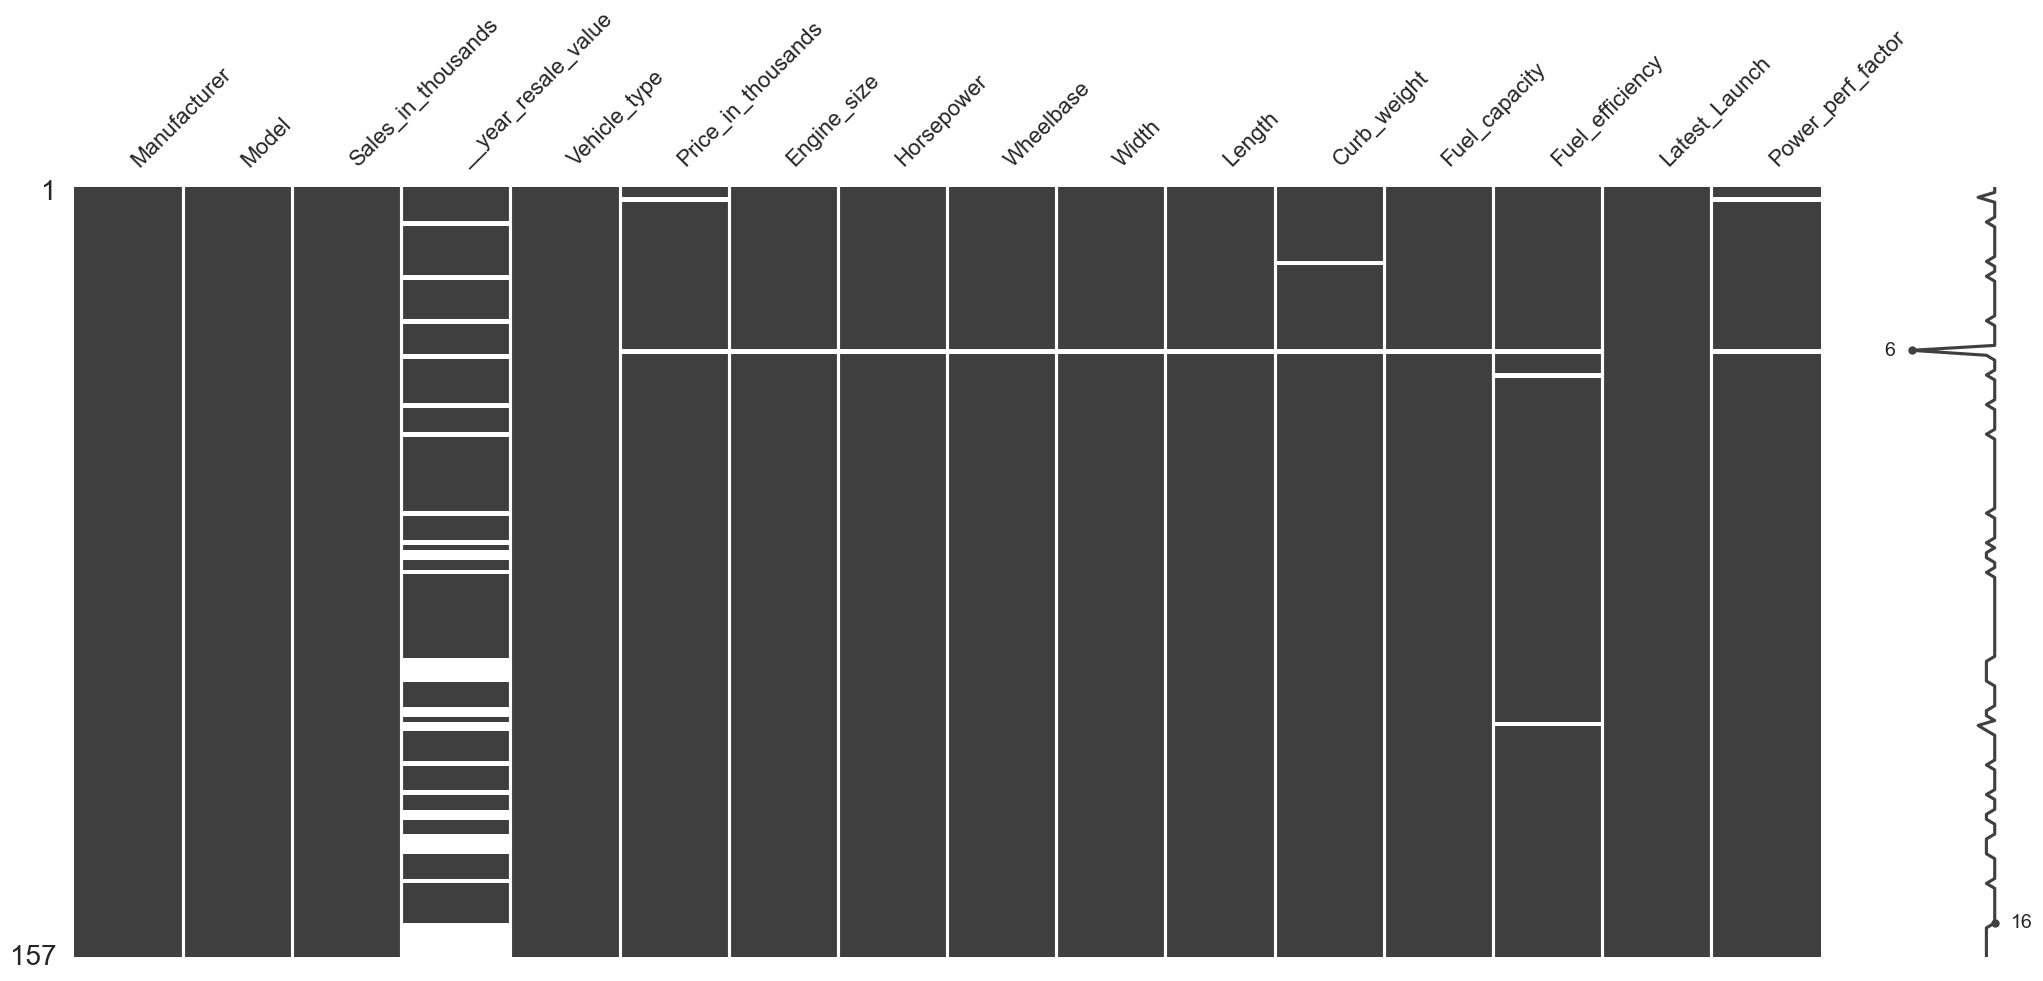

In [6]:
# Visualizing missing values in the dataset

msno.matrix(df)
plt.show()

## 2. Data Cleaning & Feature Preparation

We clean column names, handle missing values, and create derived variables used throughout the analysis.

### 2.1 Rename Columns

Correct misnamed columns (e.g. '__year_resale_value' → 'Year_resale_value')

In [7]:
if '__year_resale_value' in df.columns:
    df.rename(columns={'__year_resale_value': 'Year_resale_value'}, inplace=True)

### 2.2 Convert Column Types

Convert manufacturer, model, vehicle type to categorical and parse dates for launch columns.

In [8]:
# Converted specified columns to categorical type

category_col = ['Manufacturer','Model','Vehicle_type']
for col in category_col:
    df[col] = df[col].astype('category')

# Convert the 'Latest_Launch' column from string format MM/DD/YYYY to datetime objects.

df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], format='%m/%d/%Y', errors='coerce').dt.normalize()

### 2.3 Missing Value Treatment

Missing values are imputed or dropped based on feature importance.

In [9]:
# Remove rows with >=3 missing (NaN) values

df = df[df.isna().sum(axis=1) < 3]

# Median imputation for 'Price_in_thousands', 'Power_perf_factor' 'Curb_weight'

for col in ['Price_in_thousands', 'Power_perf_factor', 'Curb_weight']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [10]:
# Function to impute missing values using Linear Regression 

def impute_with_regression(df, target_col, features):
    """
    Impute missing values in target_col using Linear Regression on given features.
    """
    # Split data into rows with and without target_col
    train_data = df[df[target_col].notnull()]
    test_data = df[df[target_col].isnull()]
    
    if test_data.empty:
        print(f"No missing values in {target_col}")
        return df
    
    missing_idx = test_data.index

    X_train = train_data[features]
    y_train = train_data[target_col]
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data[features]
    predicted_values = model.predict(X_test)
    
    df.loc[missing_idx, target_col] = predicted_values
    return df

In [11]:
# Apply regression-based imputations

features_fuel_efficiency = ['Engine_size', 'Horsepower', 'Width', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']
features_resale_value = ['Price_in_thousands', 'Horsepower', 'Power_perf_factor']

# Function call
df = impute_with_regression(df, 'Year_resale_value', features_resale_value)
df = impute_with_regression(df, 'Fuel_efficiency', features_fuel_efficiency)

### 2.4 Feature Engineering

Compute Depreciation_Percentage and Retention_Ratio; build performance/design feature lists for downstream analyses.

- **Depreciation_Percentage:** Measures how much value a car loses from its original price.
- **Retention_Ratio:** Indicates what proportion of the original price is retained in resale value.
- **Power_to_Weight:** Measure of the car’s performance potential relative to its mass.
- **Launch_Year:** Indicates the year the car was launched.

In [12]:
df['Depreciation_Percentage'] = ((df['Price_in_thousands'] - df['Year_resale_value']) / df['Price_in_thousands']) * 100
df['Retention_Ratio'] = df['Year_resale_value'] / df['Price_in_thousands']
df['Power_to_Weight'] = df['Horsepower'] / df['Curb_weight']
df['Launch_Year'] = df['Latest_Launch'].dt.year
avg_dep = df['Depreciation_Percentage'].mean()
print(f'Average Depreciation: {avg_dep:.1f}%')

Average Depreciation: 31.4%


### 2.5 Feature Categorization: Performance & Design Attributes

To streamline analysis, we group features into two logical categories:

- **Performance Attributes:** Relates to the car’s power and efficiency characteristics.
- **Design Attributes:** Captures the vehicle’s structural and dimensional characteristics.

These groups will be referenced across multiple analysis sections.

In [13]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='category').columns

print('Numeric Columns:', numeric_cols.tolist())
print('Categorical Columns:', categorical_cols.tolist())

performance_features = ['Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor']
design_features = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity']

TOP_N_MODELS = 10 

Numeric Columns: ['Sales_in_thousands', 'Year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Depreciation_Percentage', 'Retention_Ratio', 'Power_to_Weight', 'Launch_Year']
Categorical Columns: ['Manufacturer', 'Model', 'Vehicle_type']


## 3. Correlation Analysis

Explore overall correlations among numeric variables to identify redundant or predictive relationships.

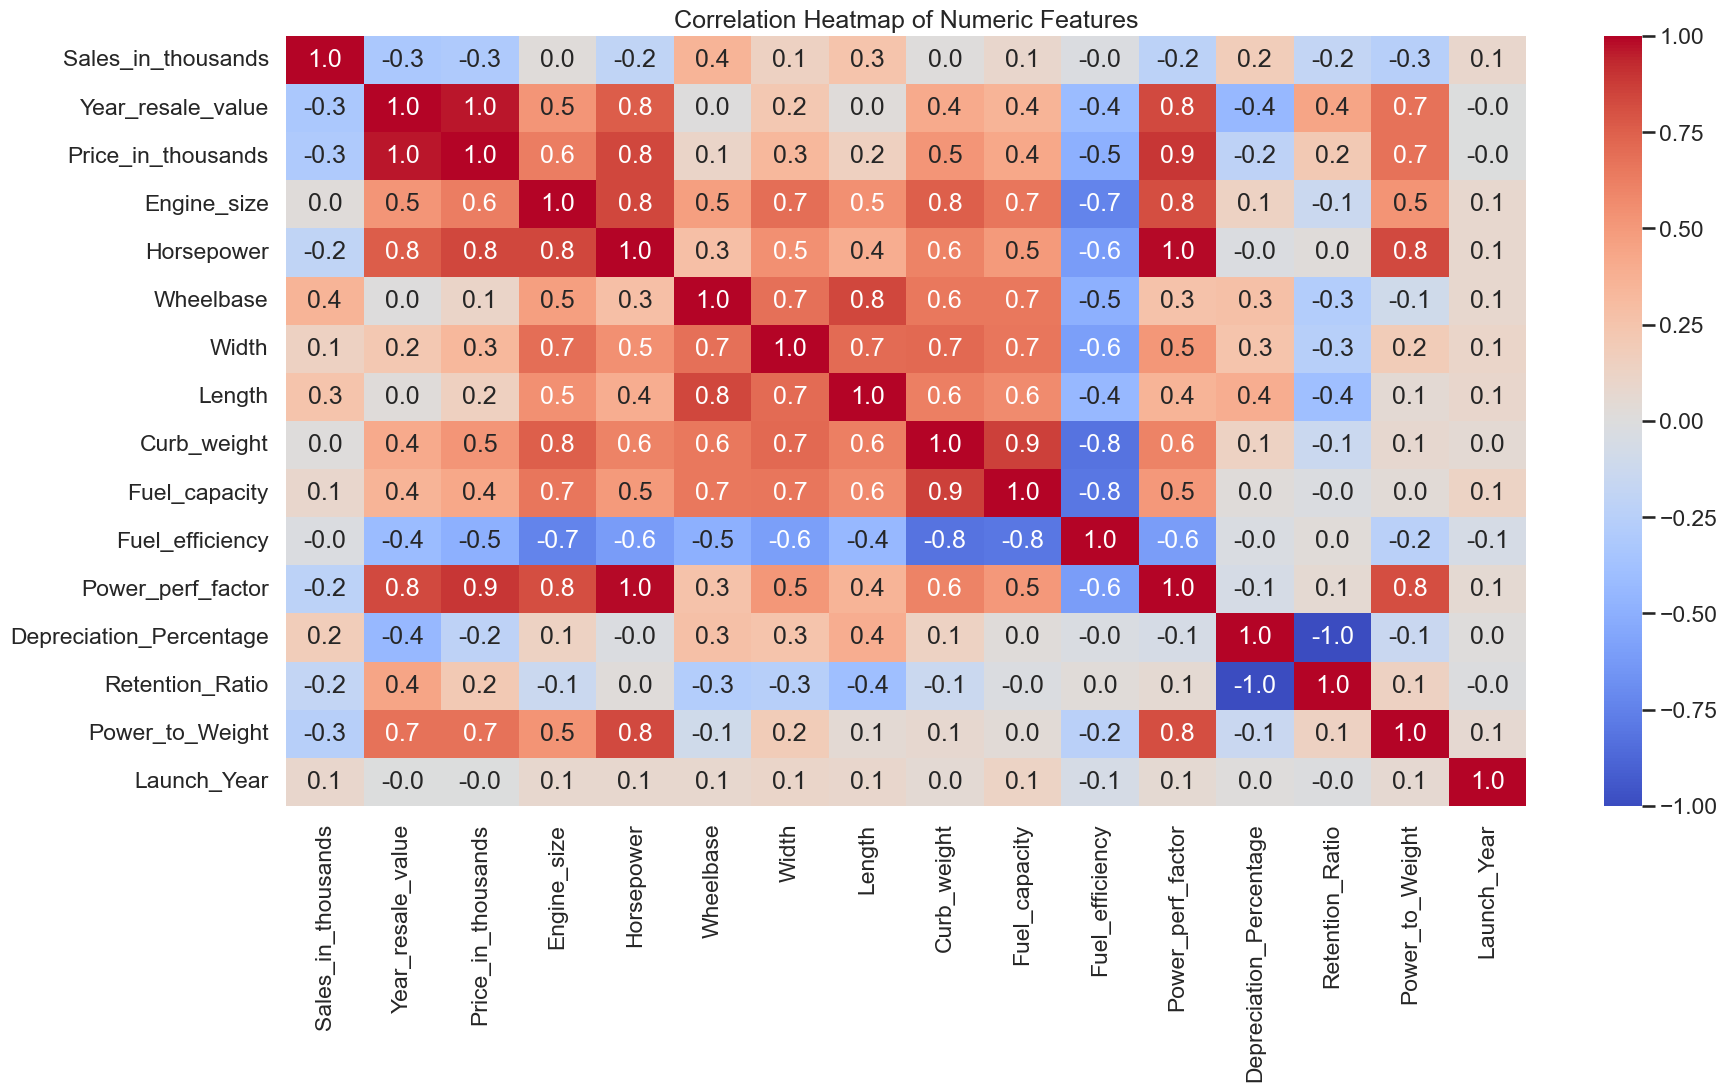

In [14]:
corr_matrix = df[numeric_cols].corr()
threshold = 0.6

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt='.1f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## 4. Exploratory Data Analysis

Explore the dataset to understand pricing, performance, and design features to identify patterns and relationships.

### 4.1 Distribution of Numeric Variables

Visualize histograms of numeric variables to check for skewness, outliers, and scaling differences.


Column: Sales_in_thousands
Skewness: 3.40
Highly right-skewed


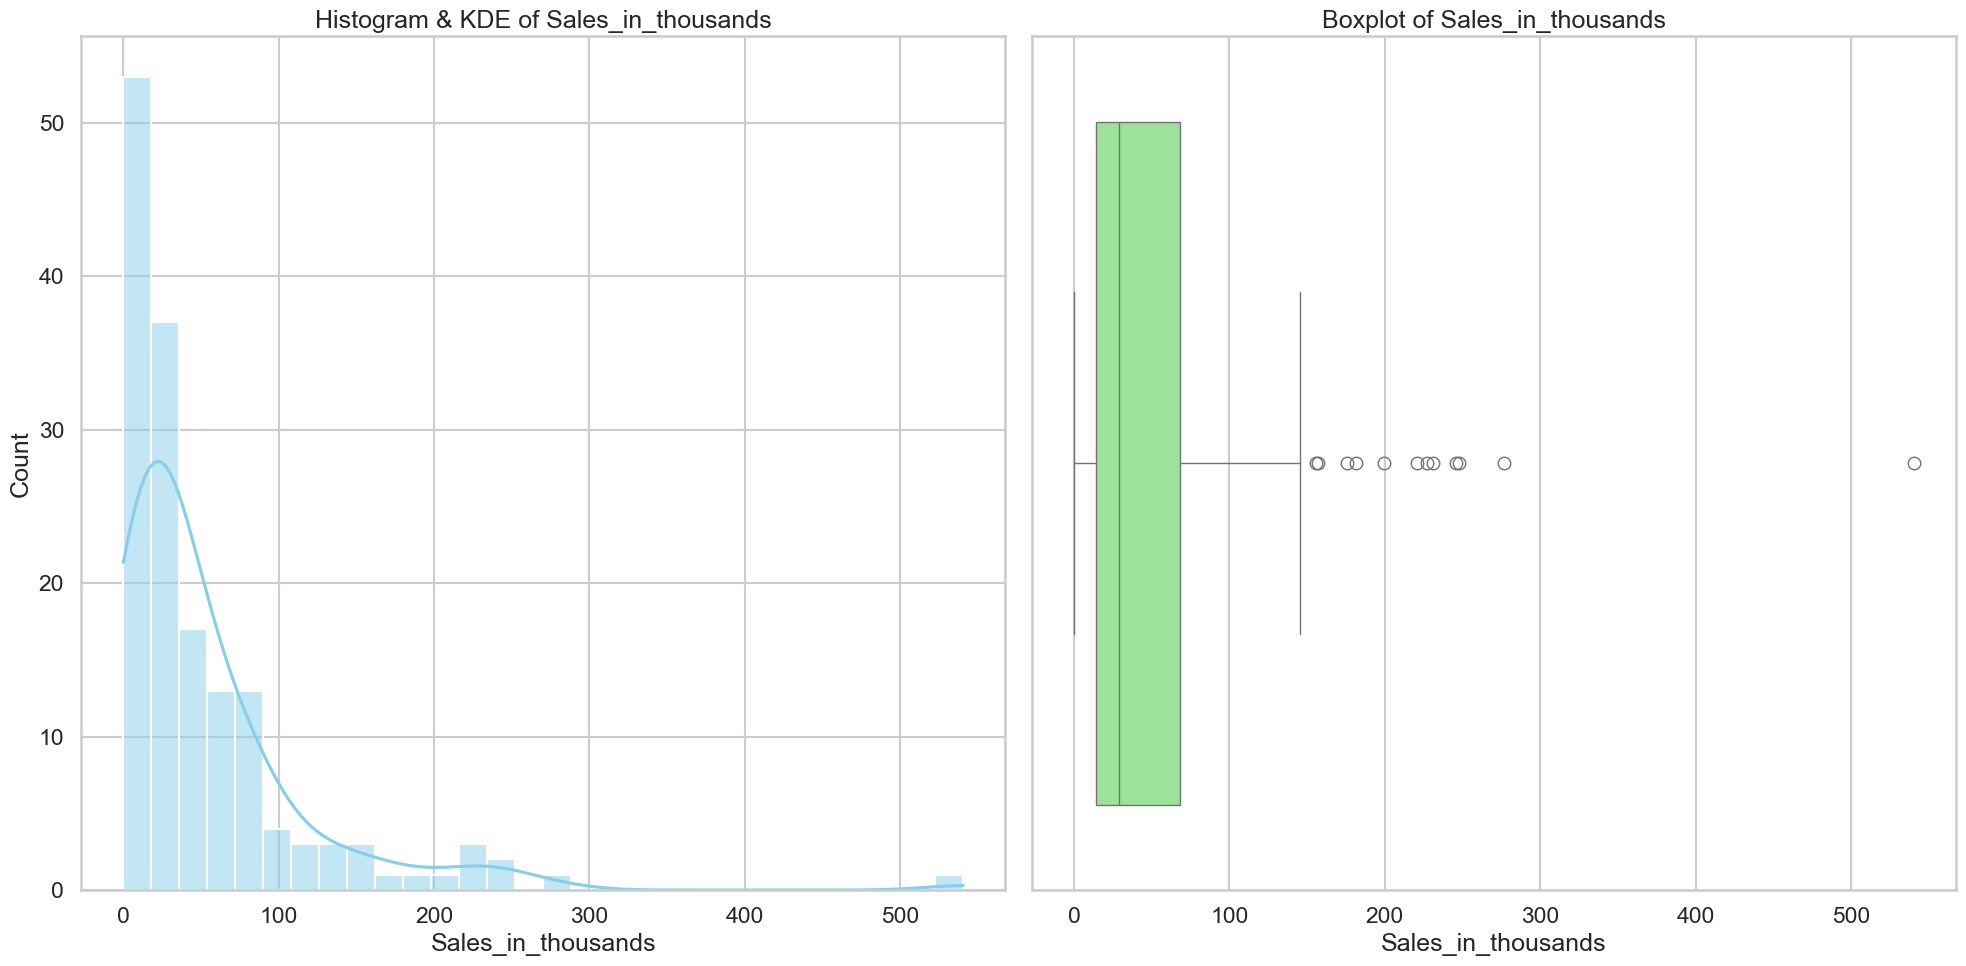


Column: Year_resale_value
Skewness: 2.08
Highly right-skewed


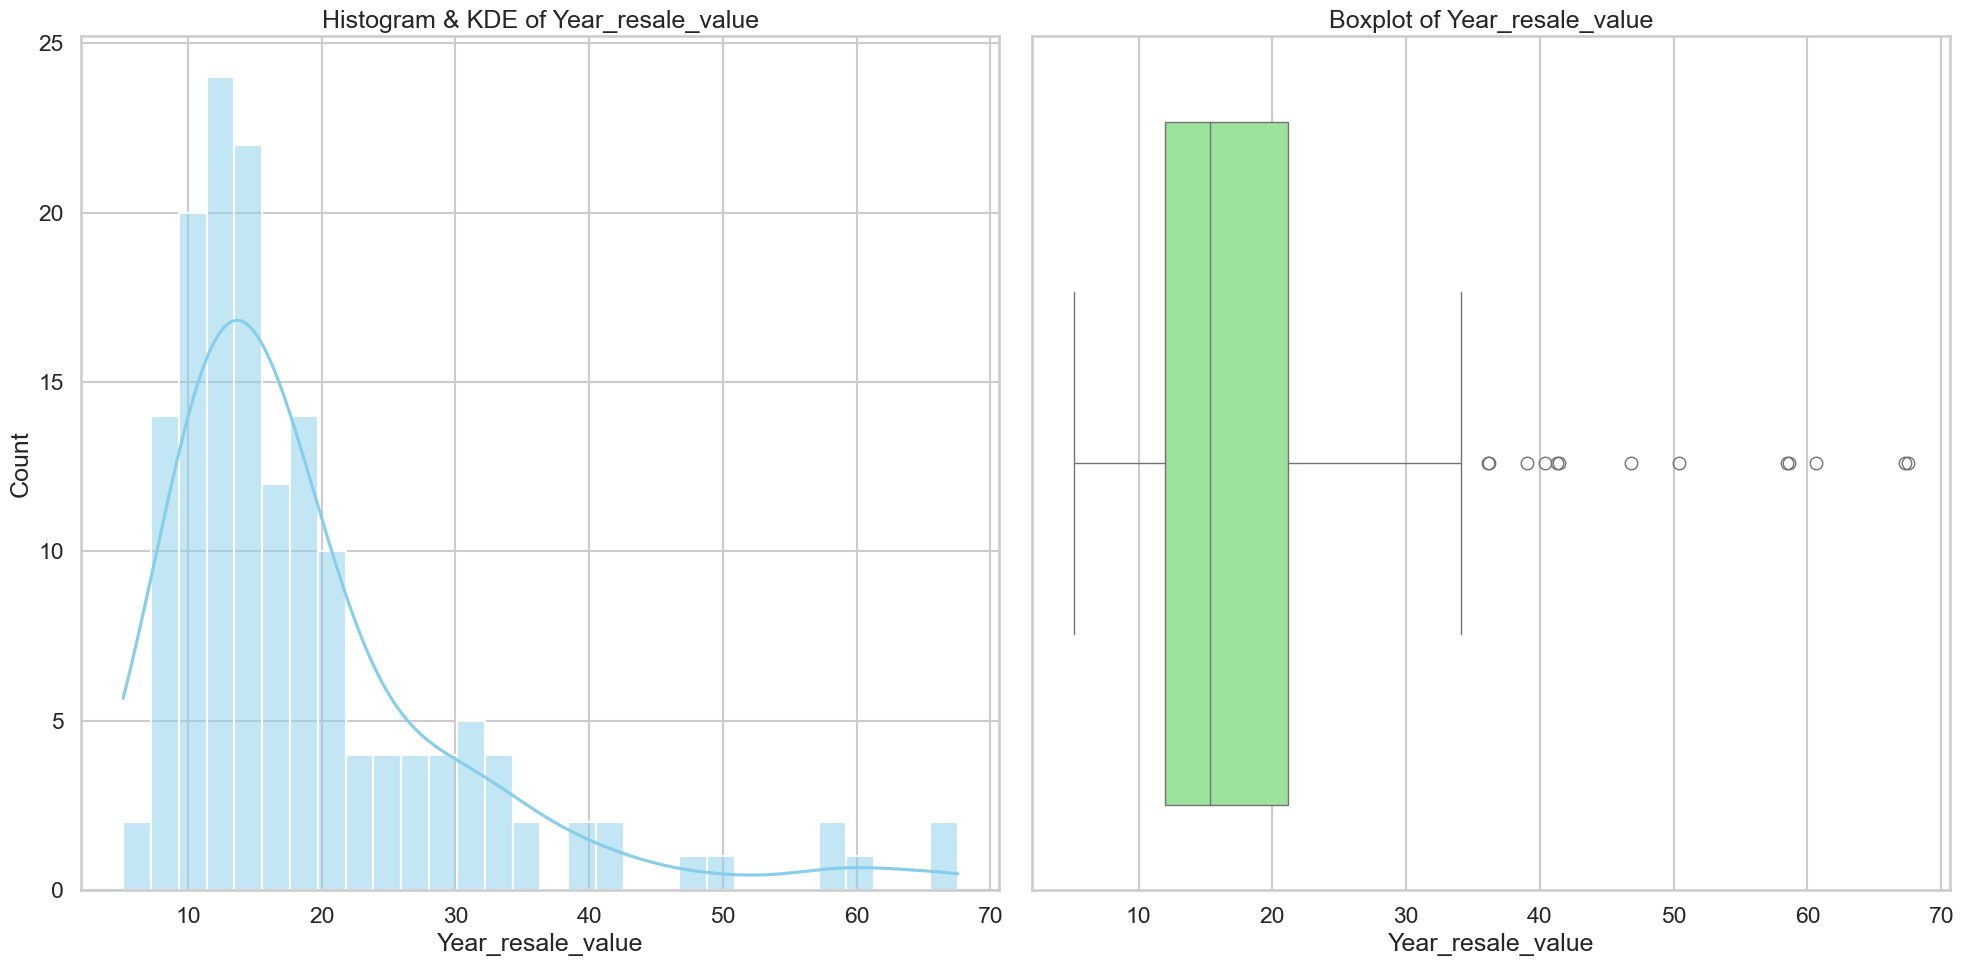


Column: Price_in_thousands
Skewness: 1.78
Highly right-skewed


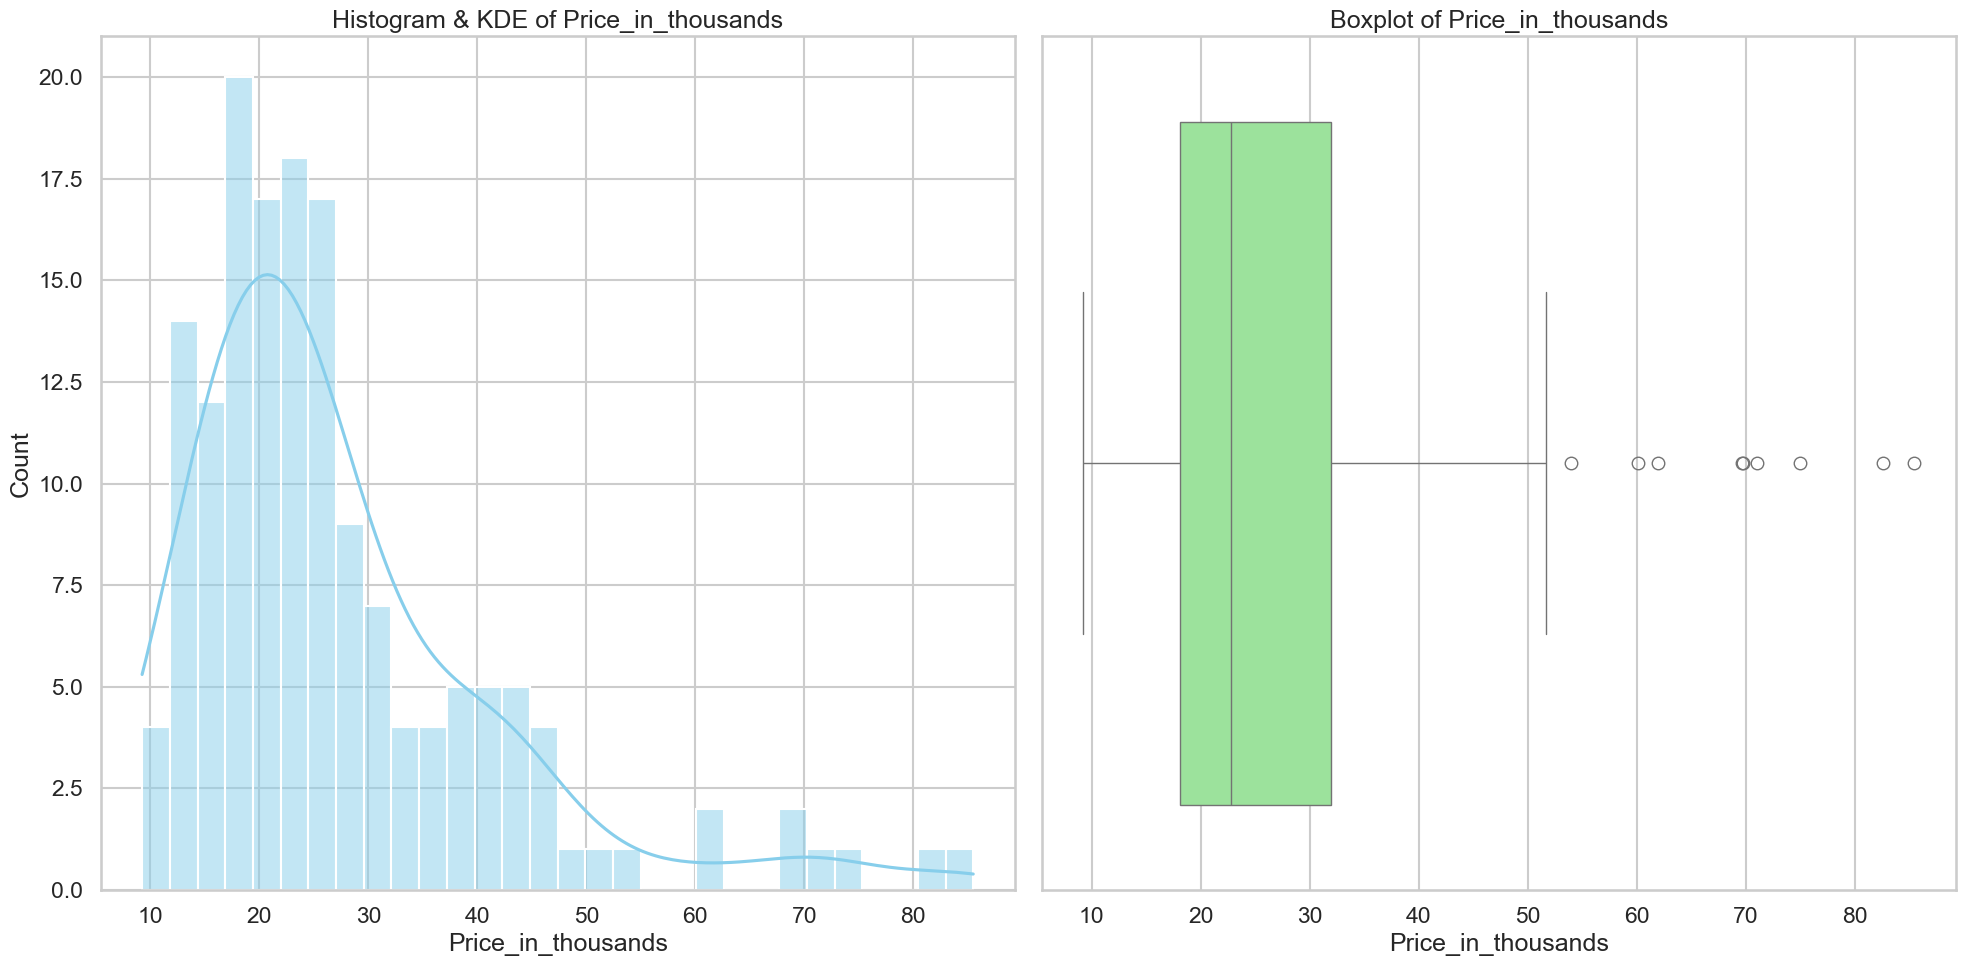


Column: Engine_size
Skewness: 1.10
Highly right-skewed


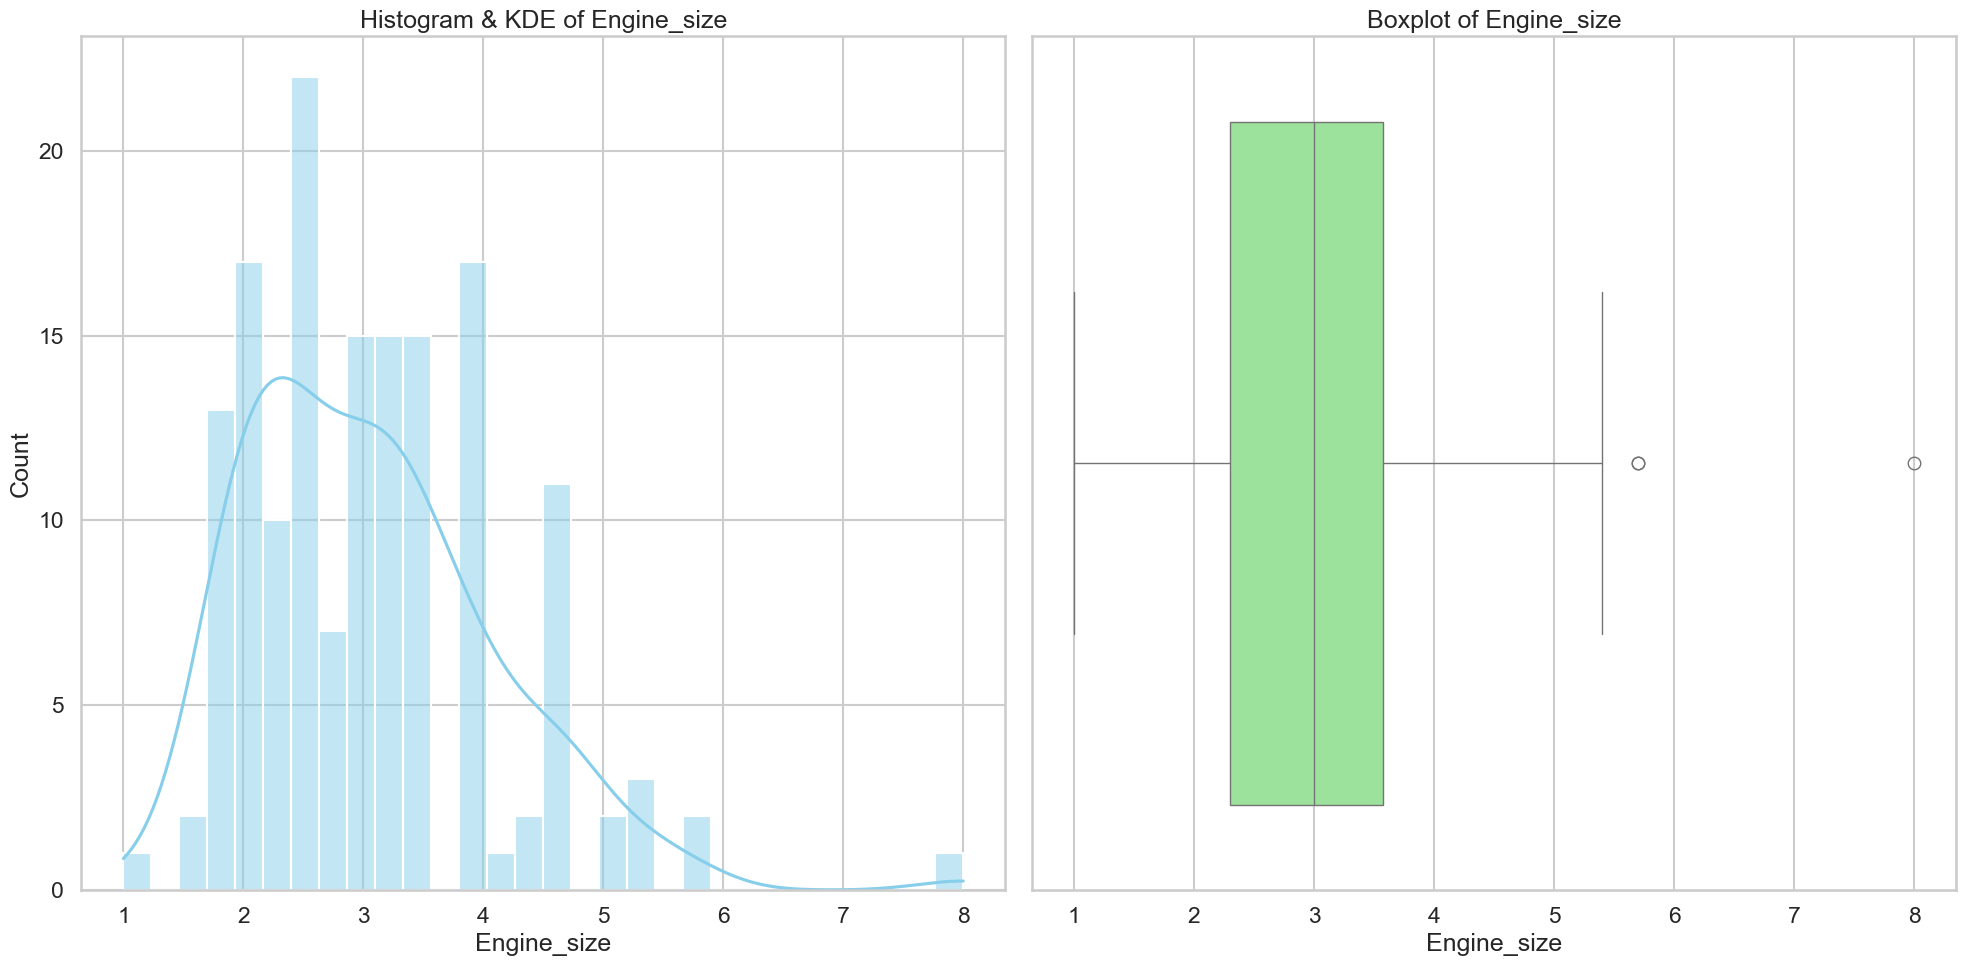


Column: Horsepower
Skewness: 1.00
Highly right-skewed


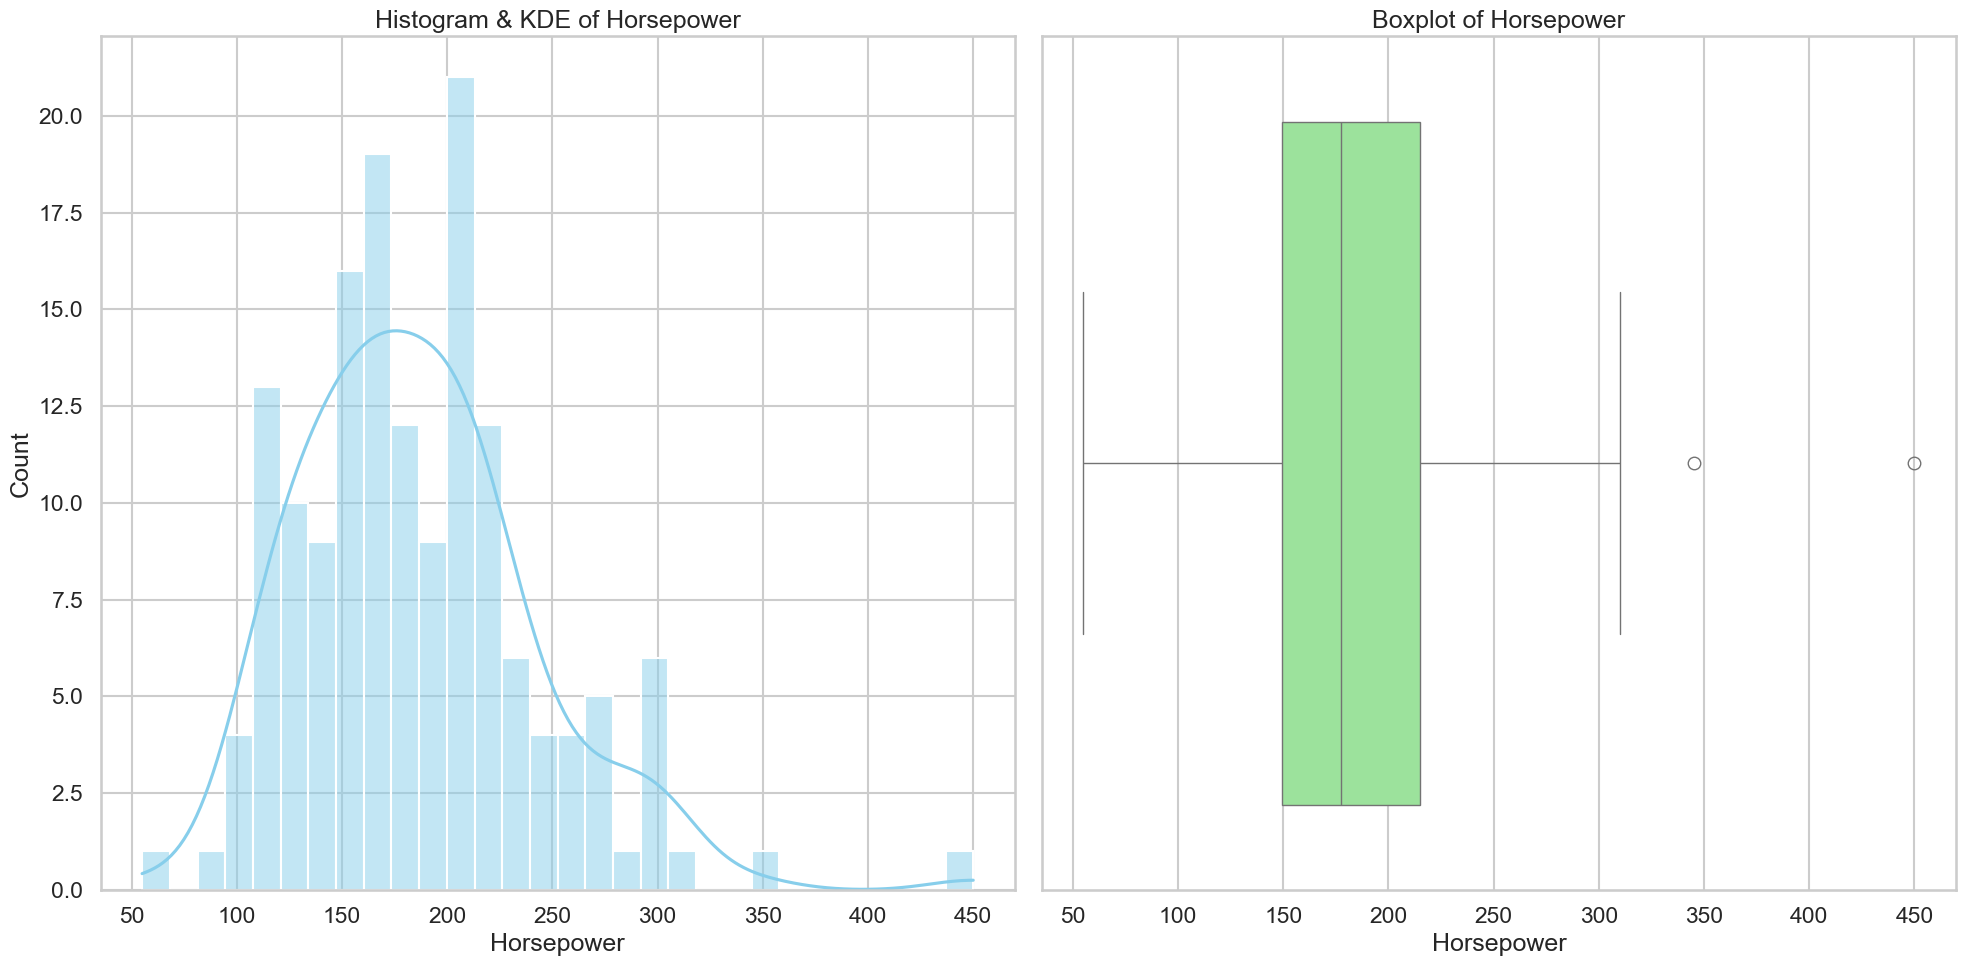


Column: Wheelbase
Skewness: 0.97
Moderately right-skewed


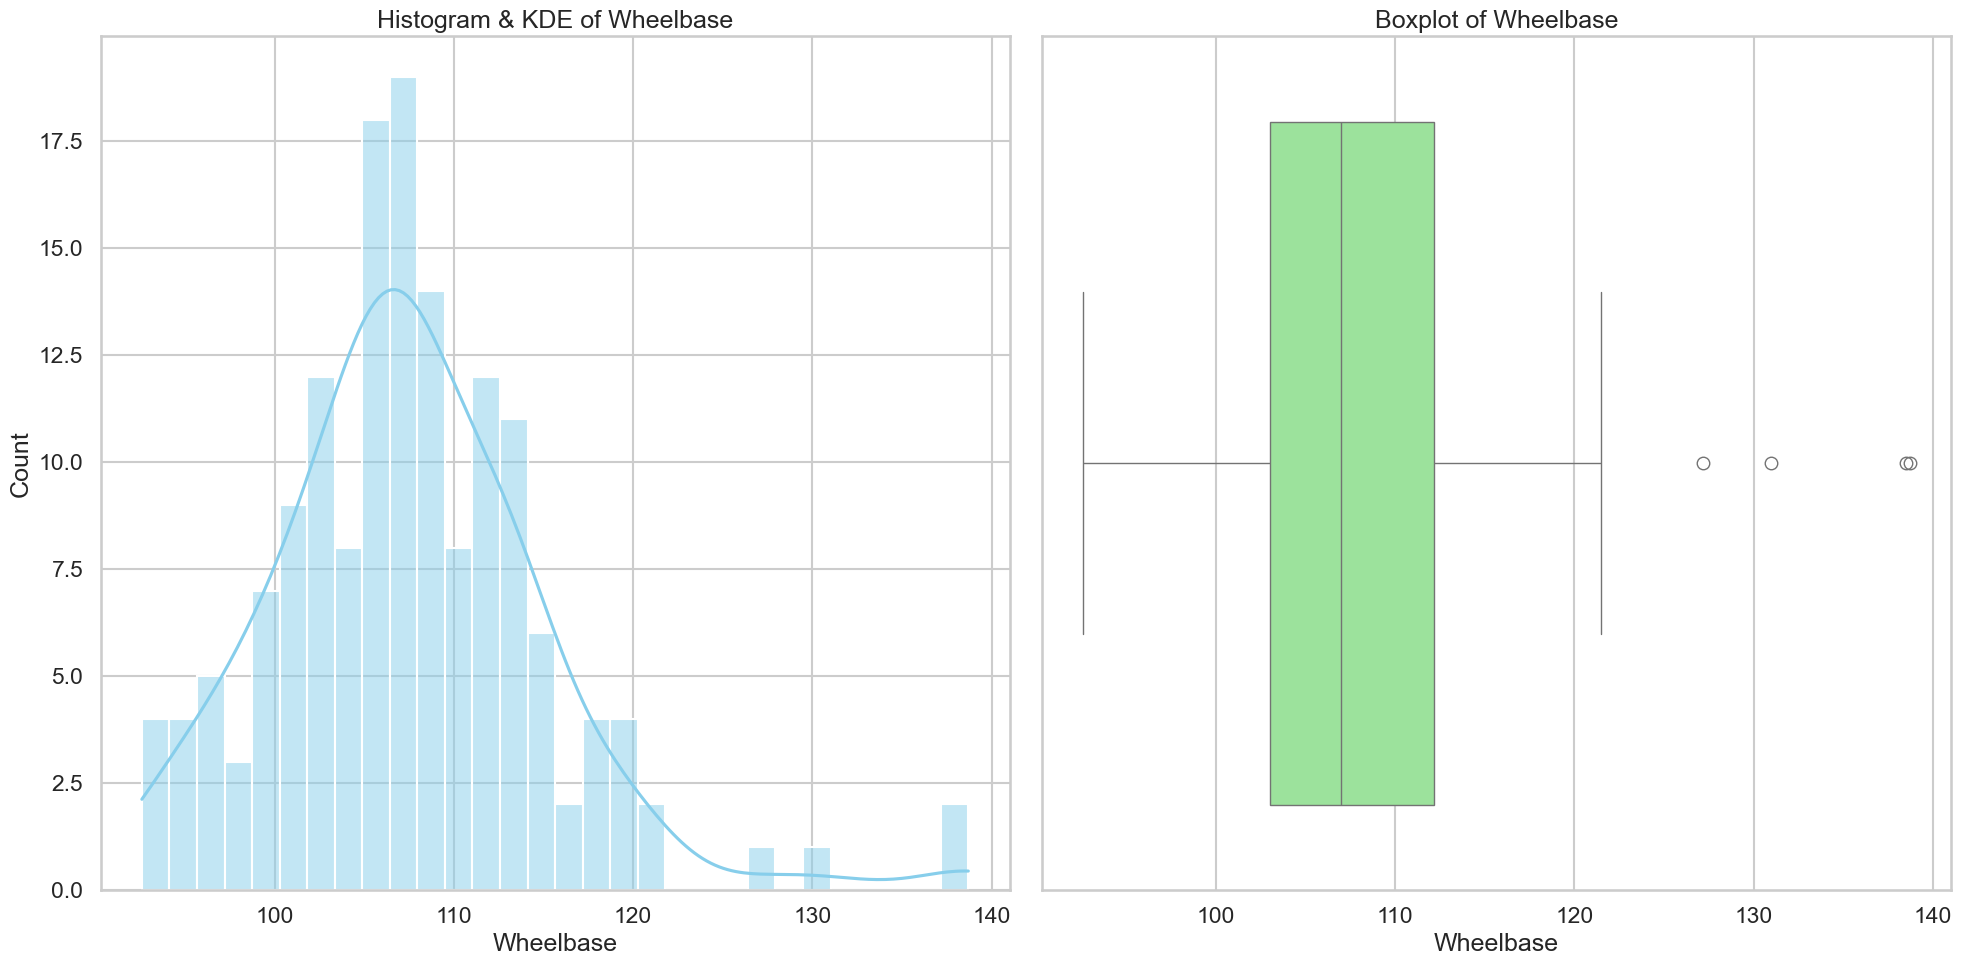


Column: Width
Skewness: 0.48
Approximately symmetric


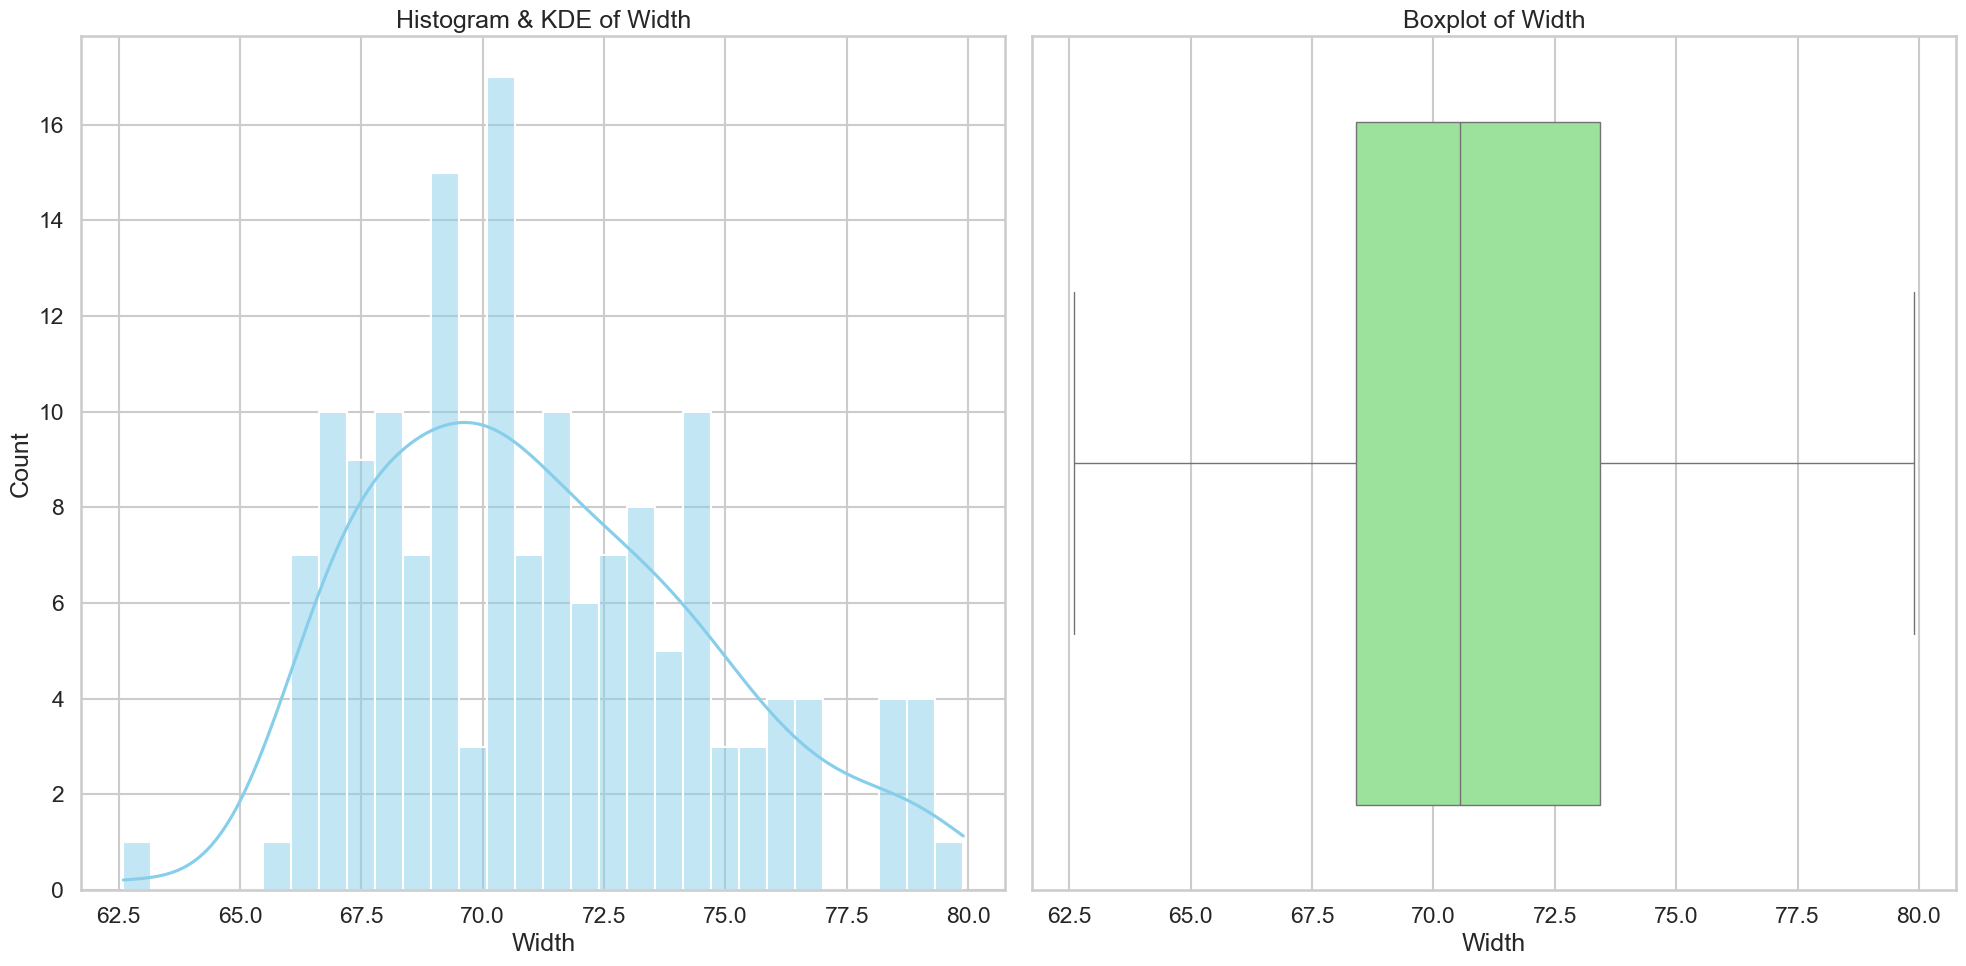


Column: Length
Skewness: -0.06
Approximately symmetric


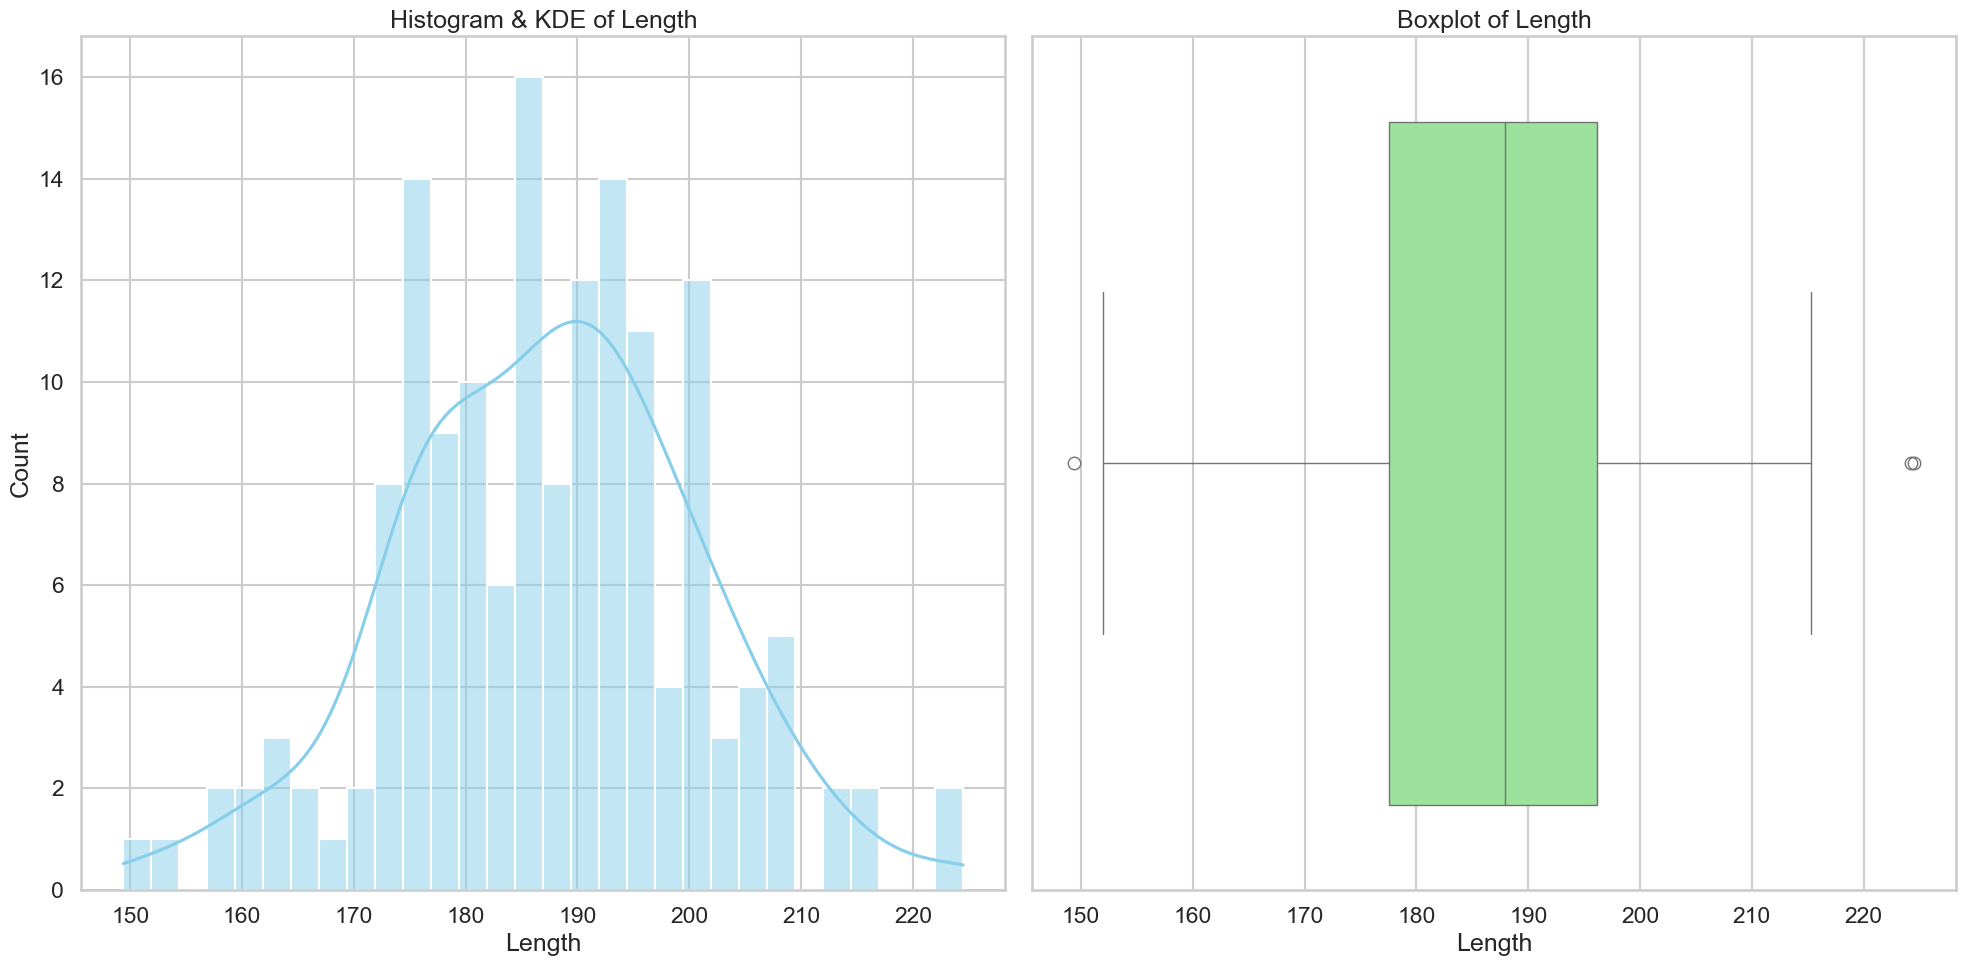


Column: Curb_weight
Skewness: 0.71
Moderately right-skewed


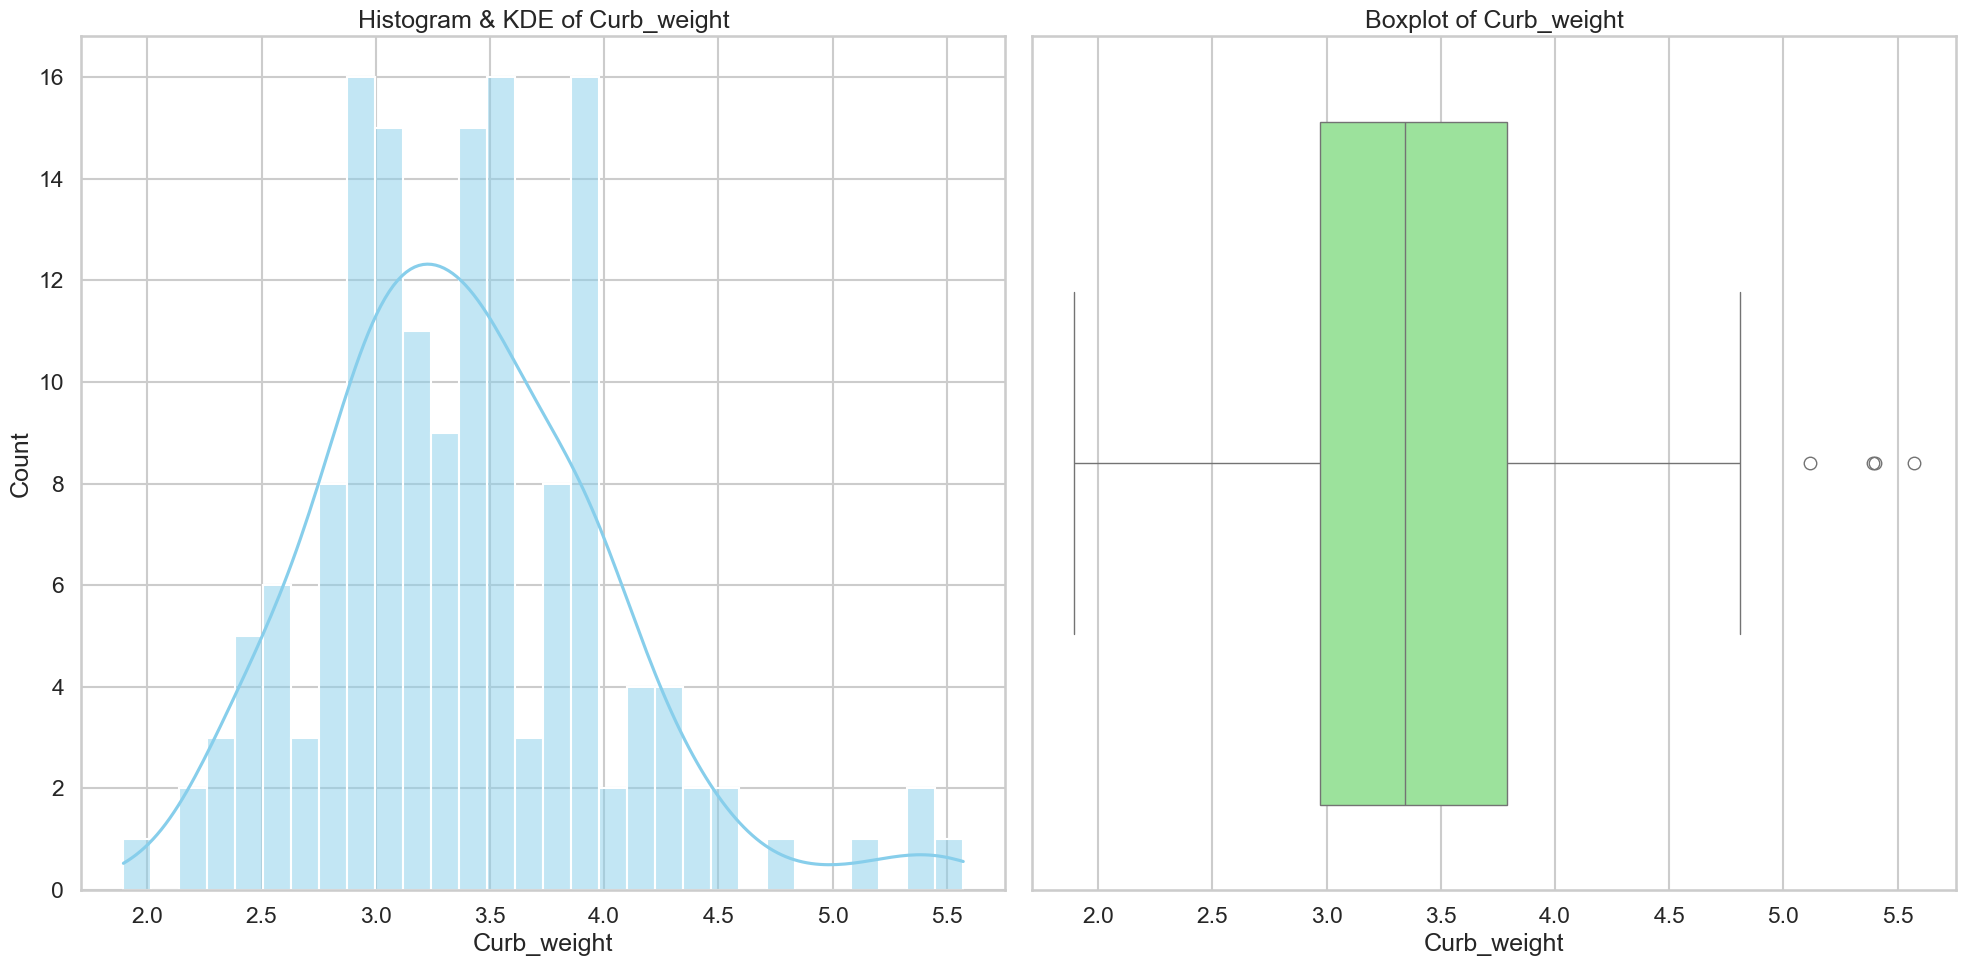


Column: Fuel_capacity
Skewness: 1.14
Highly right-skewed


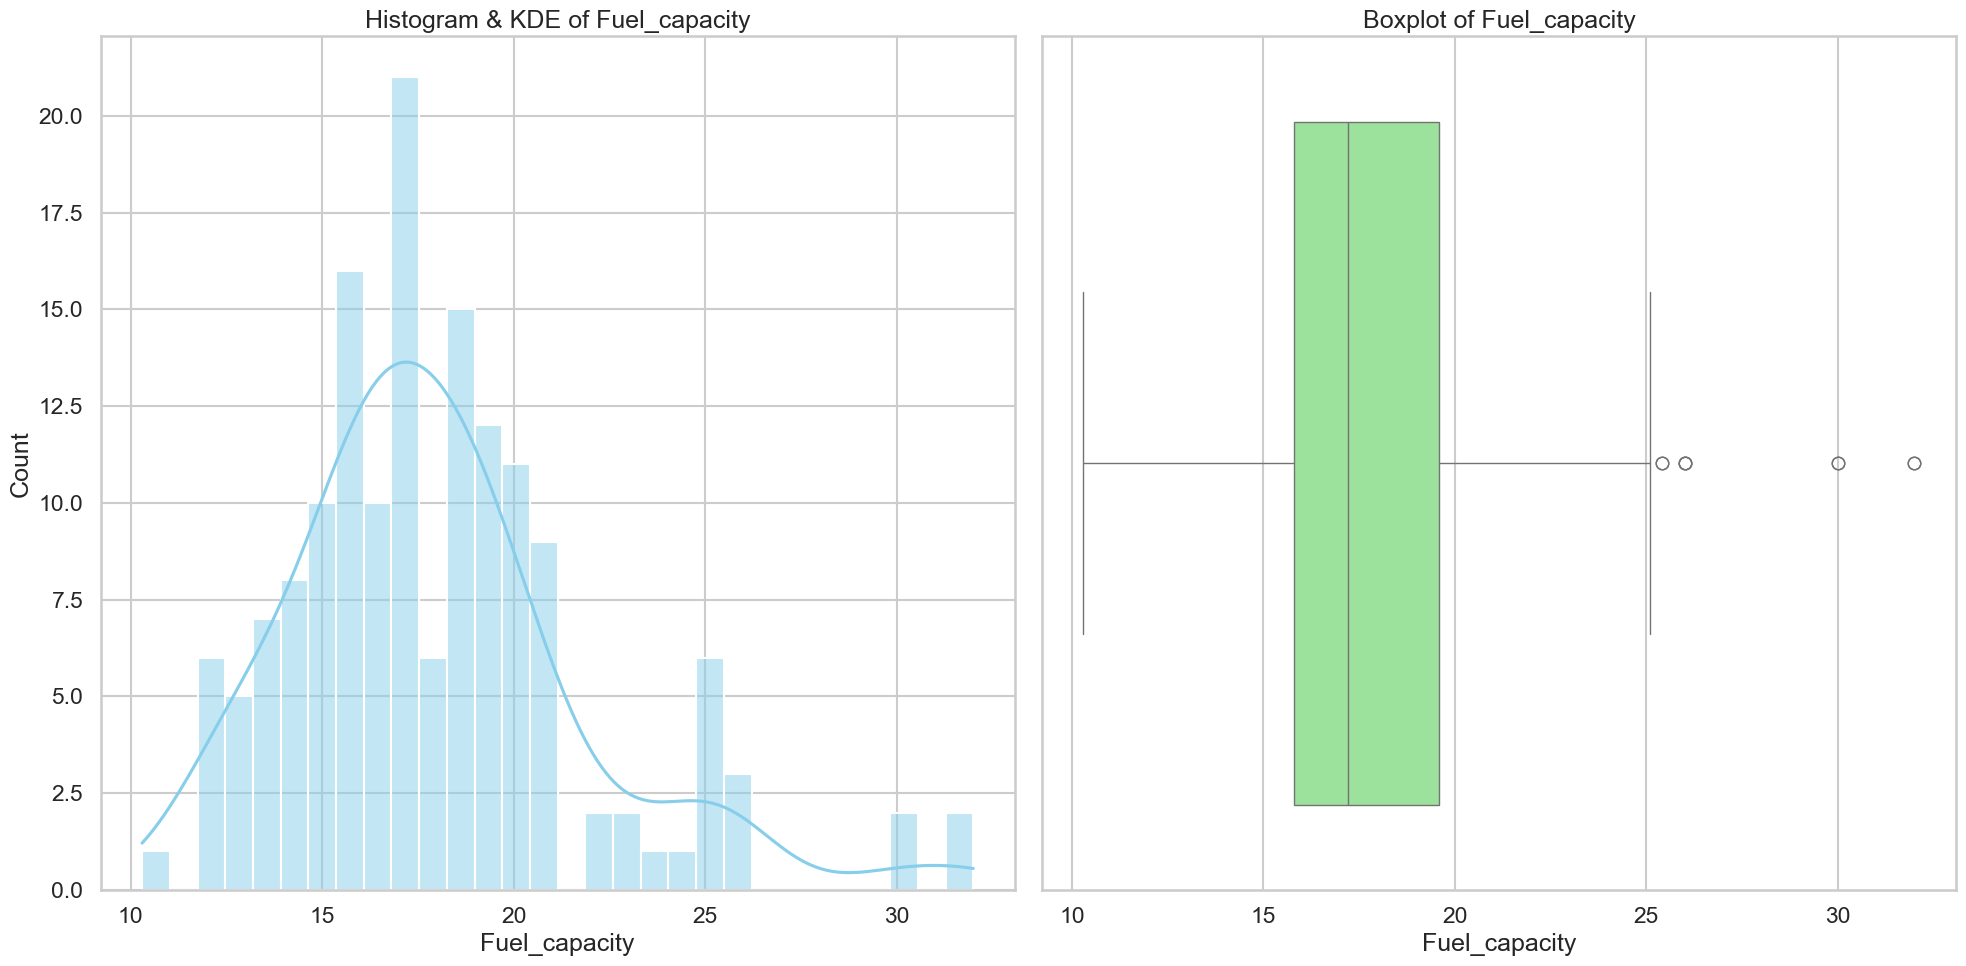


Column: Fuel_efficiency
Skewness: 0.70
Moderately right-skewed


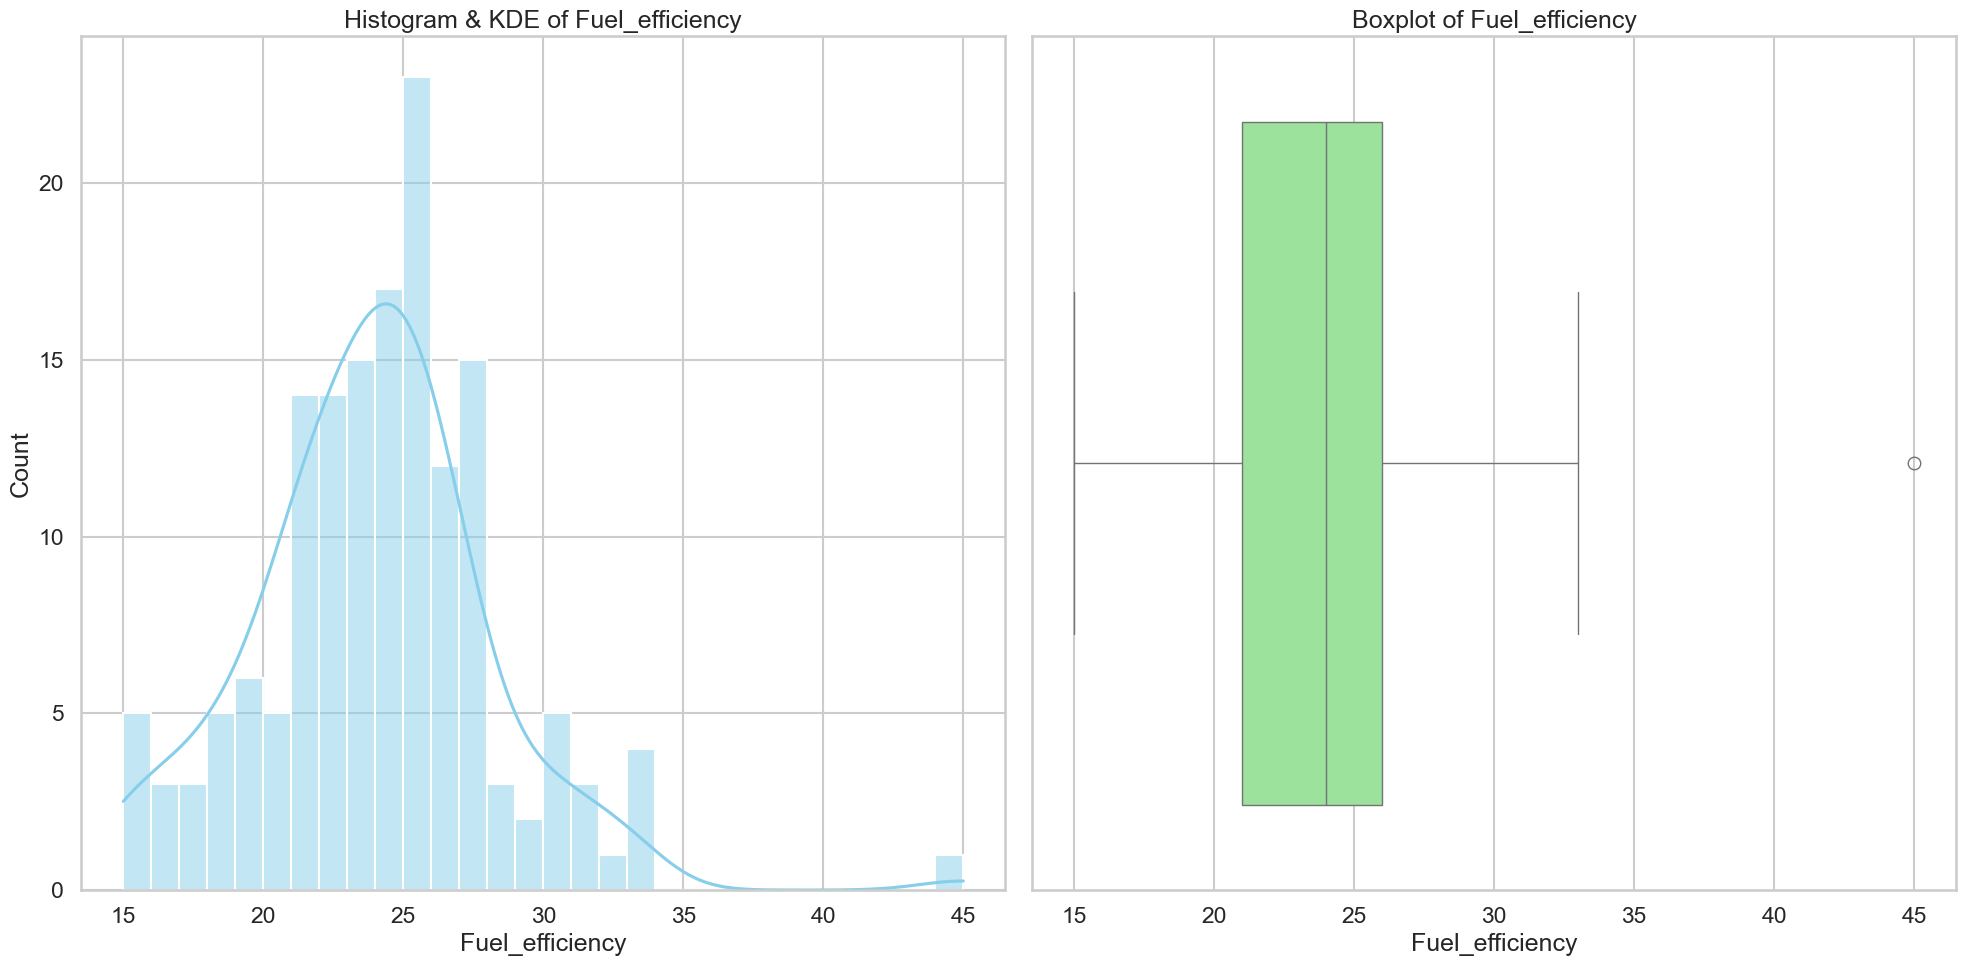


Column: Power_perf_factor
Skewness: 1.08
Highly right-skewed


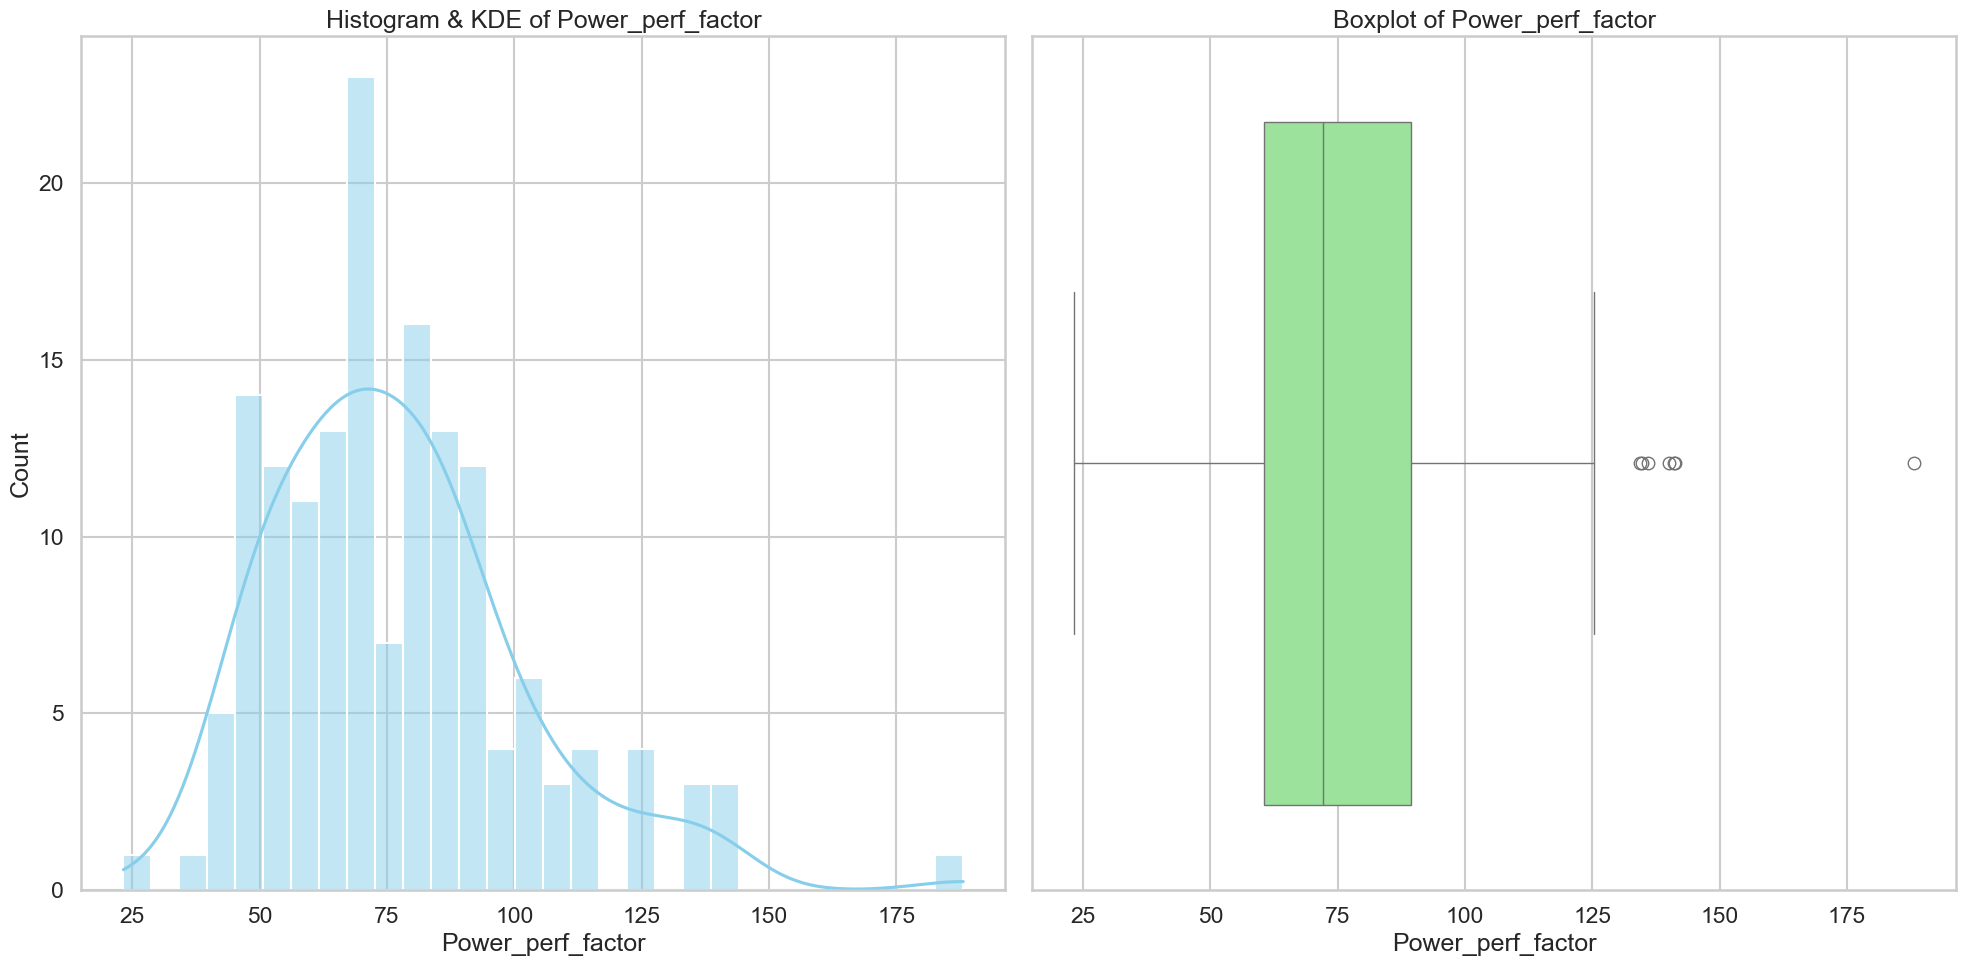


Column: Depreciation_Percentage
Skewness: -0.48
Approximately symmetric


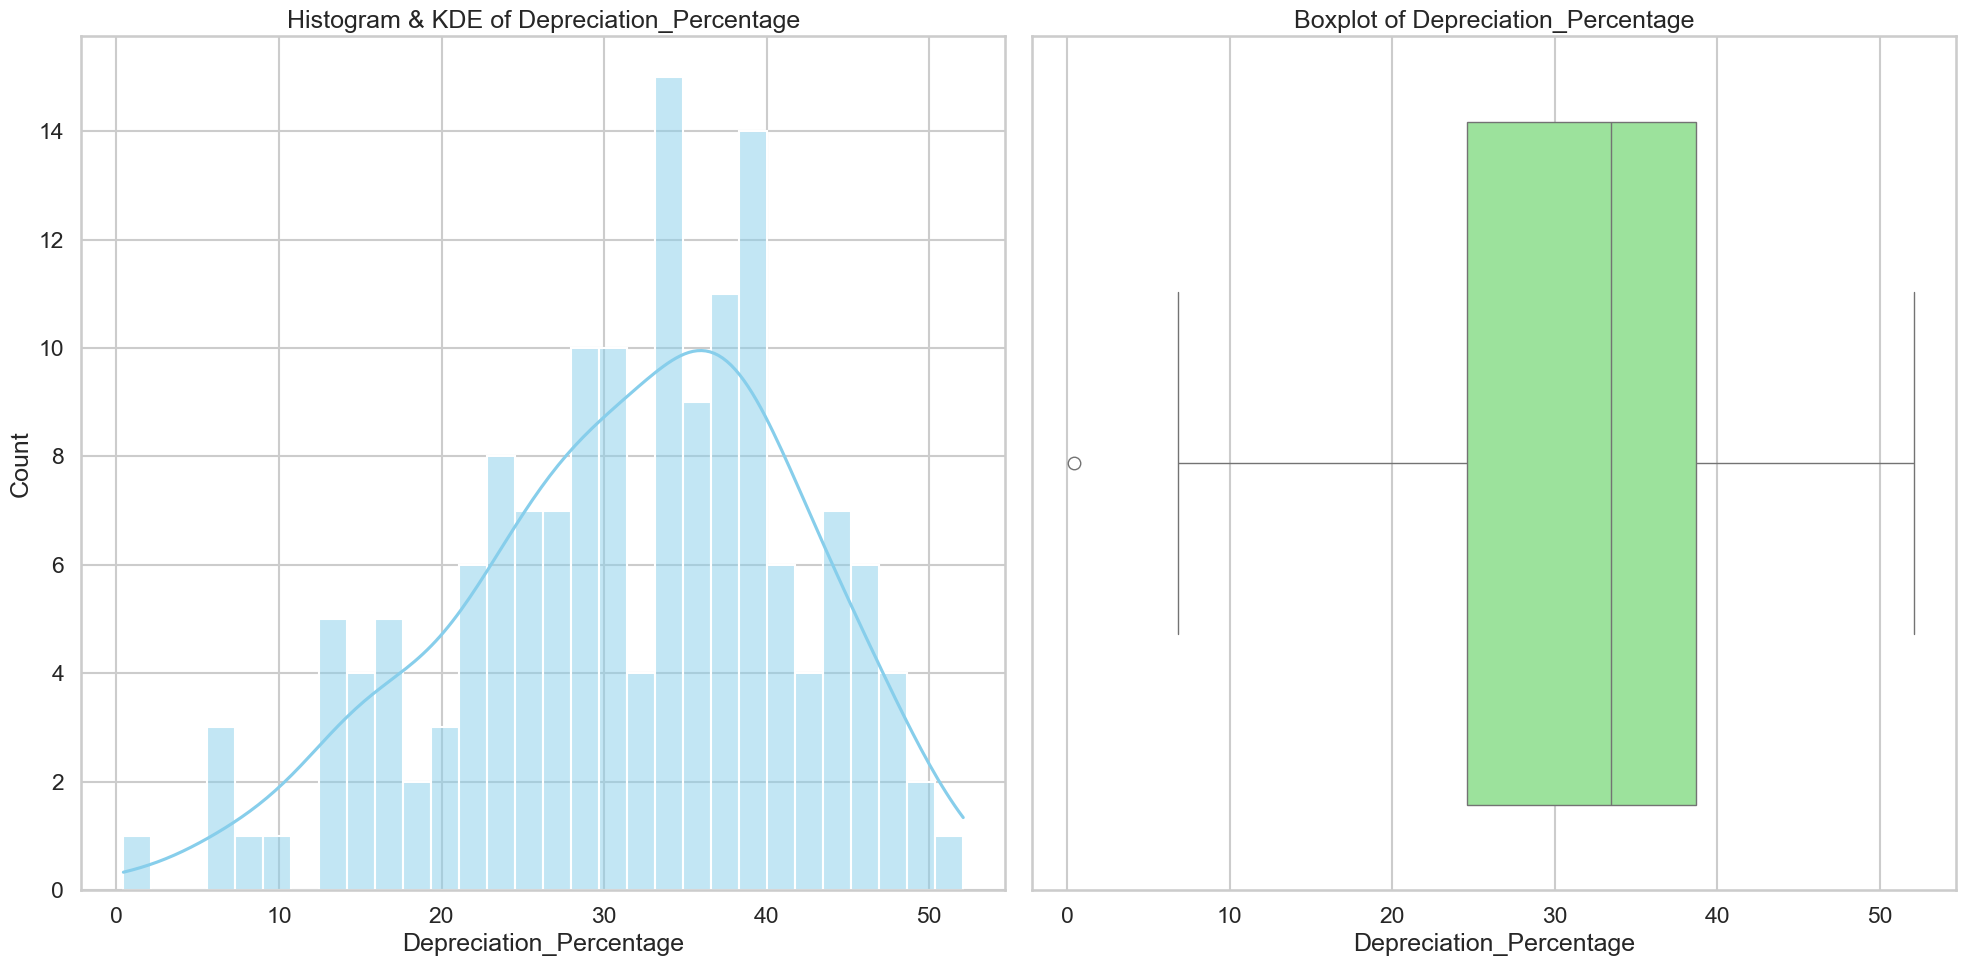


Column: Retention_Ratio
Skewness: 0.48
Approximately symmetric


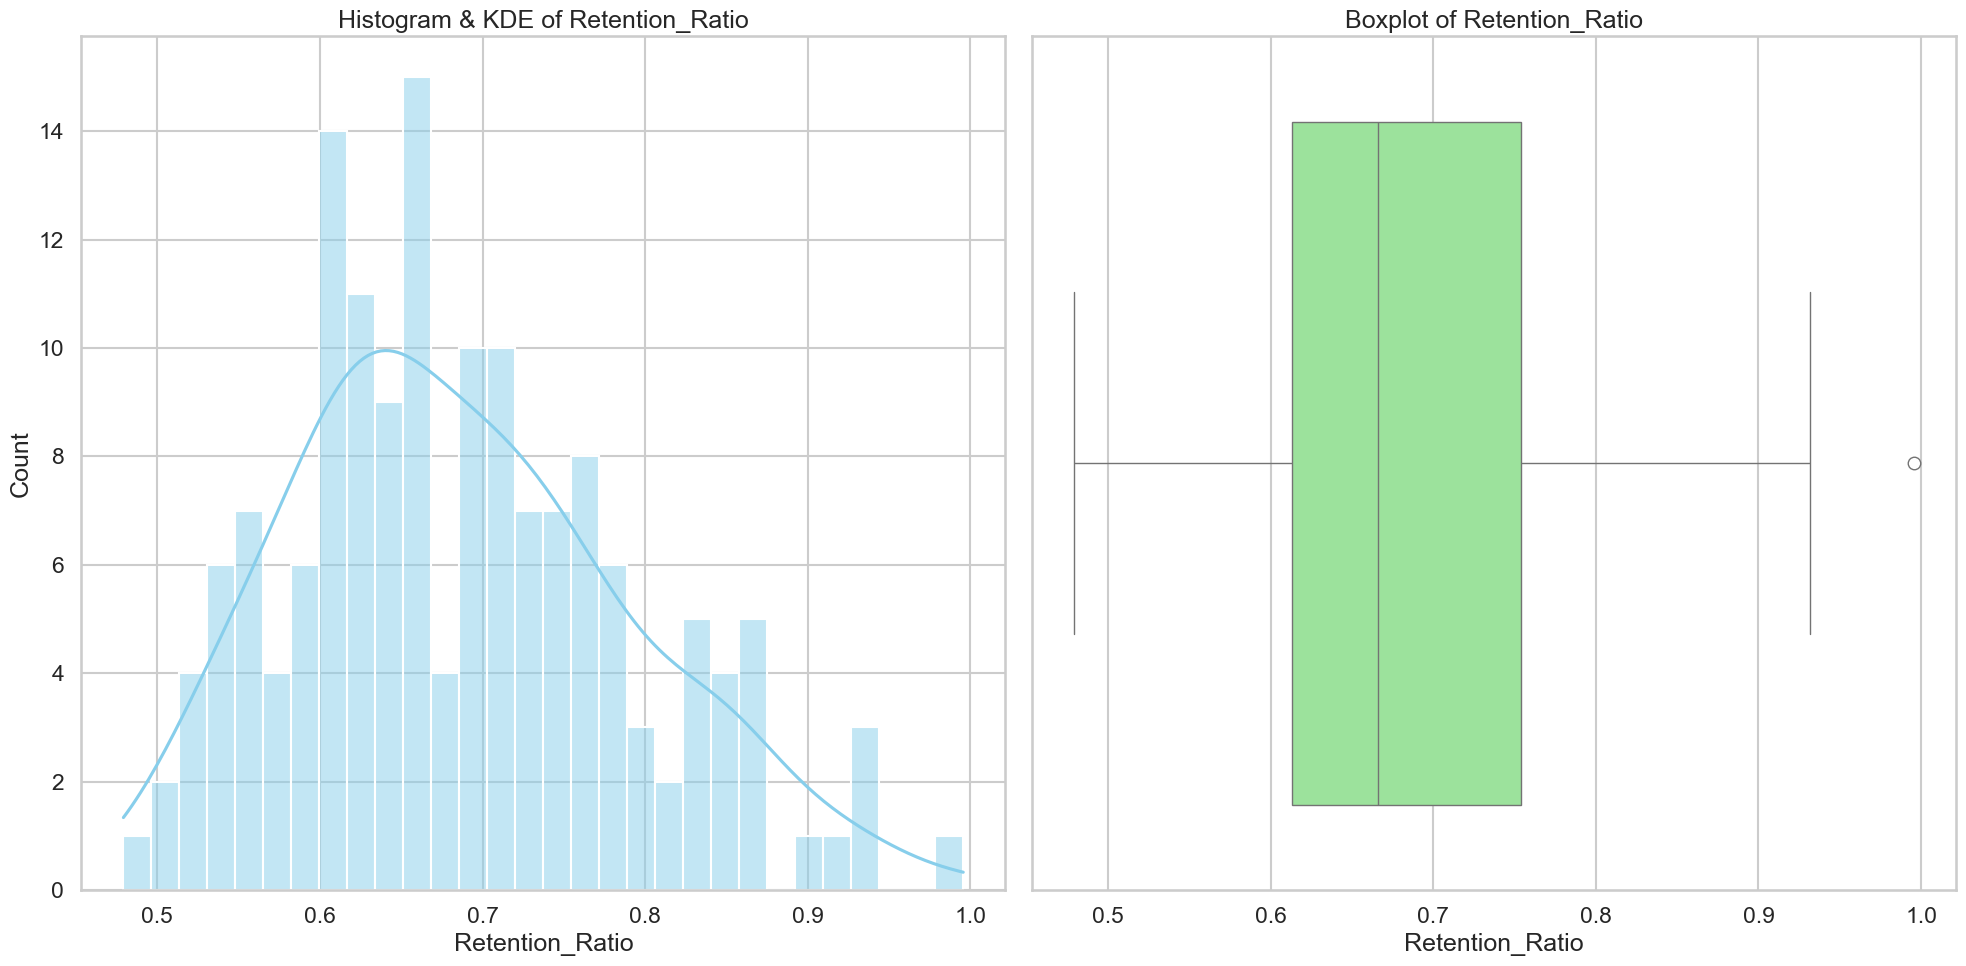


Column: Power_to_Weight
Skewness: 2.25
Highly right-skewed


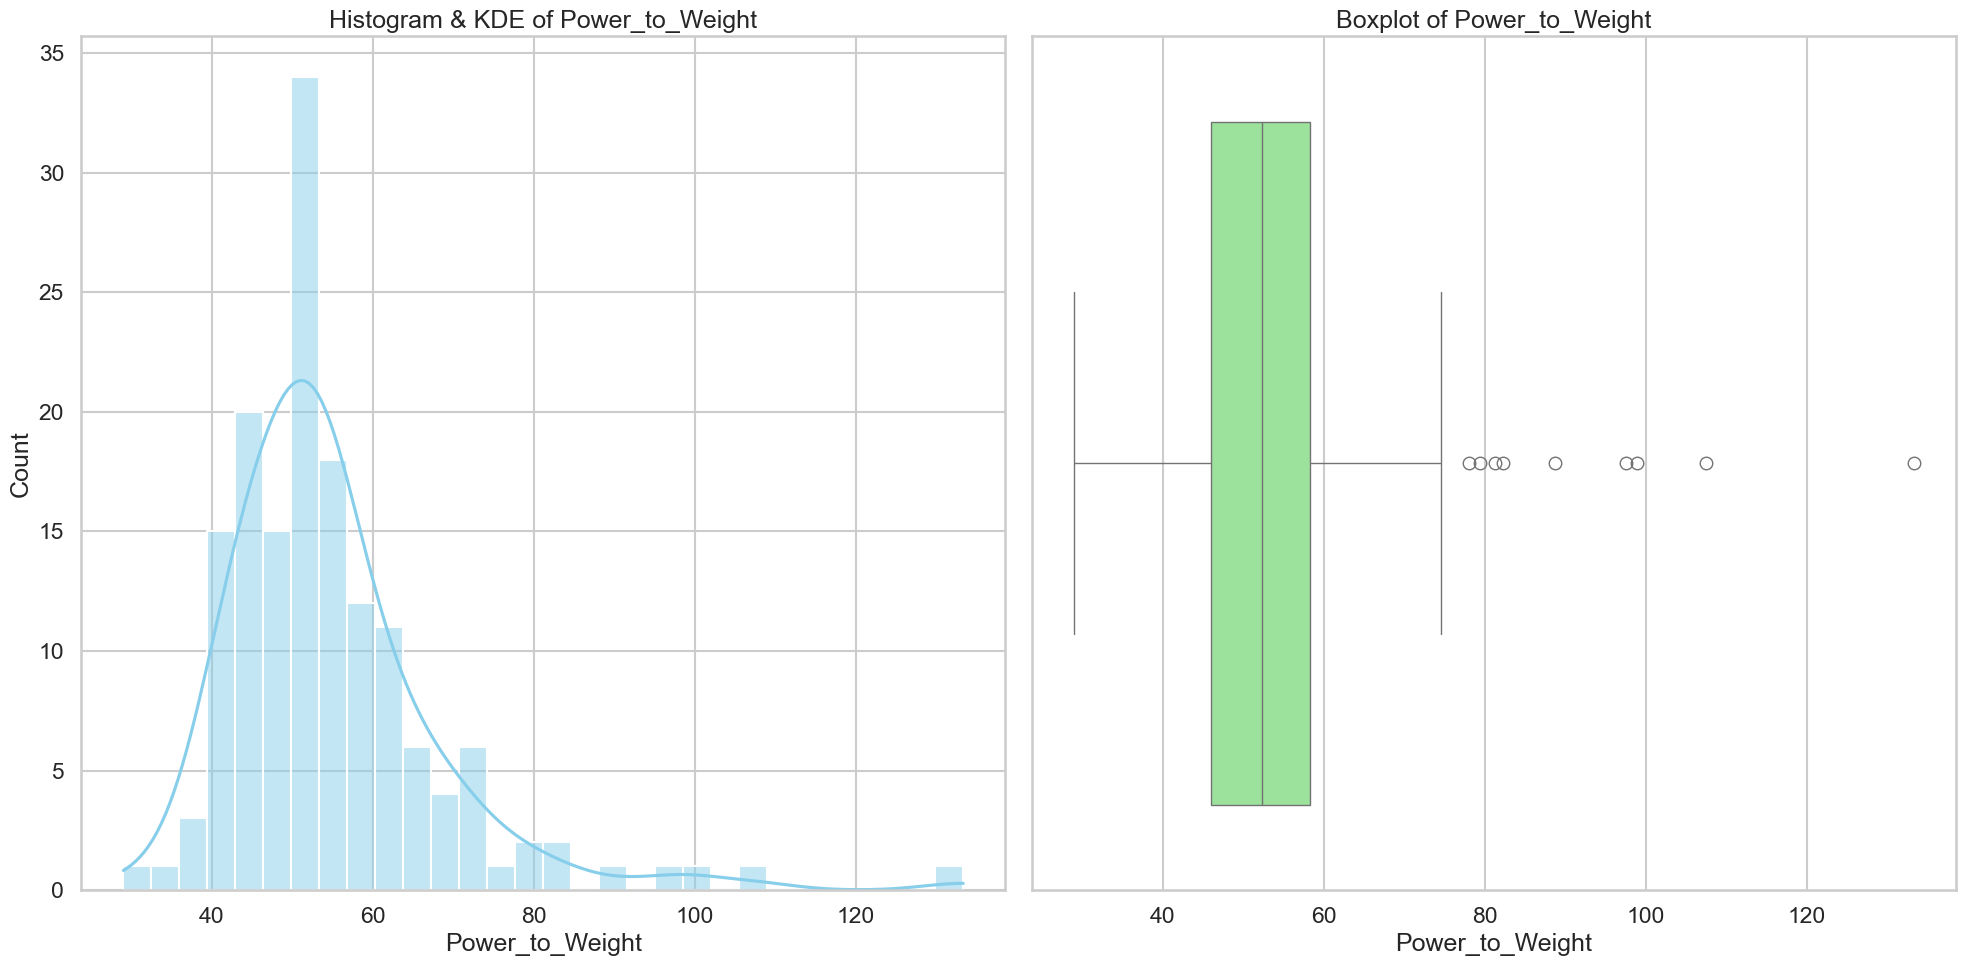


Column: Launch_Year
Skewness: -1.60
Highly left-skewed


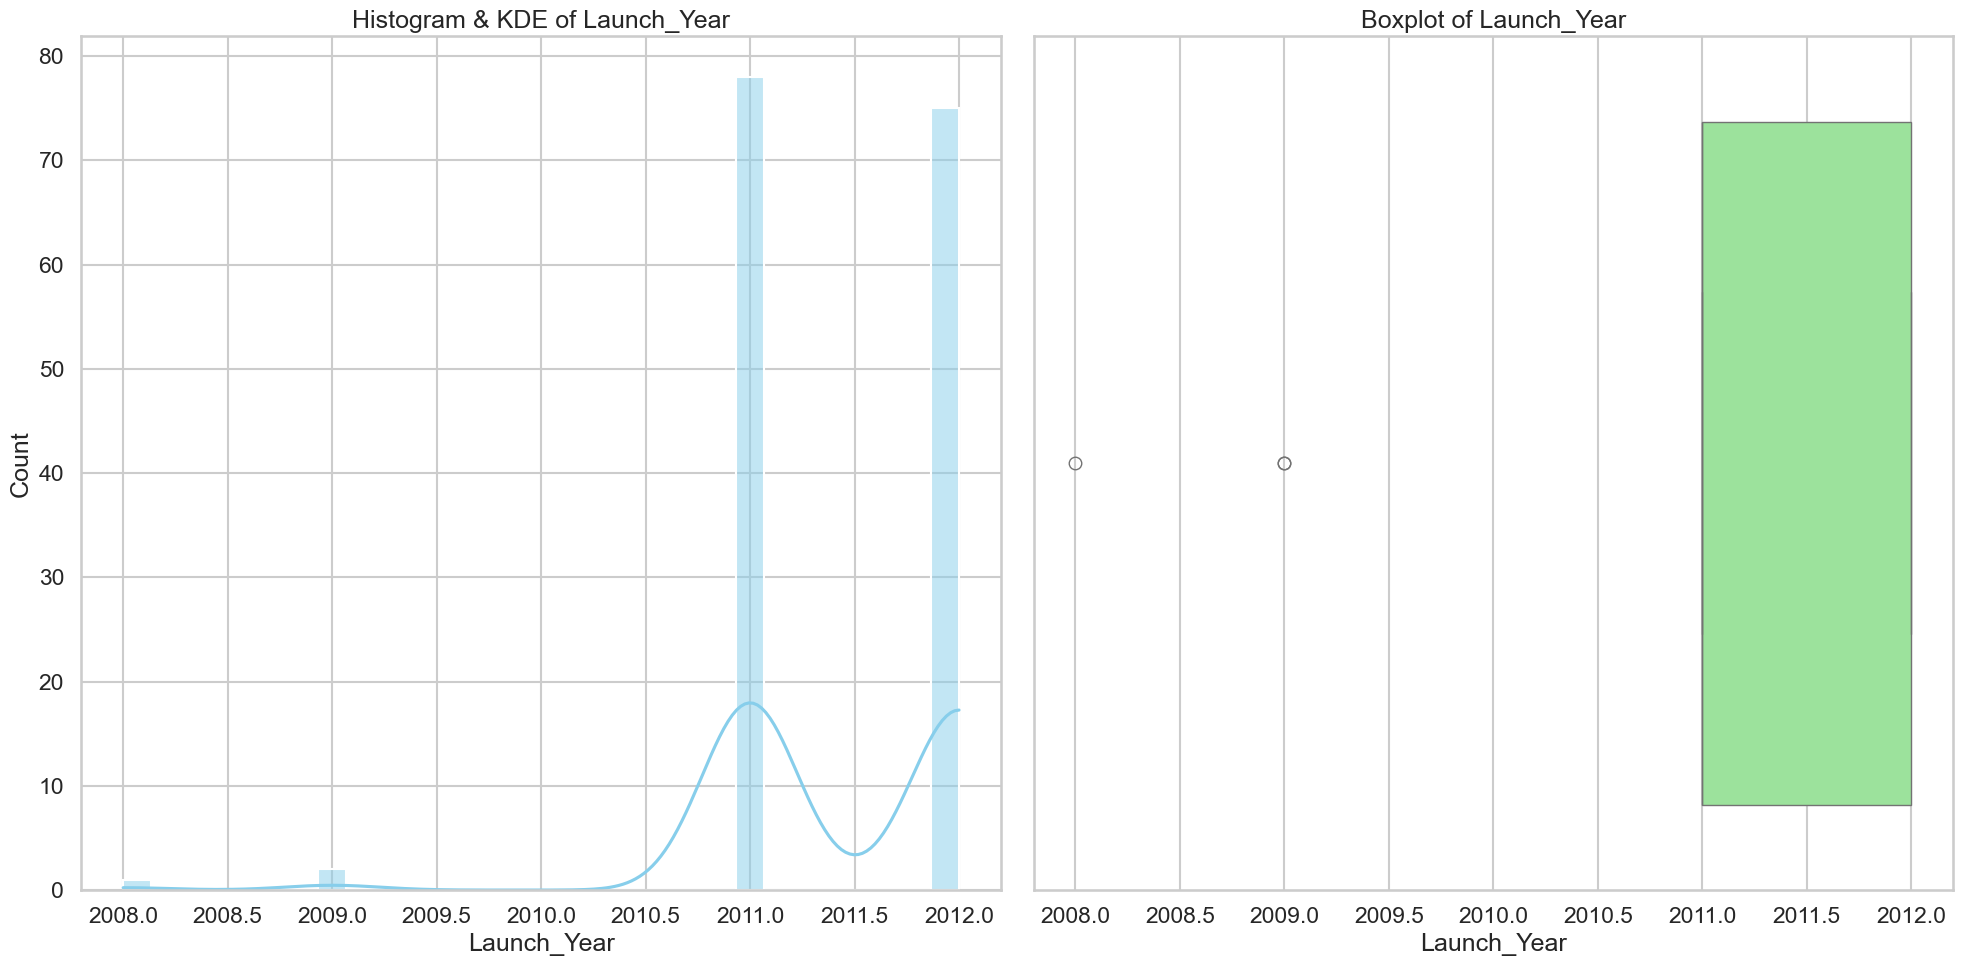

In [15]:
for col in numeric_cols:
    skewness = df[col].skew()
    print(f'\nColumn: {col}')
    print(f'Skewness: {skewness:.2f}')
    
    if skewness > 1: # type: ignore
        print('Highly right-skewed')
    elif skewness > 0.5:  # type: ignore
        print('Moderately right-skewed')
    elif skewness < -1: # type: ignore
        print('Highly left-skewed')
    elif skewness < -0.5: # type: ignore
        print('Moderately left-skewed')
    else:
        print('Approximately symmetric')
    
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen') # type: ignore
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### 4.2 Categorical Feature Counts

Analyzing categorical feature distributions like `Manufacturer`, `Vehicle_type`, and `Model`.  


Column: Manufacturer (Unique values: 30)


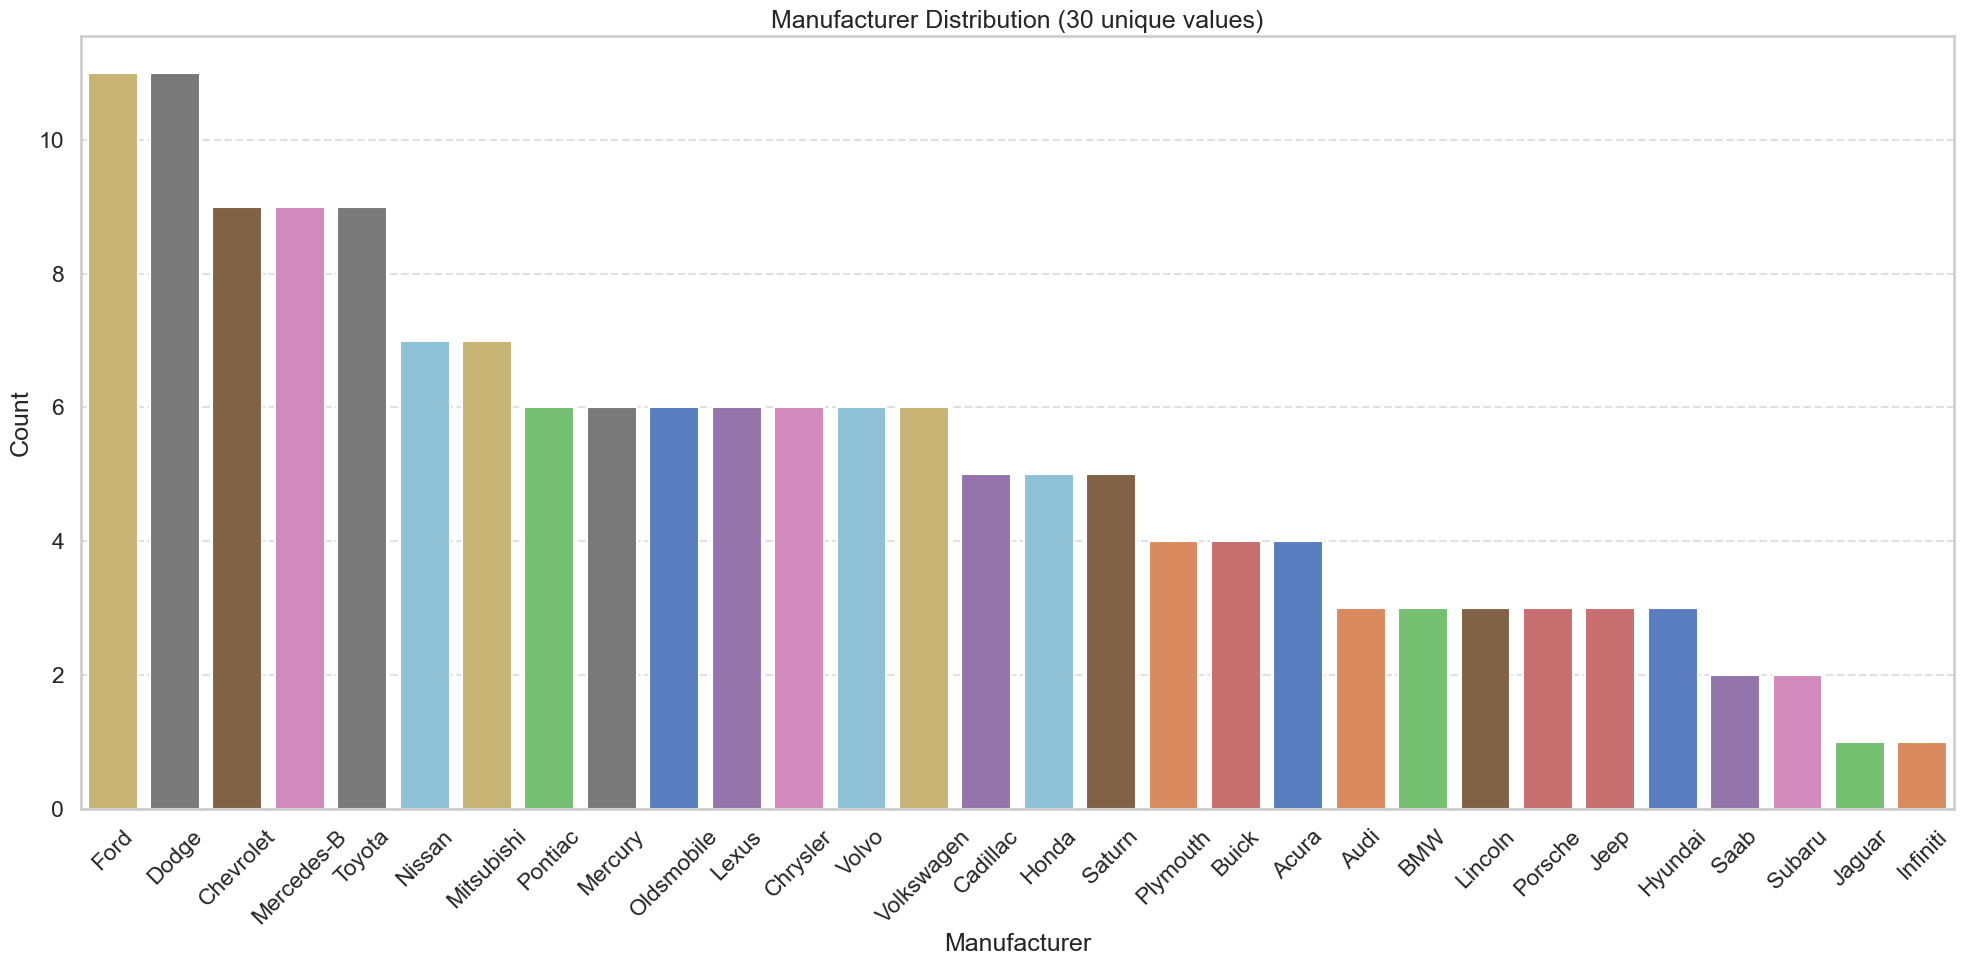


Column: Model (Unique values: 155)


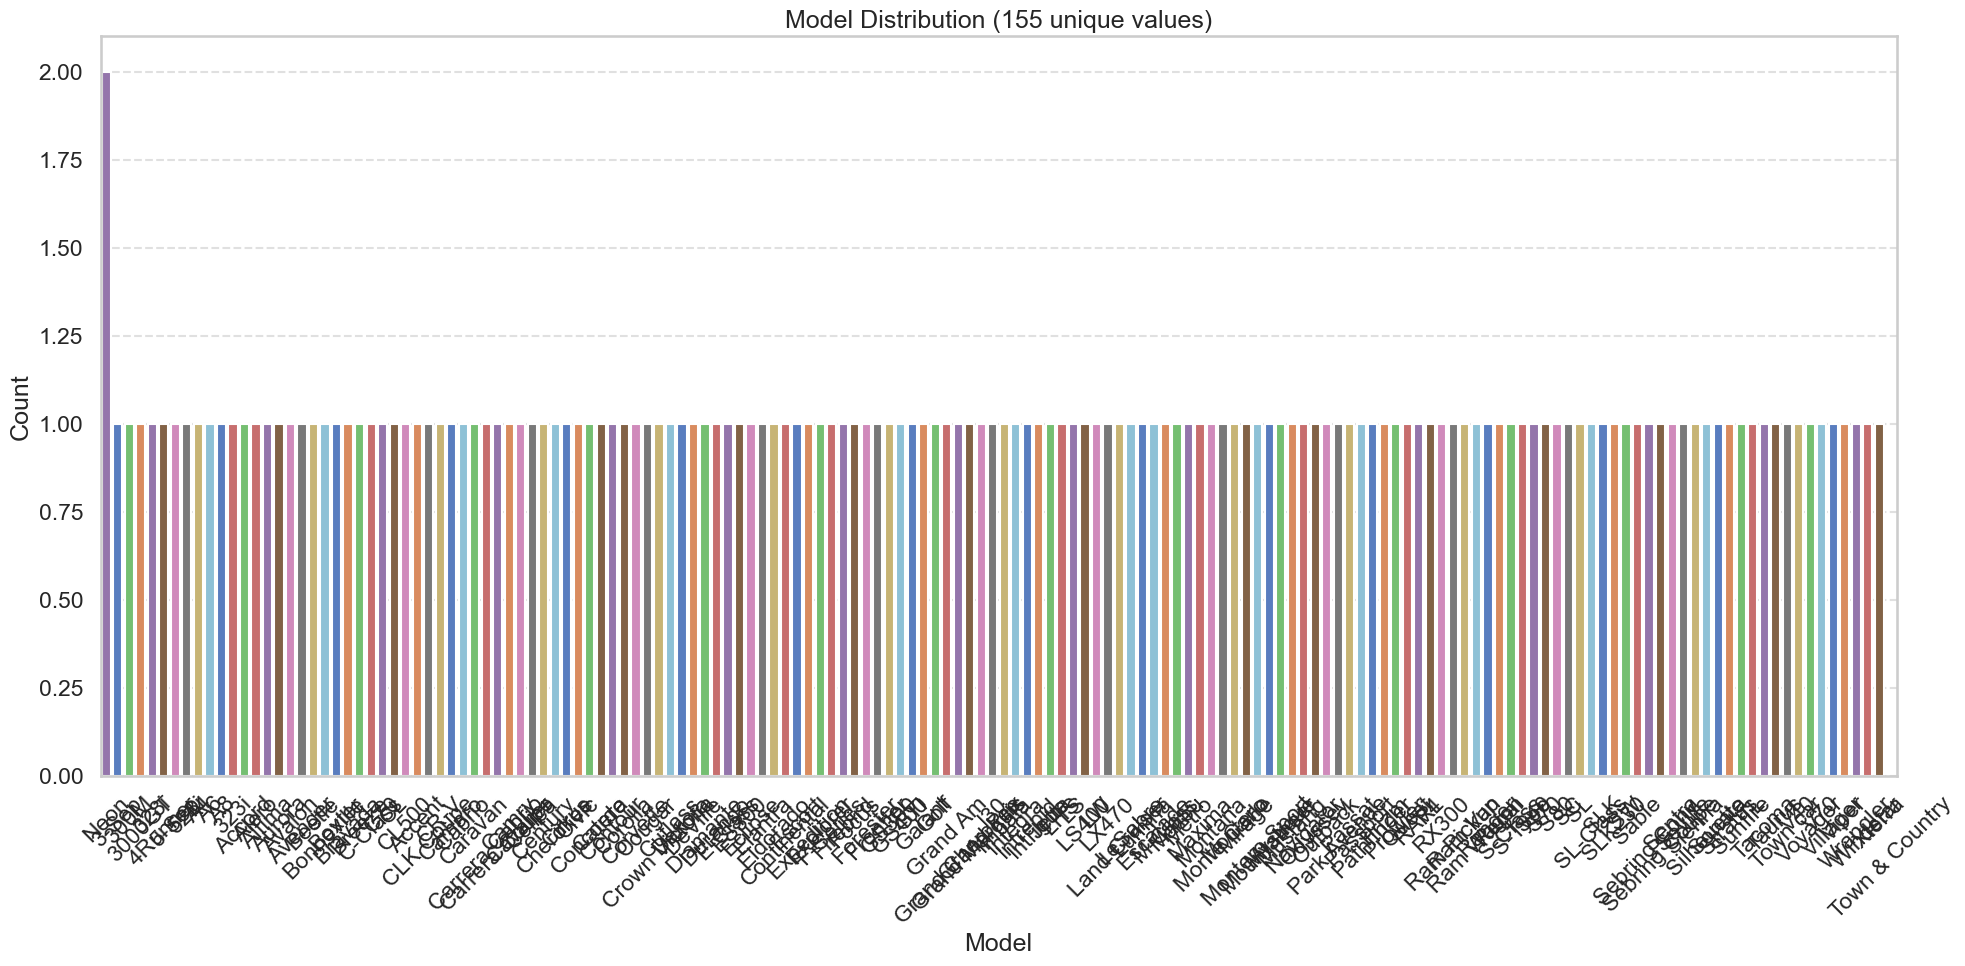


Column: Vehicle_type (Unique values: 2)


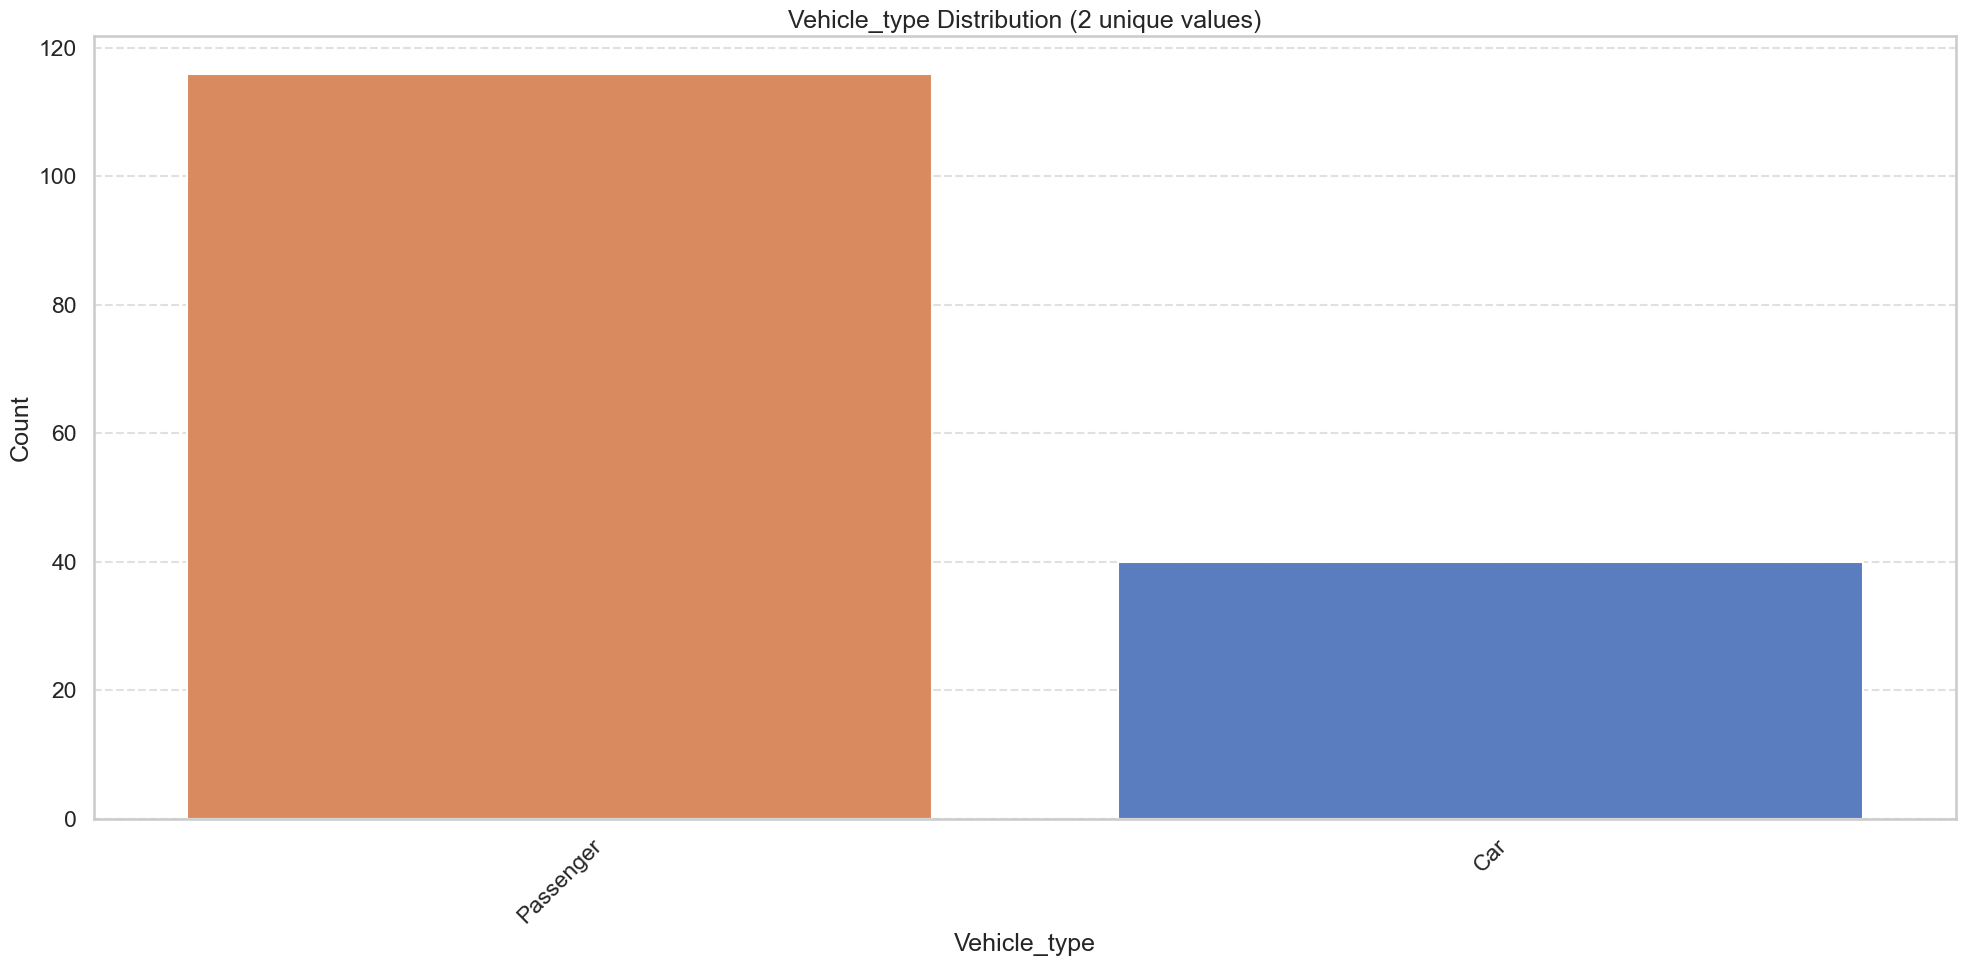

In [16]:
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f'\nColumn: {col} (Unique values: {unique_count})')
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted', hue=col, legend =False, dodge=False)
    plt.title(f'{col} Distribution ({unique_count} unique values)')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

### 4.3 Unique Models per Manufacturer

***How many models does each manufacturer offer?***

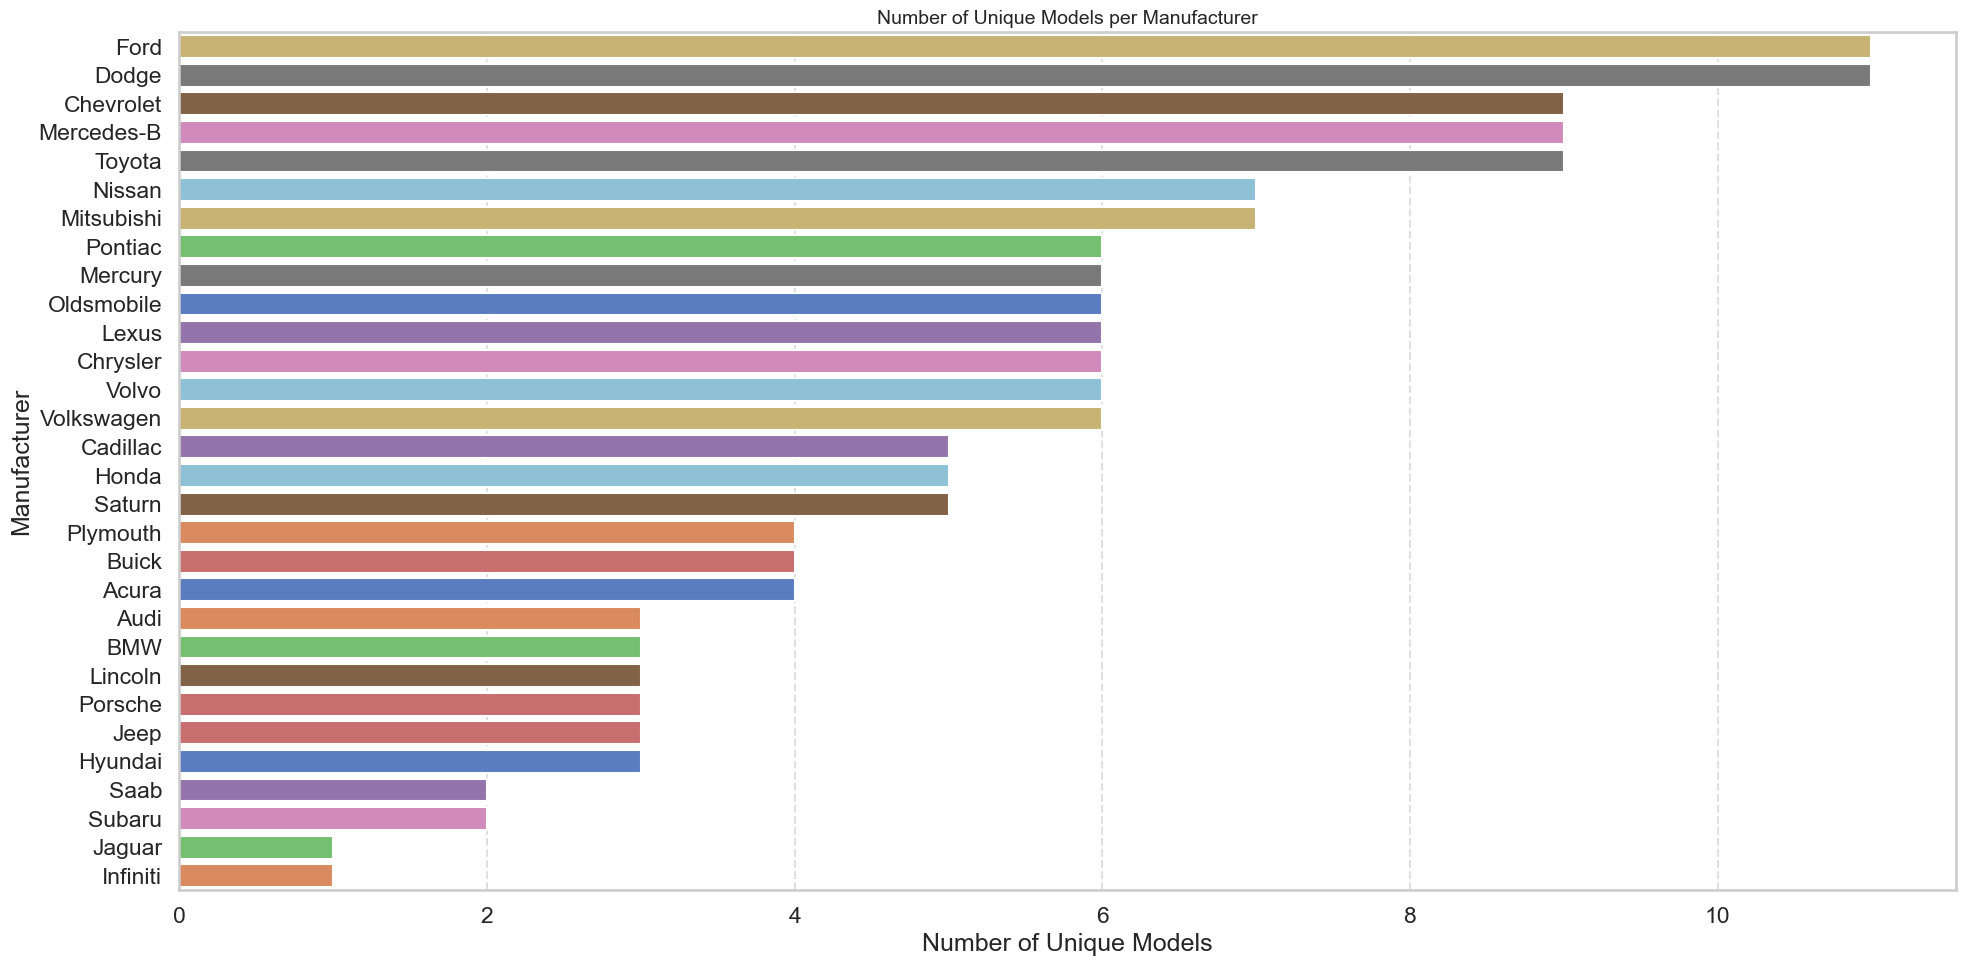

In [17]:
models_per_manufacturer = df.groupby('Manufacturer', observed=True)['Model'].nunique().sort_values(ascending=False)
sns.barplot(y=models_per_manufacturer.index, x=models_per_manufacturer.values, hue=models_per_manufacturer.index,
            order=models_per_manufacturer.index, palette='muted', legend=False, dodge=False)
plt.title('Number of Unique Models per Manufacturer', fontsize=14)
plt.xlabel('Number of Unique Models')
plt.ylabel('Manufacturer')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 4.4 Engine Size vs Horsepower

Examine the relationship between engine capacity and horsepower to verify expected linearity.

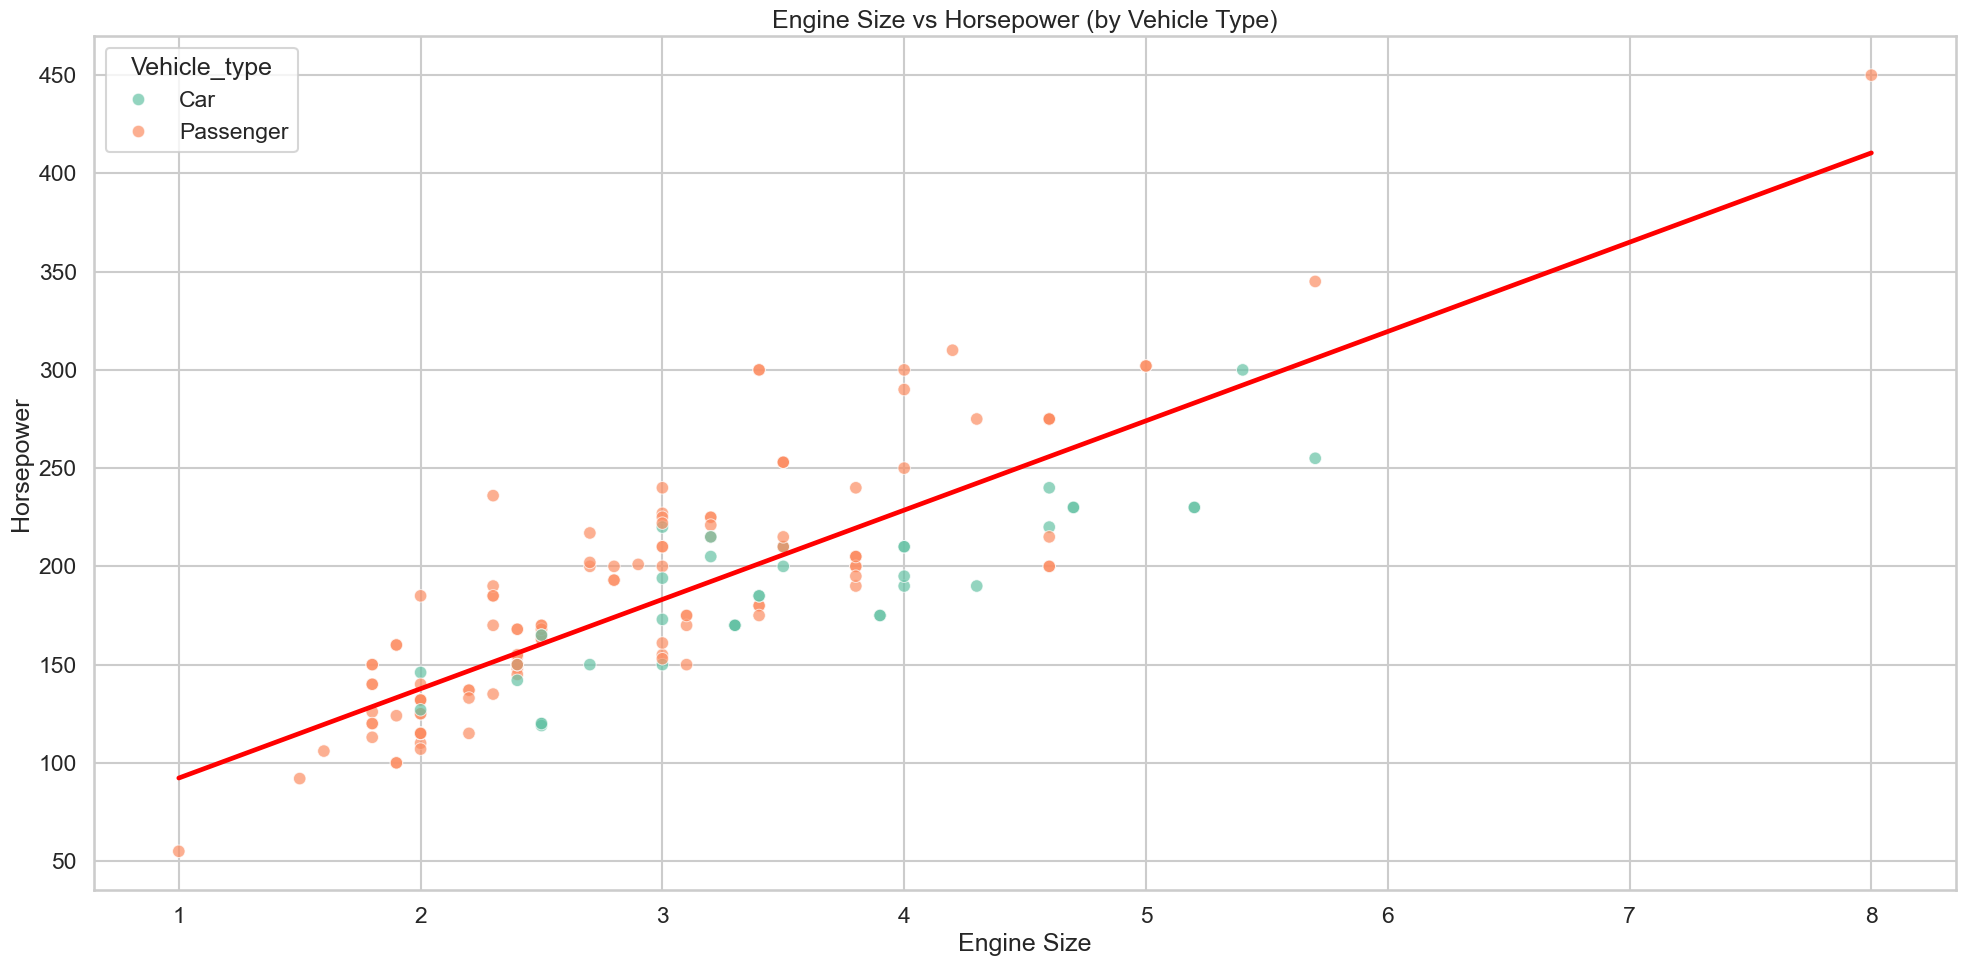

In [18]:
sns.scatterplot(data=df, x='Engine_size', y='Horsepower', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Engine_size', y='Horsepower', scatter=False, color='red', ci=None)
plt.title('Engine Size vs Horsepower (by Vehicle Type)')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.tight_layout()
plt.show()

### 4.5 Power-to-Weight Ratio vs Price

This chart visualizes how the **power-to-weight ratio** correlates with **pricing** — highlighting whether performance-oriented designs are priced at a premium.

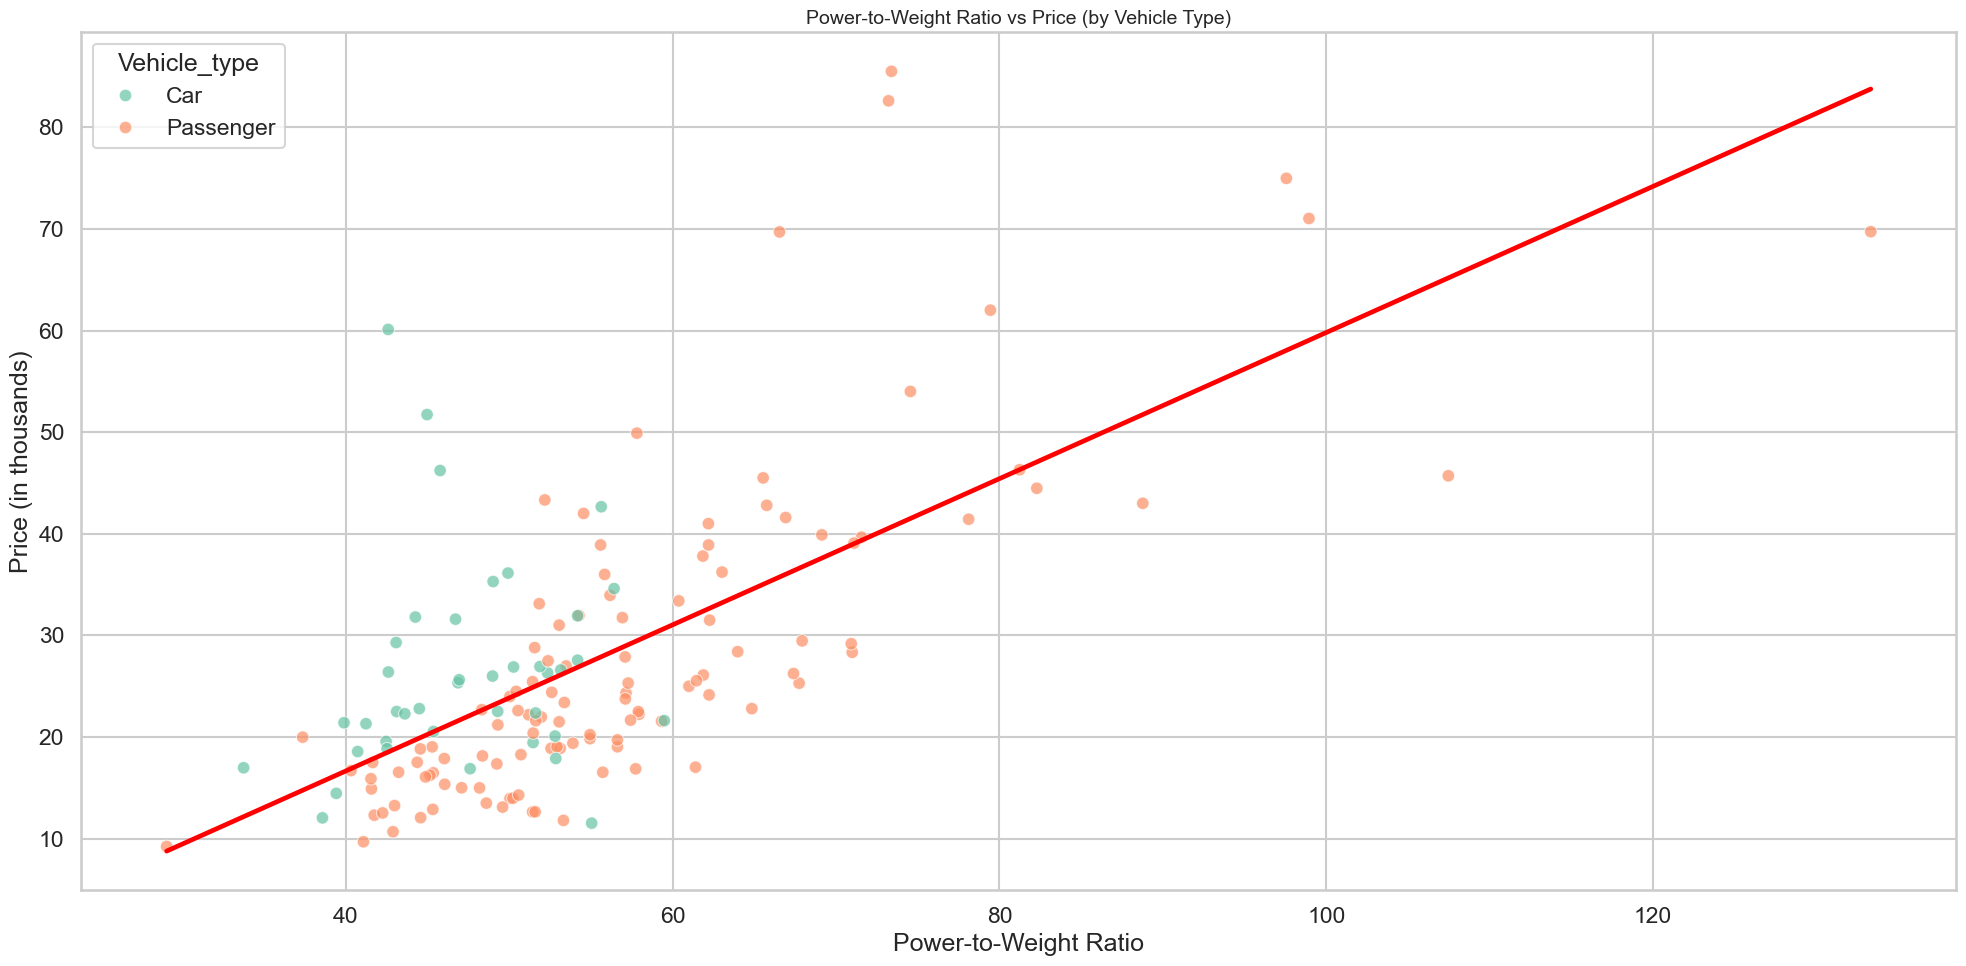

In [19]:
sns.scatterplot(data=df, x='Power_to_Weight', y='Price_in_thousands', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Power_to_Weight', y='Price_in_thousands', scatter=False, color='red', ci=None)
plt.title('Power-to-Weight Ratio vs Price (by Vehicle Type)', fontsize=14)
plt.xlabel('Power-to-Weight Ratio')
plt.ylabel('Price (in thousands)')
plt.tight_layout()
plt.show()

### 9.3 Power-to-Weight Ratio vs Fuel Efficiency

Explore whether improving performance comes at the cost of fuel efficiency.

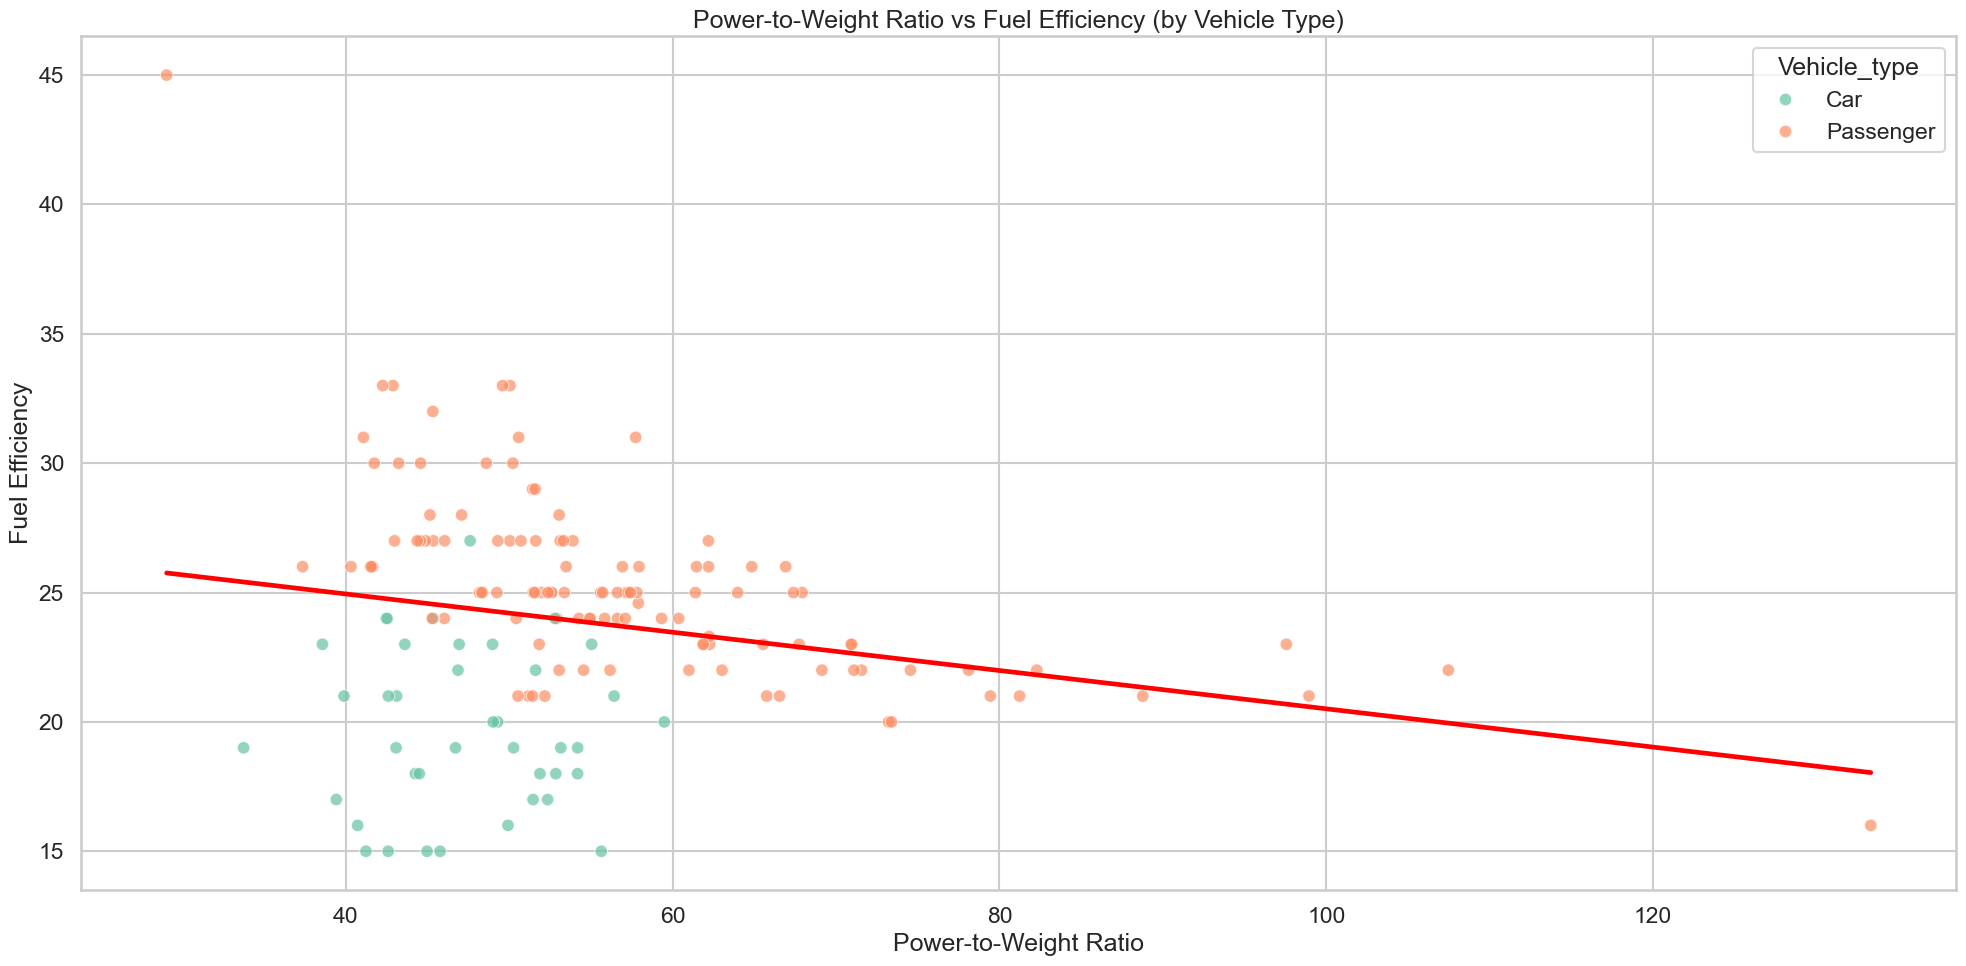

In [20]:
sns.scatterplot(data=df, x='Power_to_Weight', y='Fuel_efficiency', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Power_to_Weight', y='Fuel_efficiency', scatter=False, color='red', ci=None)
plt.title('Power-to-Weight Ratio vs Fuel Efficiency (by Vehicle Type)')
plt.xlabel('Power-to-Weight Ratio')
plt.ylabel('Fuel Efficiency')
plt.tight_layout()
plt.show()

💬 *Insight:* Higher power-to-weight ratios generally align with higher prices, confirming that performance cars command premium pricing.*

💬 *Insight:* As performance (power-to-weight ratio) increases, fuel efficiency tends to decline — demonstrating a clear trade-off between power and economy.*


## 5. Car Pricing Analysis

### 5.1 Average Price per Manufacturer

Compare average vehicle prices across manufacturers to identify premium vs mass-market players.

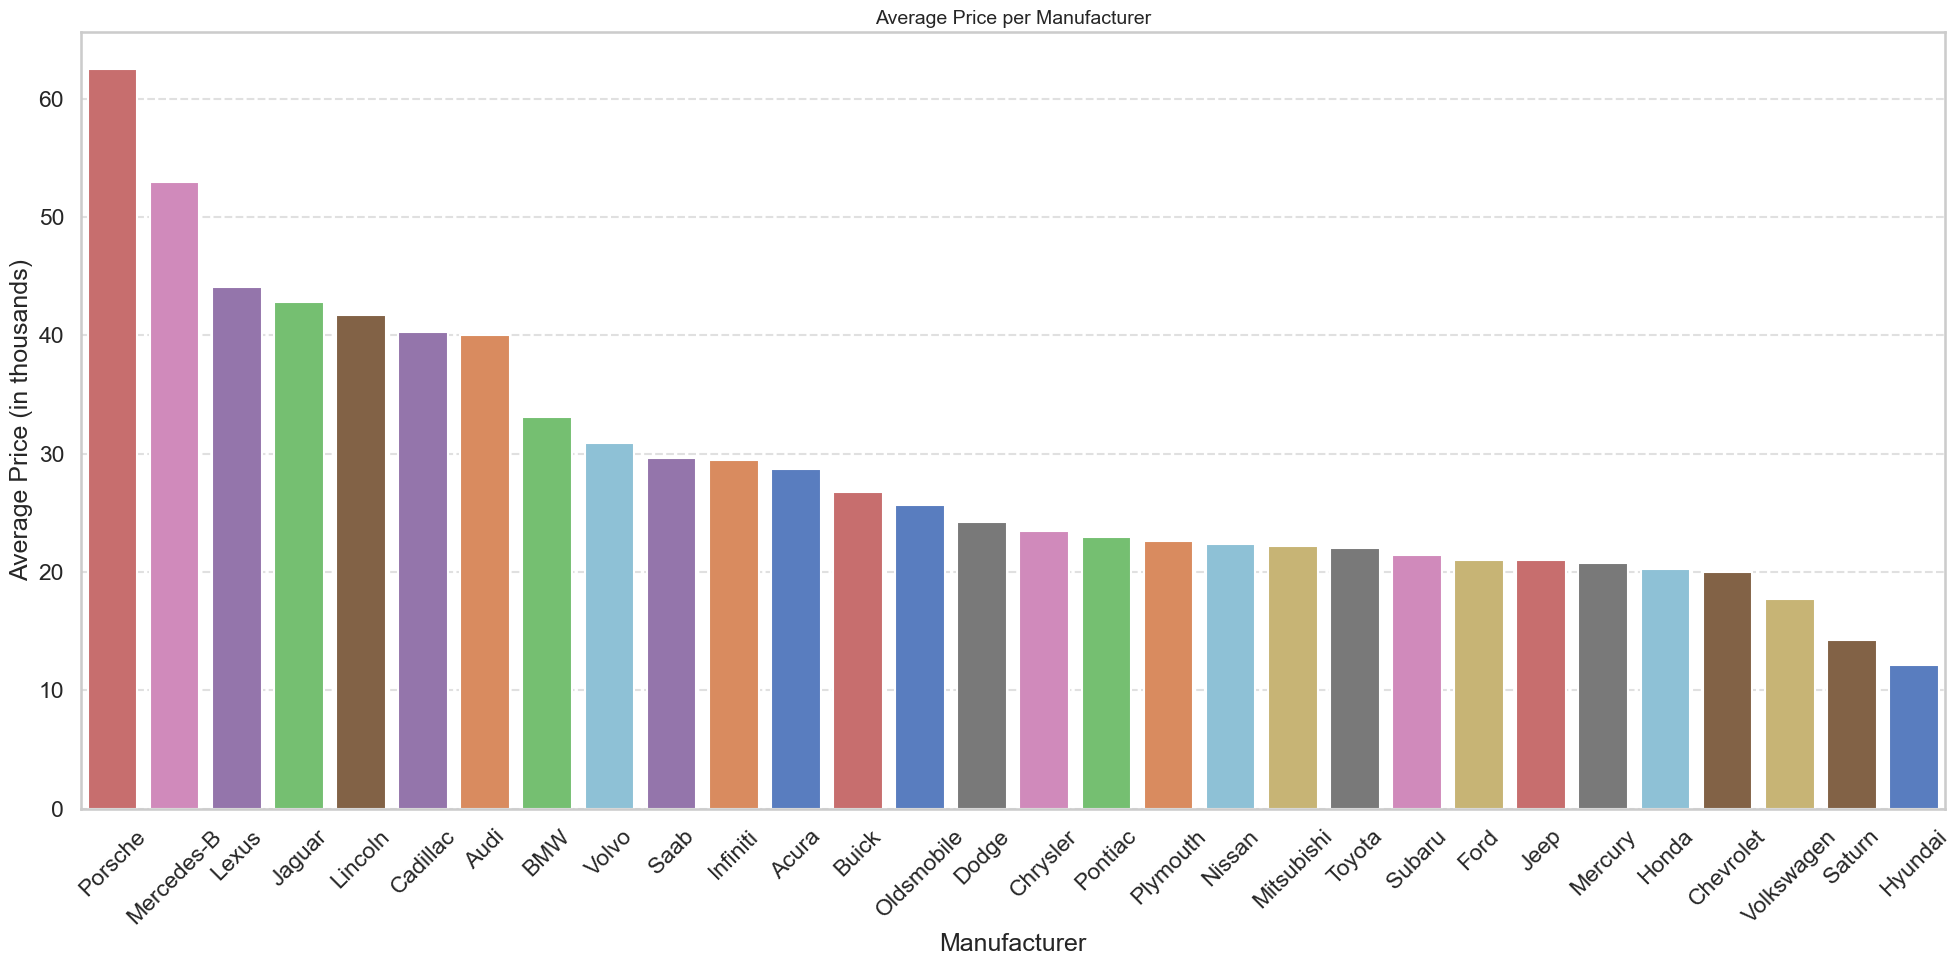

In [21]:
manufacturer_price_df = (df.groupby('Manufacturer', observed=True)['Price_in_thousands'].mean().sort_values(ascending=False).reset_index())
manufacturer_order_list = manufacturer_price_df['Manufacturer']
sns.barplot(data=manufacturer_price_df, x='Manufacturer', y='Price_in_thousands', order=manufacturer_order_list,hue='Manufacturer', legend=False, palette='muted',dodge=False)
plt.xticks(rotation=45)
plt.title('Average Price per Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.2 Price Distribution by Vehicle Type

Use boxplots to see how price varies between vehicle types.

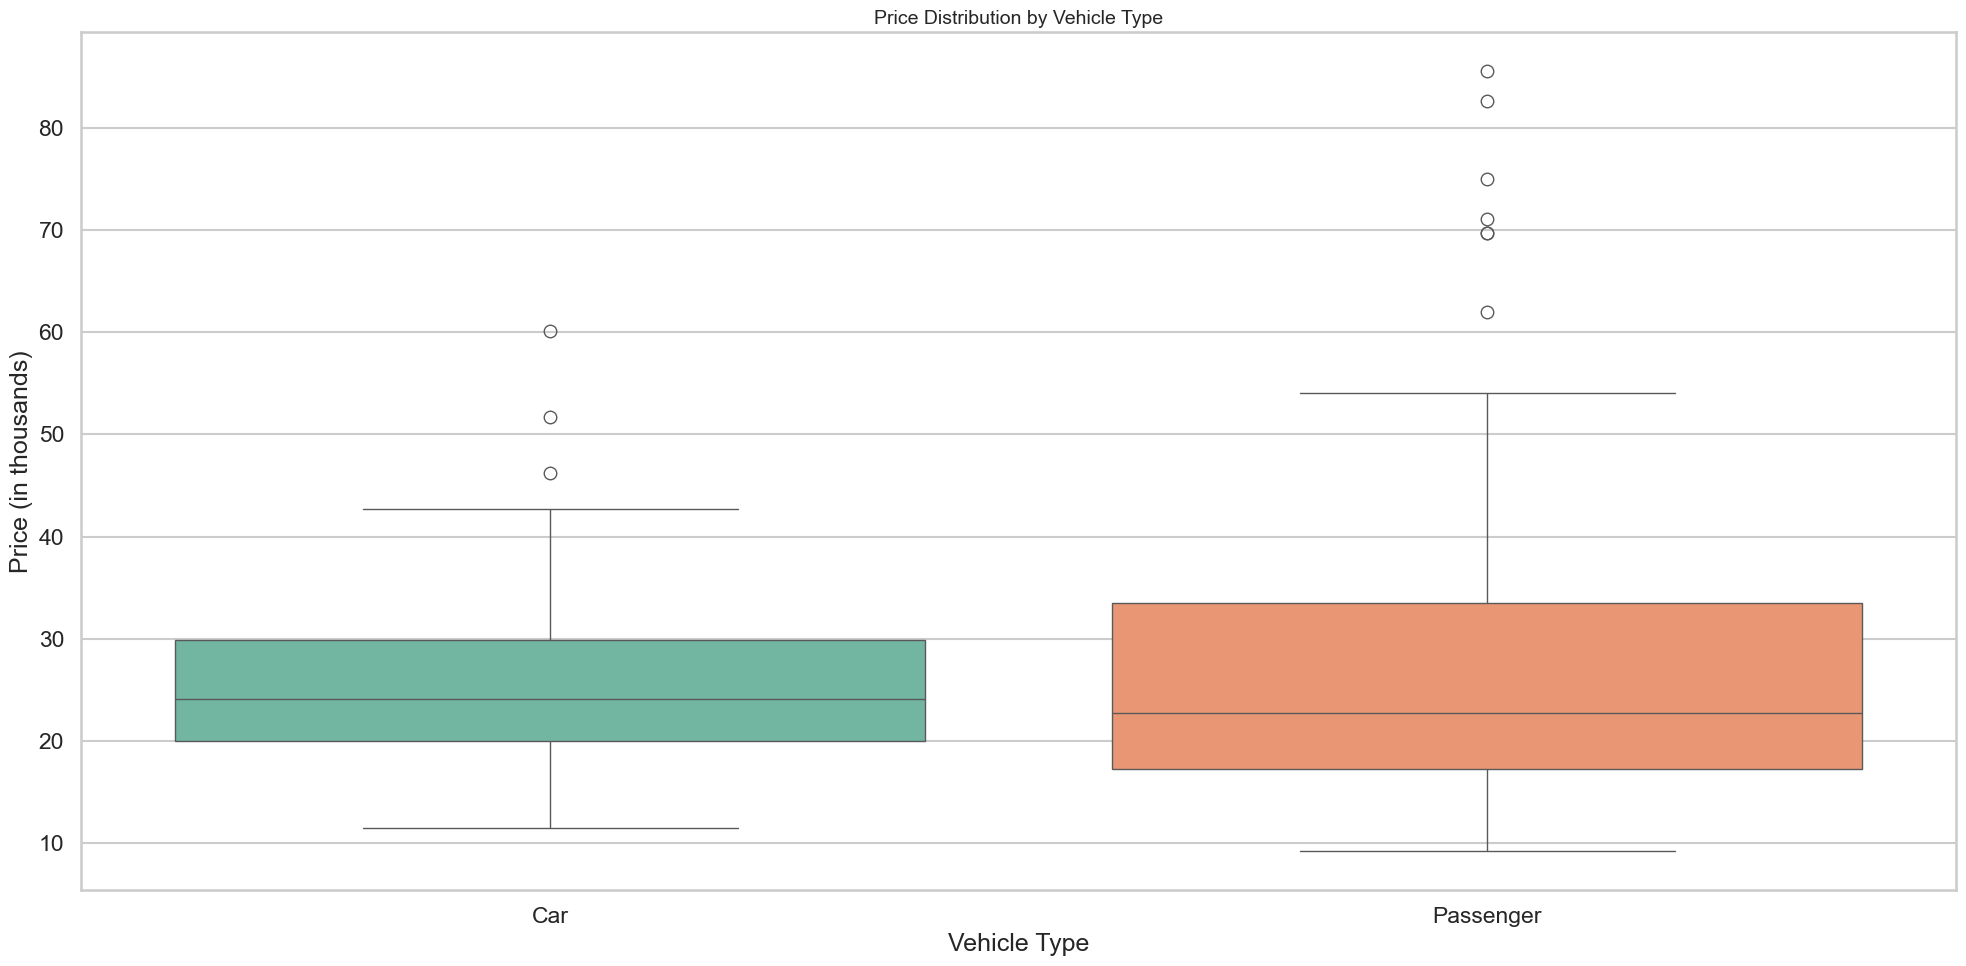

In [22]:
sns.boxplot(data=df, x='Vehicle_type', y='Price_in_thousands', hue='Vehicle_type', palette='Set2', legend=False)
plt.title('Price Distribution by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Price (in thousands)')
plt.tight_layout()
plt.show()

## 5.3 Top 10 Most Expensive Models

Identify the top 10 car models by average price.

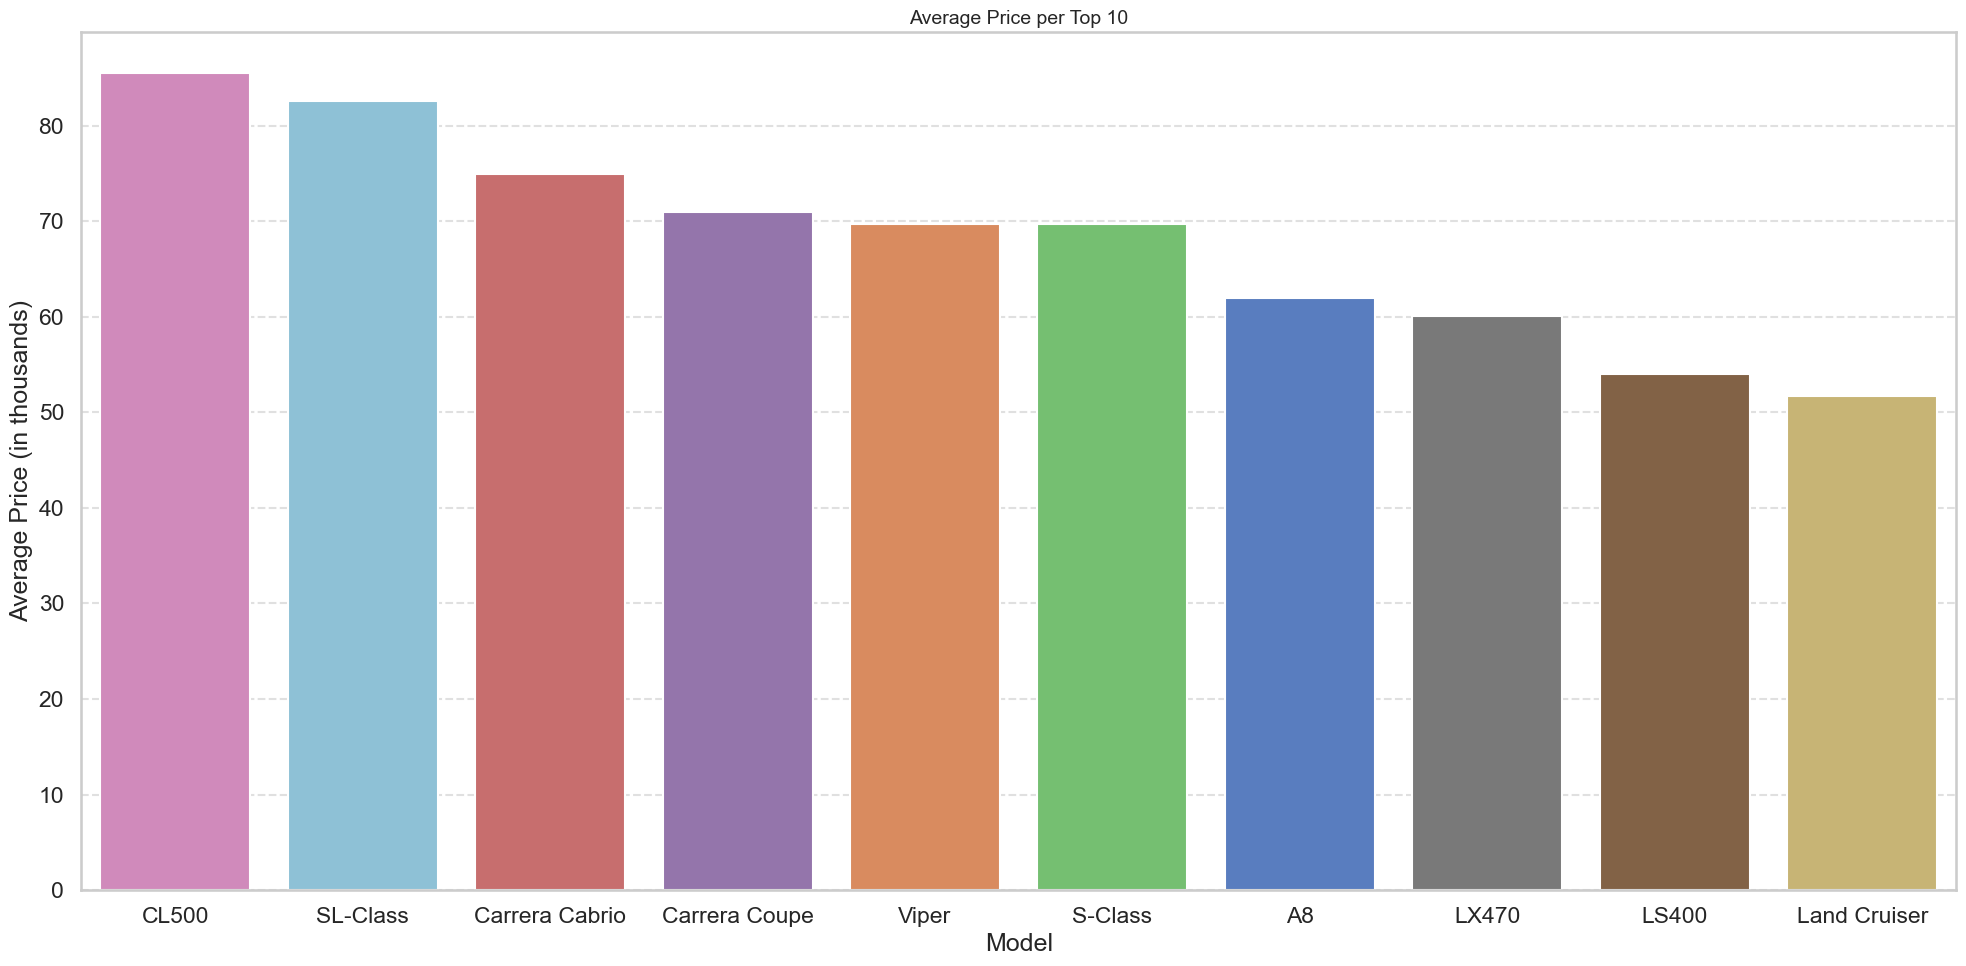

In [23]:
model_price_df = (df.groupby('Model', observed=True)['Price_in_thousands'].mean().sort_values(ascending=False).reset_index())
top_models_df = model_price_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']
sns.barplot(data=top_models_df, x='Model', y='Price_in_thousands', hue='Model', order=model_order_list, palette='muted', legend=False, dodge=False)
plt.title(f'Average Price per Top {TOP_N_MODELS}', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Price (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 5.4 Correlation of Numeric Features with Price

Barplot of correlation coefficients to identify price-driving numeric variables.

Only features with strong correlations will be explored further.

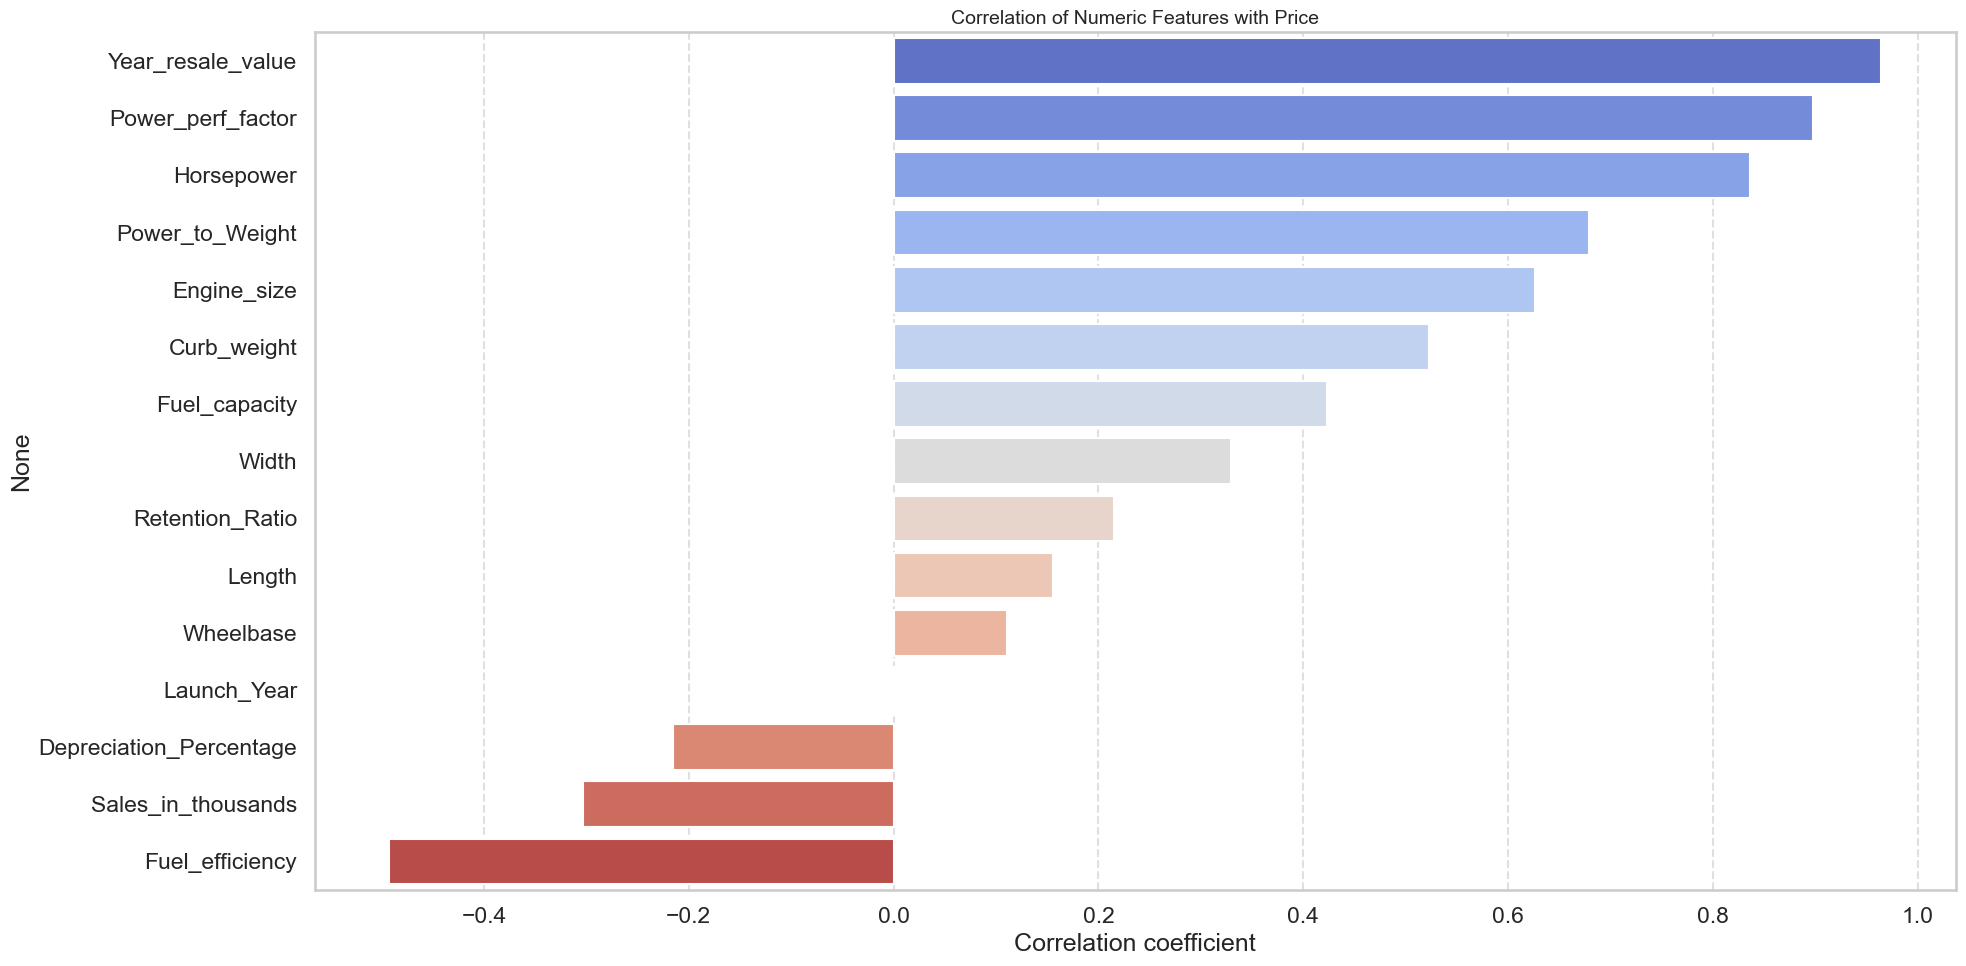

Selected price-driving features:
 ['Year_resale_value', 'Engine_size', 'Horsepower', 'Power_perf_factor', 'Power_to_Weight']


In [24]:
price_corr = corr_matrix['Price_in_thousands'].drop('Price_in_thousands')
price_corr_sorted = price_corr.sort_values(ascending=False)

sns.barplot(x=price_corr_sorted.values, y=price_corr_sorted.index, hue=price_corr_sorted.index, palette='coolwarm', legend=False, dodge=False)
plt.title('Correlation of Numeric Features with Price', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Select features with |correlation| >= threshold
selected_price_features = price_corr[price_corr.abs() >= threshold].index.tolist()
print('Selected price-driving features:\n', selected_price_features)

## 5.4.1 Performance Features vs Price

Scatter and regression plots show relationships between key performance metrics and price.

Performance features influencing price:
 ['Engine_size', 'Horsepower', 'Power_perf_factor']


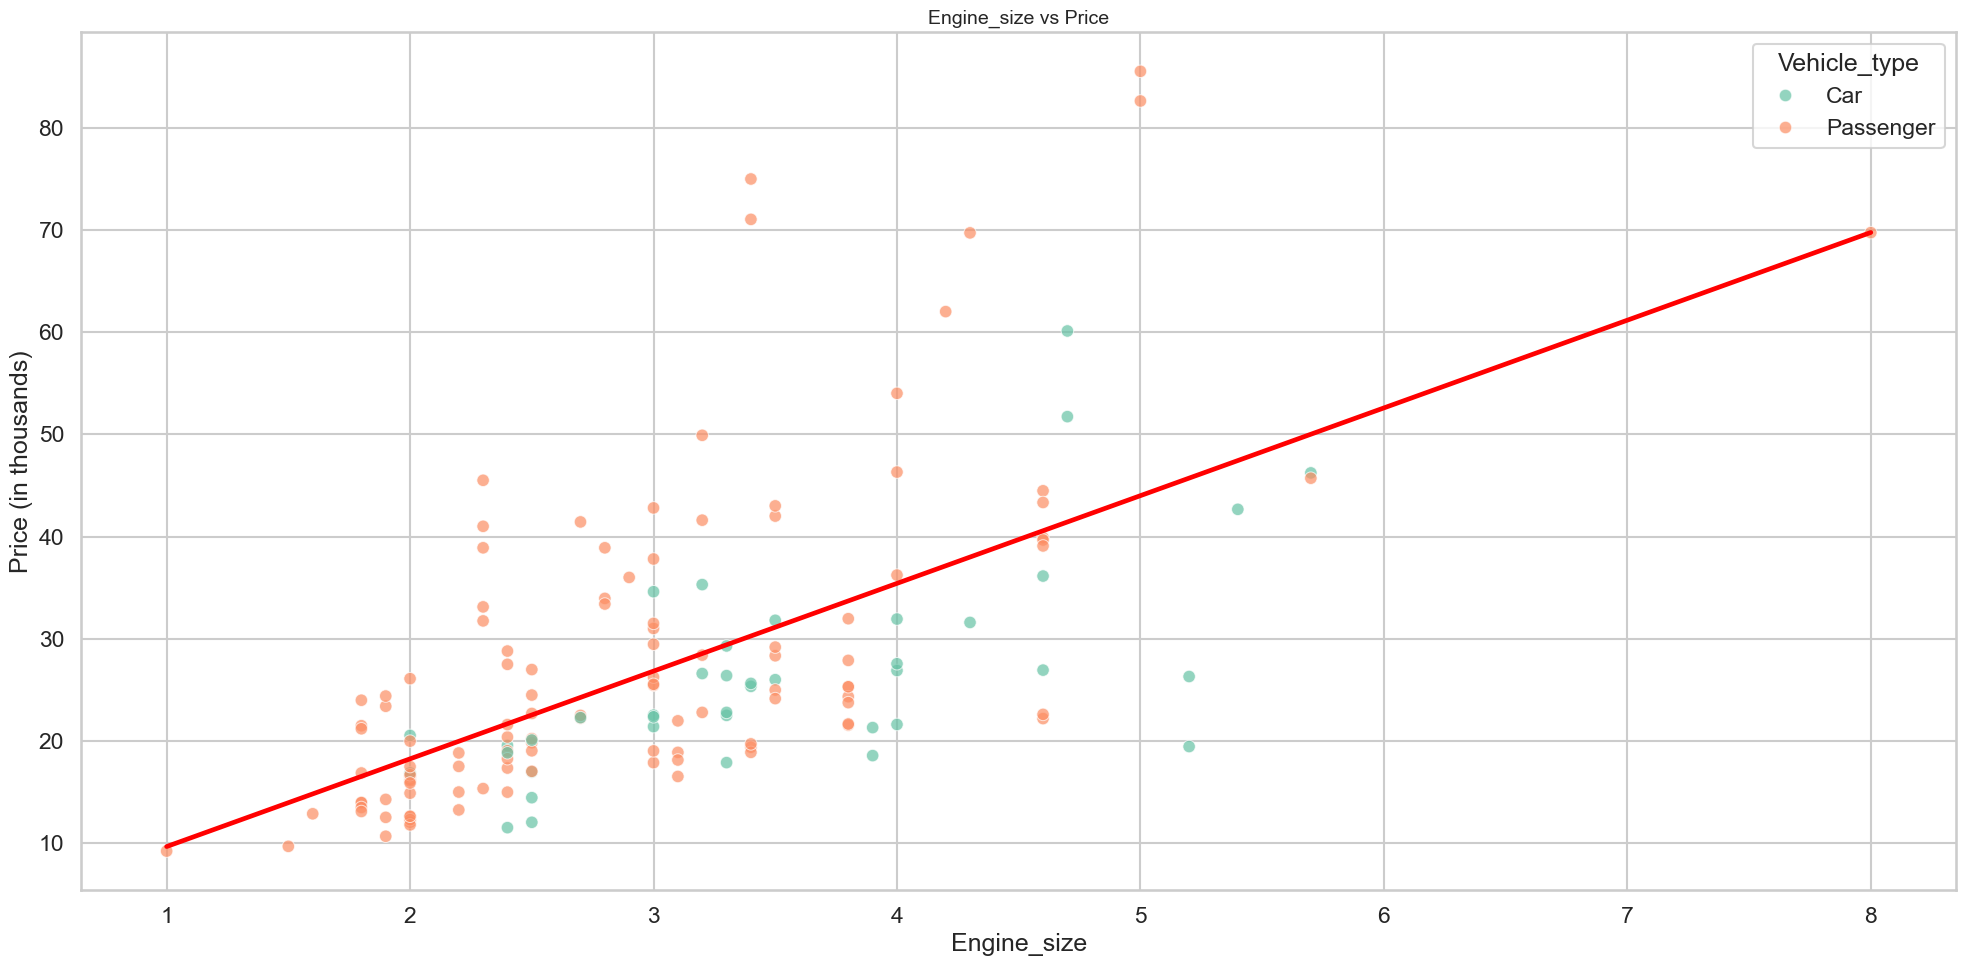

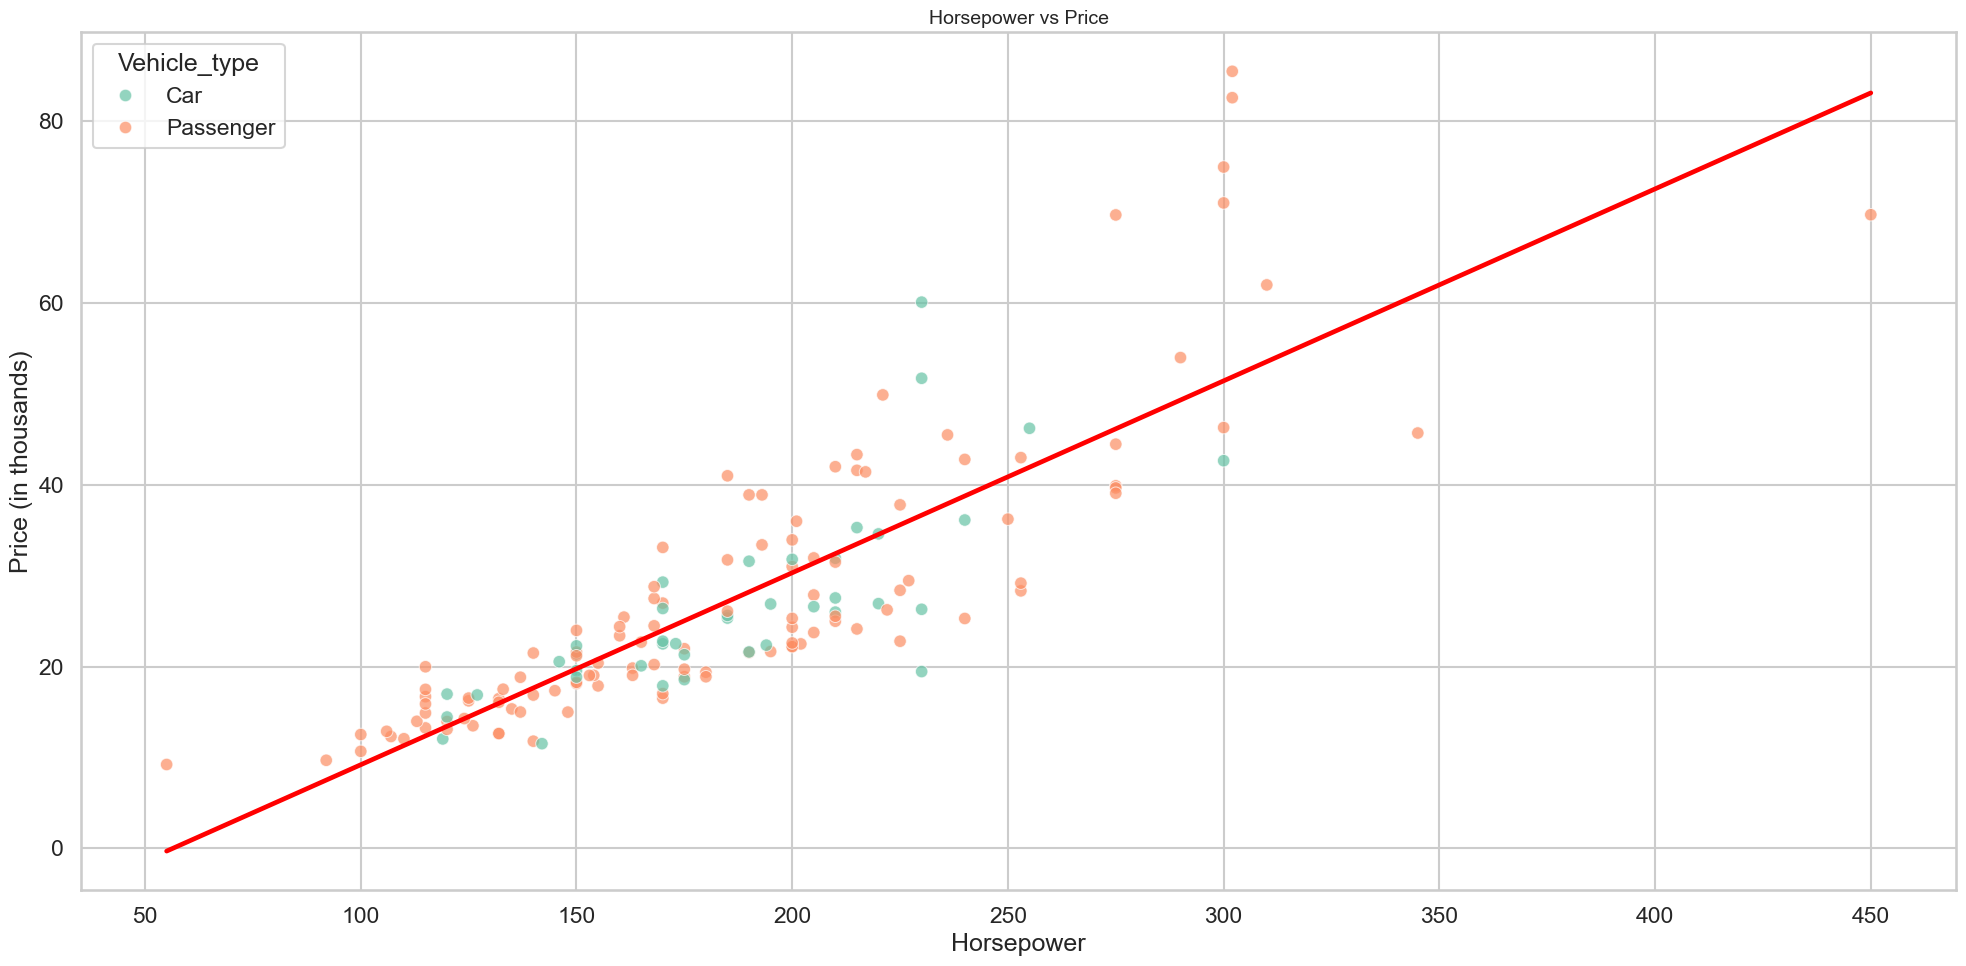

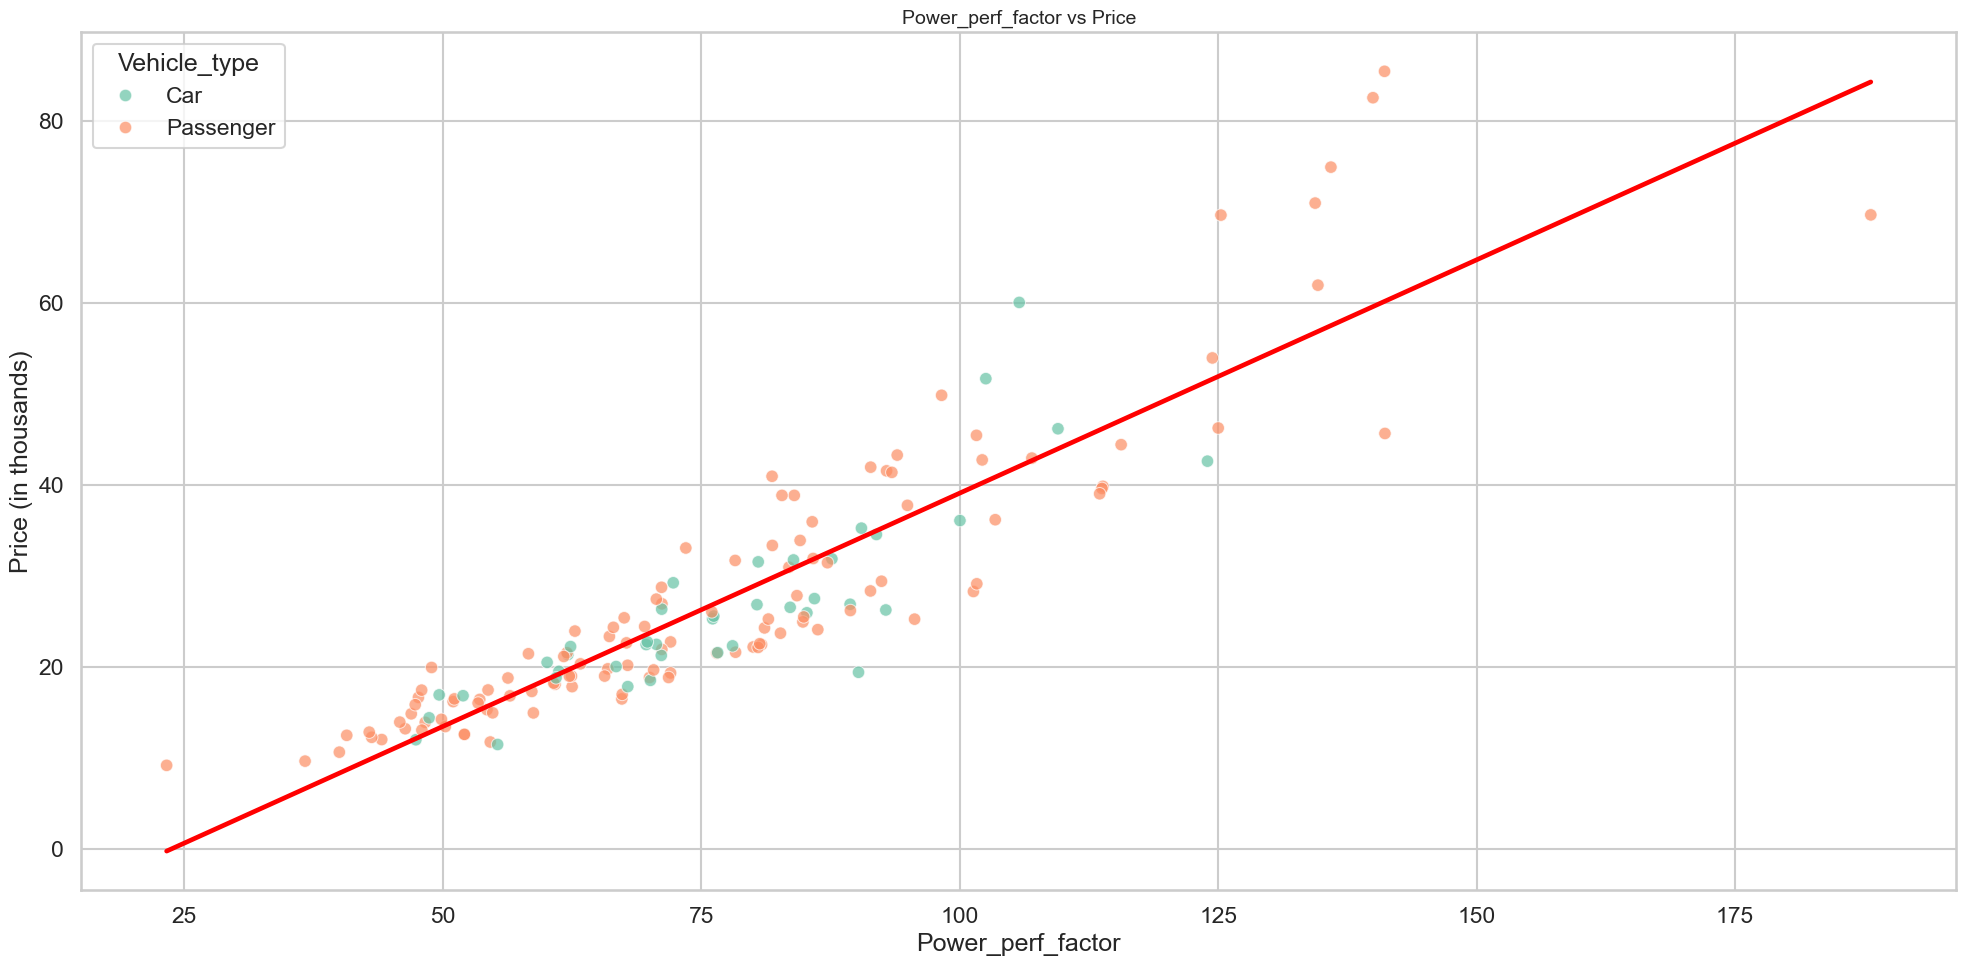

In [25]:
performance_price = [f for f in performance_features if f in selected_price_features]
print('Performance features influencing price:\n', performance_price)

if len(performance_price) > 0:
    for feature in performance_price:
        sns.scatterplot(data=df, x=feature, y='Price_in_thousands', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Price', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Price (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print('No strongly correlated performance features found — skipping performance plots.')

## 5.4.2 Design Features vs Price

Visualize how vehicle design attributes (wheelbase, doors, length, etc.) relate to price.

In [26]:
design_price = [f for f in design_features if f in selected_price_features]
print("Design features influencing price:\n", design_price)

if len(design_price) > 0:
    for feature in design_price:
        sns.scatterplot(data=df, x=feature, y='Price_in_thousands', hue='Vehicle_type',alpha=0.7, palette='Set2', legend=False)
        sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Price', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Price (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

Design features influencing price:
 []
No strongly correlated design features found — skipping design plots.


### 💬 Pricing Insights:

Premium manufacturers and performance-heavy models command higher prices.

Performance metrics (engine size, horsepower) are the most significant price drivers, while design factors play a smaller supporting role.

## 6. Market Trends & Sales Insights

Analyzing sales volume, price, and manufacturer dominance to understand market positioning.

### 6.1 Manufacturer Sales Share

Compare total sales per manufacturer to identify market leaders.

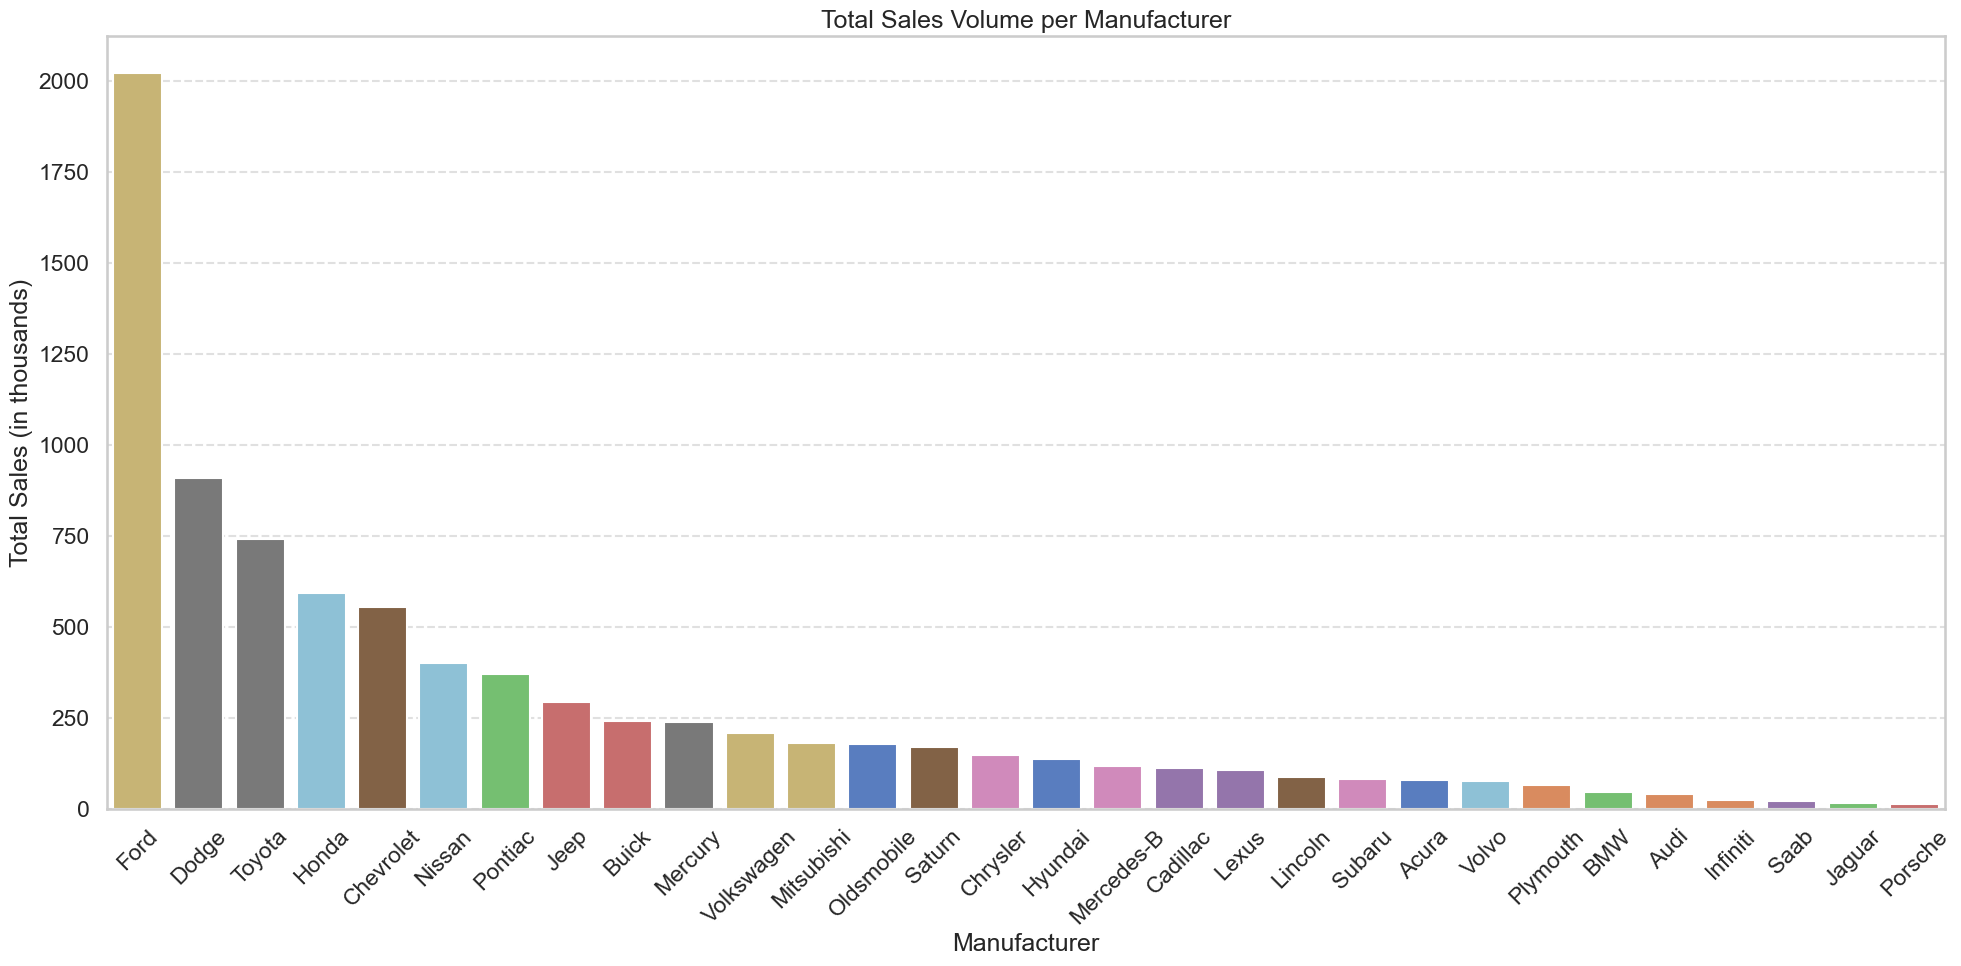

In [27]:
manufacturer_sales_df = (df.groupby('Manufacturer', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())
manufacturer_order_list = manufacturer_sales_df['Manufacturer']
sns.barplot(data=manufacturer_sales_df, x='Manufacturer', y='Sales_in_thousands', order=manufacturer_order_list,hue='Manufacturer', legend=False, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Total Sales Volume per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 6.2 Sales Distribution by Vehicle Type

Analyze the spread of sales for each vehicle type to detect popularity trends.

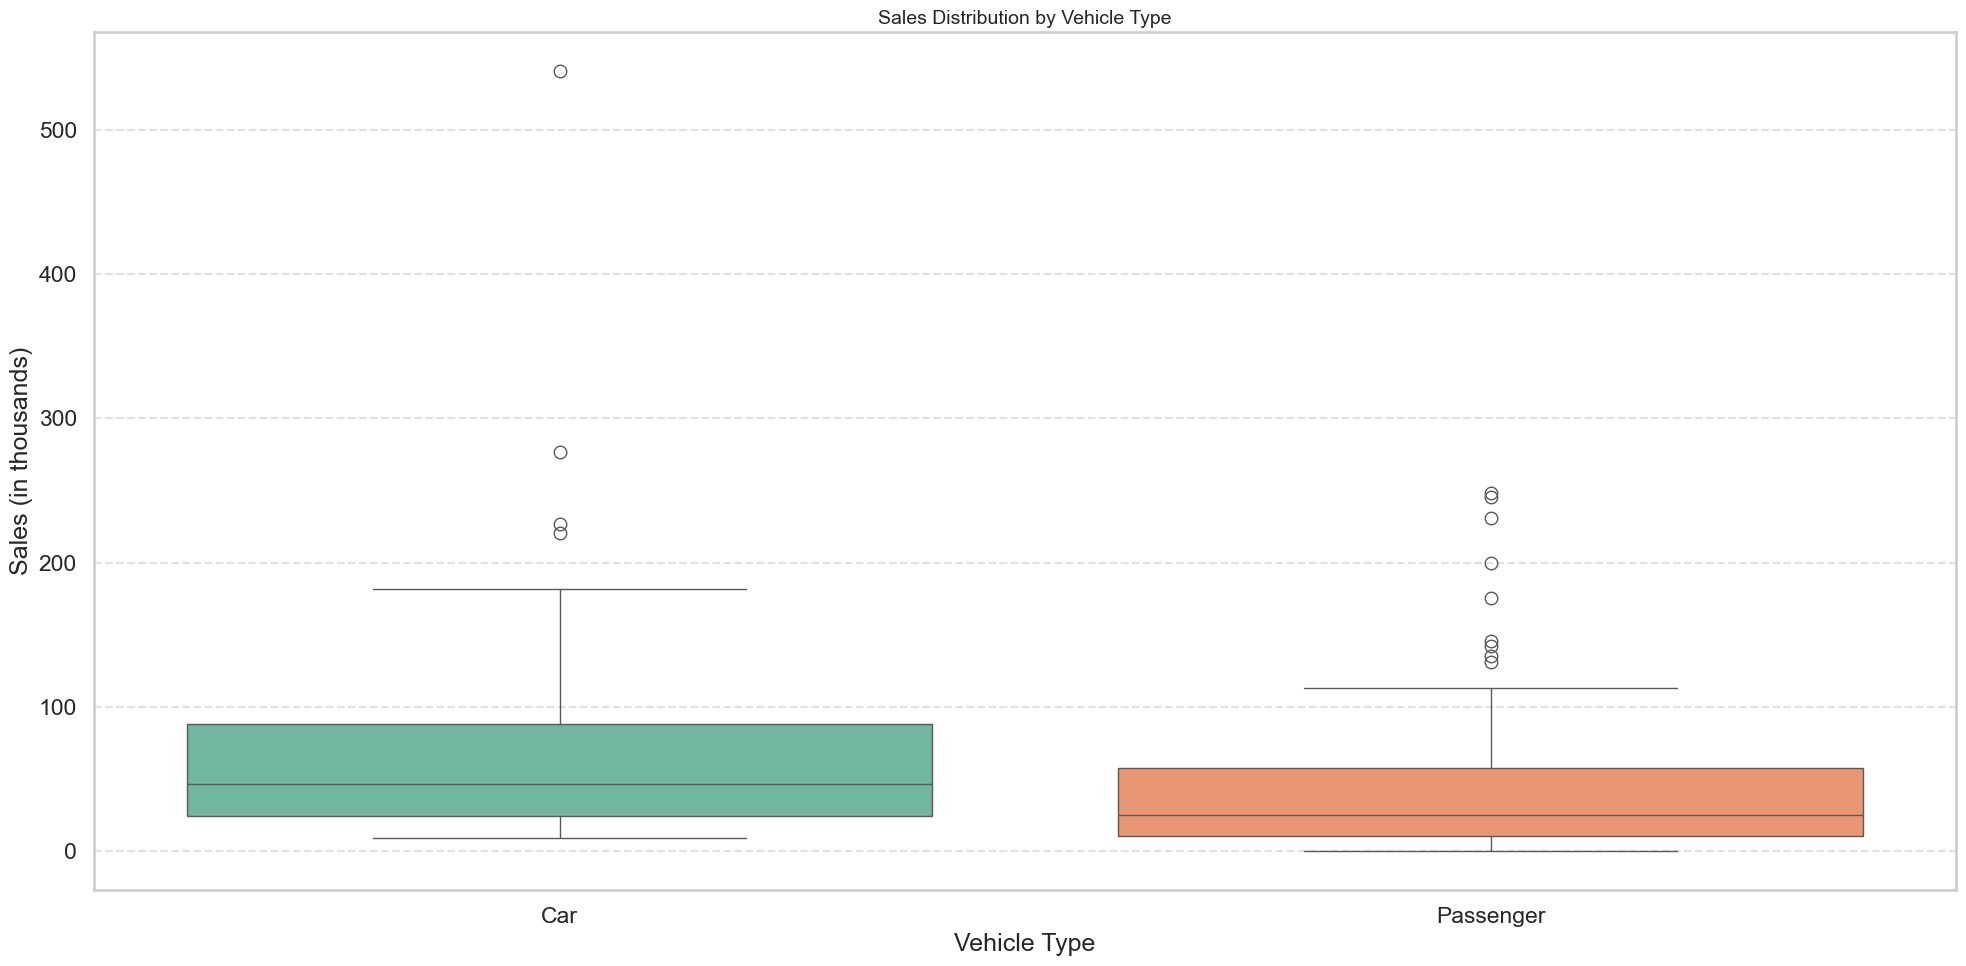

In [28]:
sns.boxplot(data=df, x='Vehicle_type', y='Sales_in_thousands', hue='Vehicle_type', palette='Set2', legend=False) 
plt.title('Sales Distribution by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 6.3 Top 10 Best-Selling Models

Highlight the top 10 car models by total units sold.

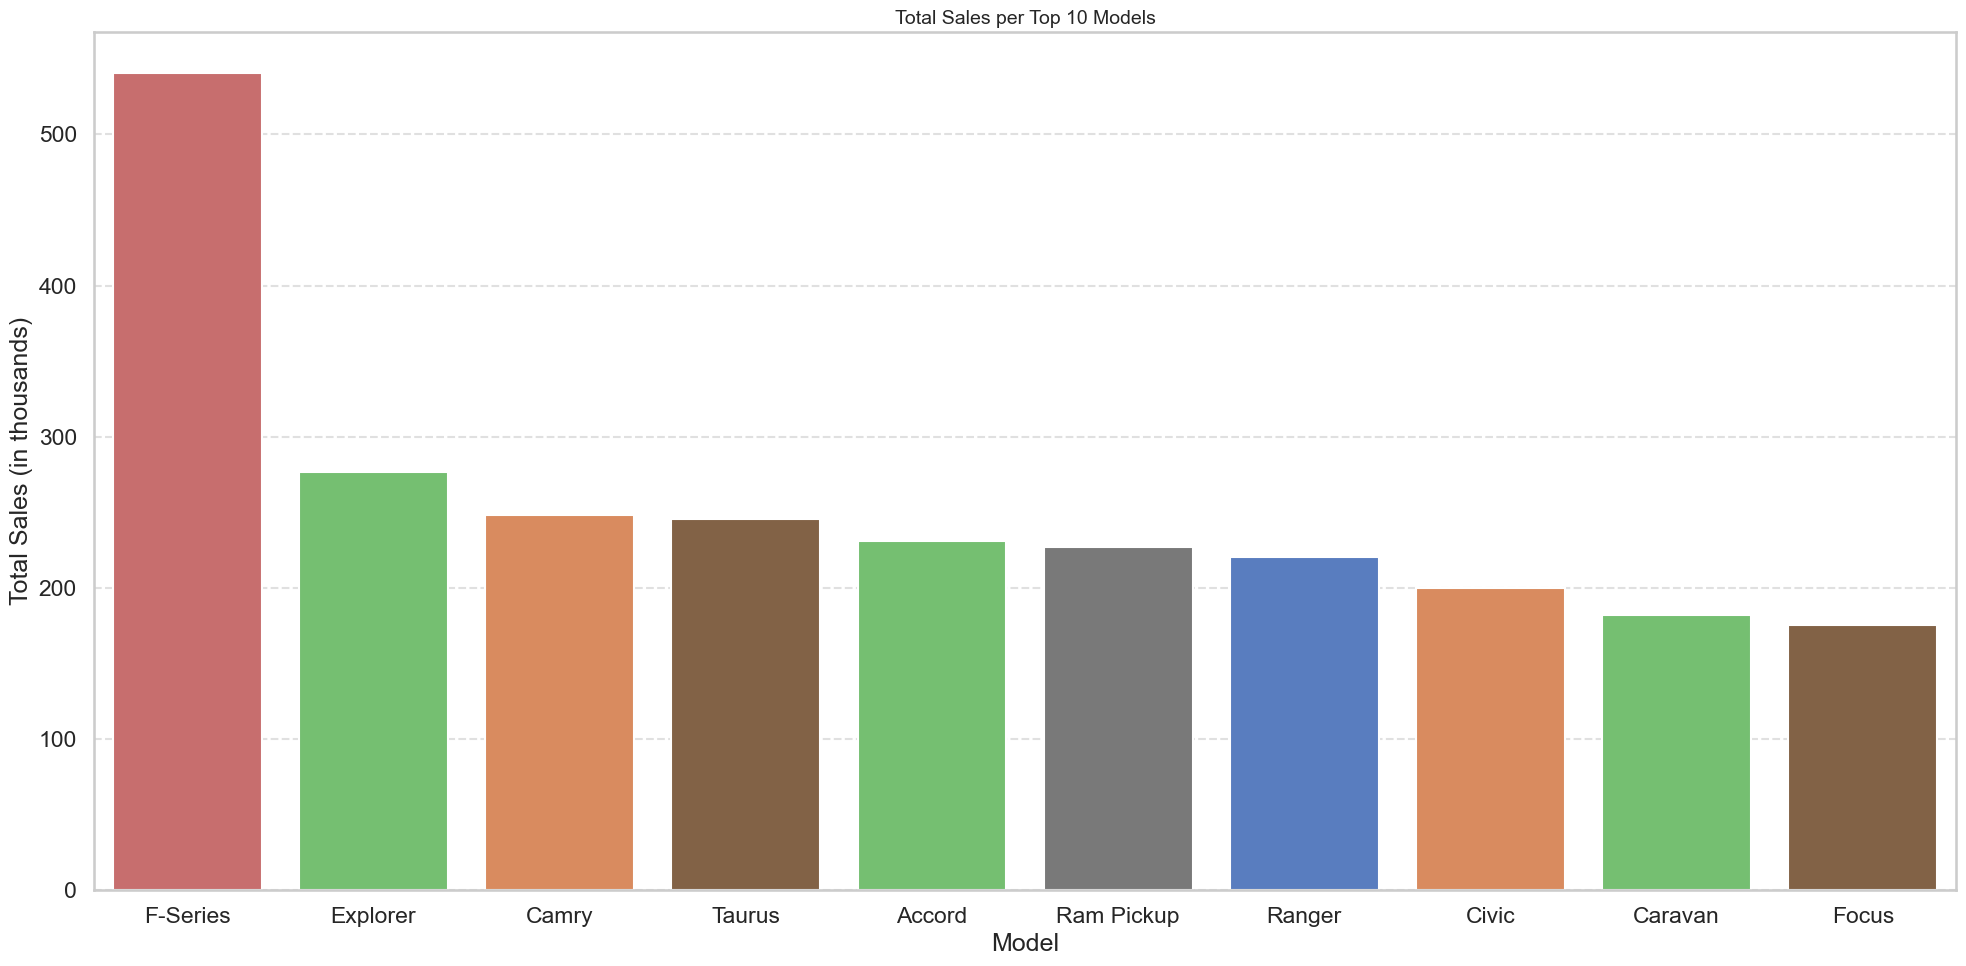

In [29]:
model_sales_df = (df.groupby('Model', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())
top_models_df = model_sales_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

sns.barplot(data=top_models_df, x='Model', y='Sales_in_thousands', hue='Model',order=model_order_list, palette='muted', legend=False, dodge=False)
plt.title(f'Total Sales per Top {TOP_N_MODELS} Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Total Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 6.4 Correlation of Numeric Features with Sales

Identify numeric attributes most predictive of sales volume.

Only features with strong correlations will be explored further.

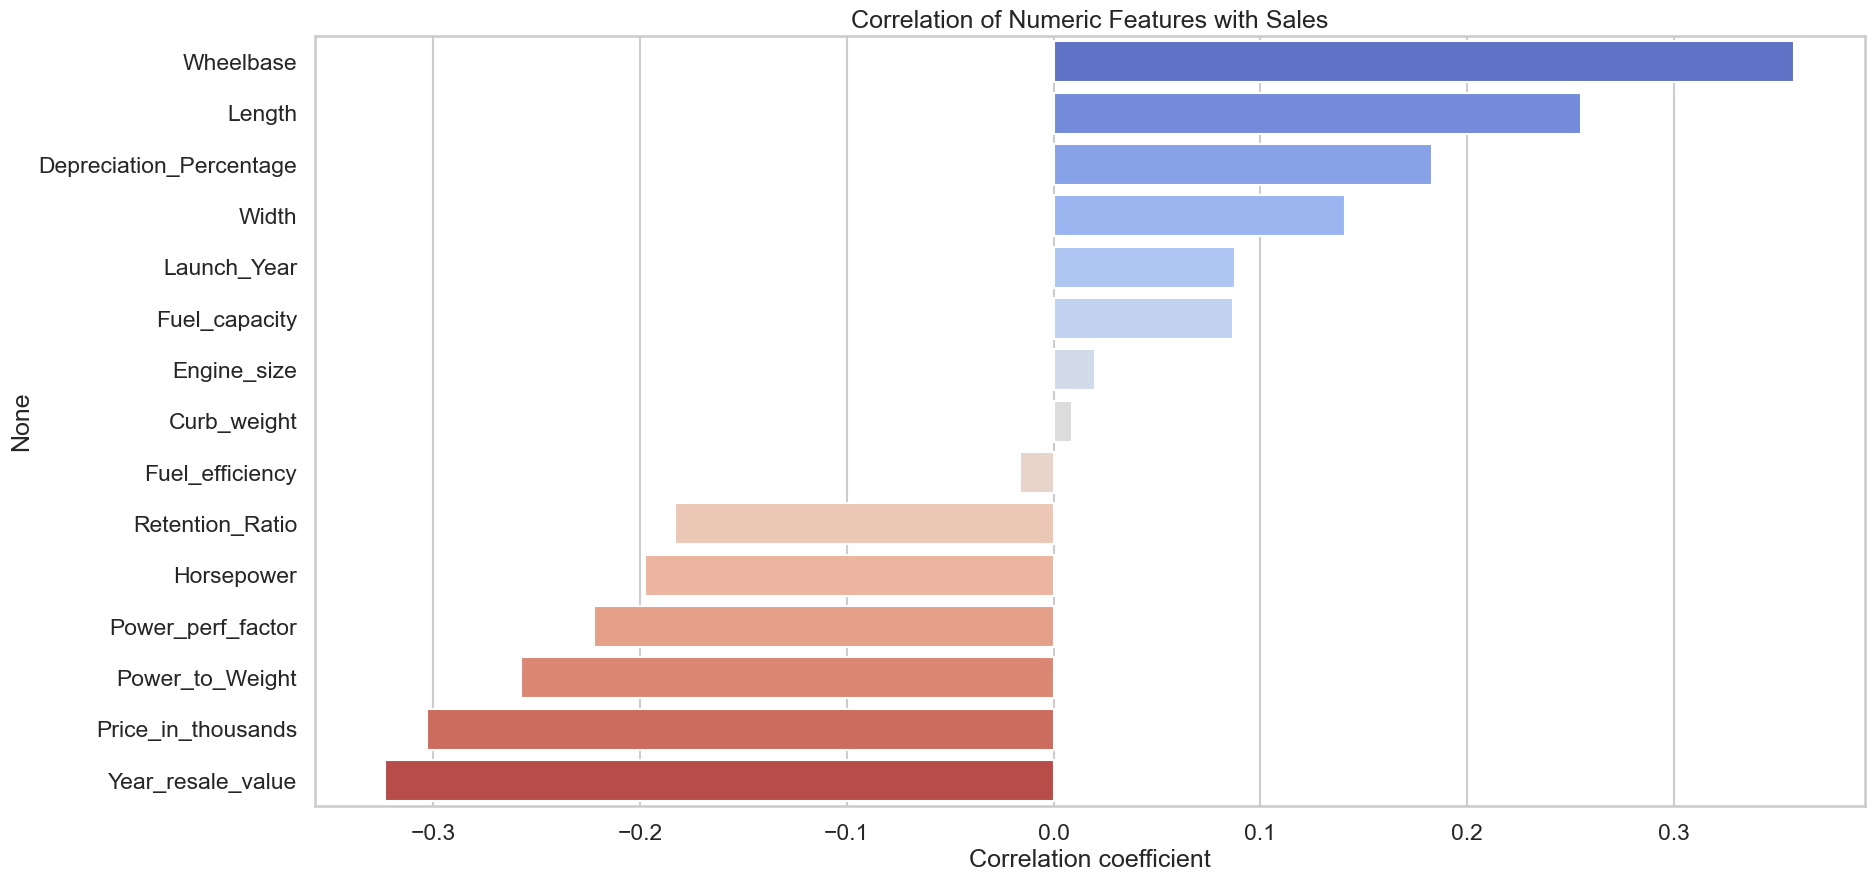

Selected sales-driving features: []


In [30]:
sales_corr = corr_matrix['Sales_in_thousands'].drop('Sales_in_thousands')
sales_corr_sorted = sales_corr.sort_values(ascending=False)

sns.barplot(x=sales_corr_sorted.values, y=sales_corr_sorted.index, hue=sales_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of Numeric Features with Sales')
plt.xlabel('Correlation coefficient')
plt.show()

# Select features with |correlation| >= threshold
selected_sales_features = sales_corr[sales_corr.abs() >= threshold].index.tolist()
print("Selected sales-driving features:", selected_sales_features)

### 6.5 Relationship Between Price and Sales

Assess whether higher prices deter sales or reflect stronger demand.

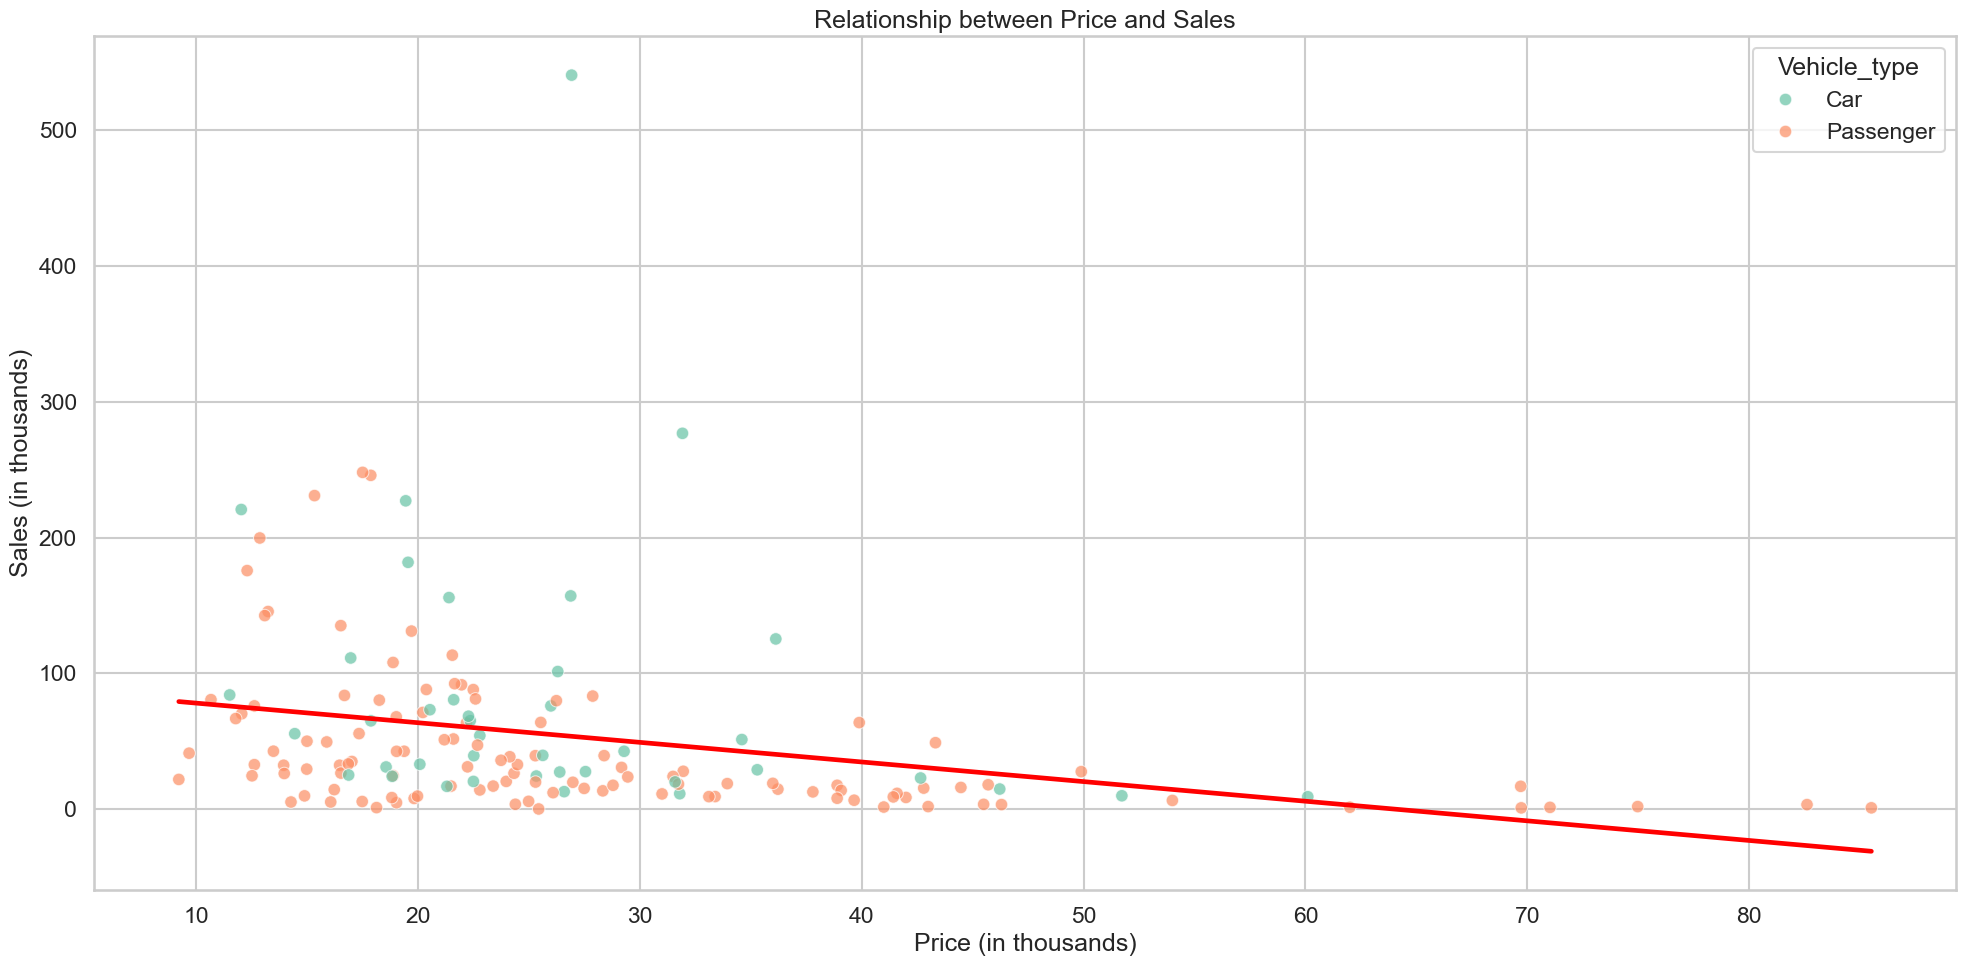

In [31]:
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', hue='Vehicle_type',alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', scatter=False, color='red', ci=None)
plt.title('Relationship between Price and Sales')
plt.xlabel('Price (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.tight_layout()
plt.show()

### 6.6 Fuel Efficiency vs Sales

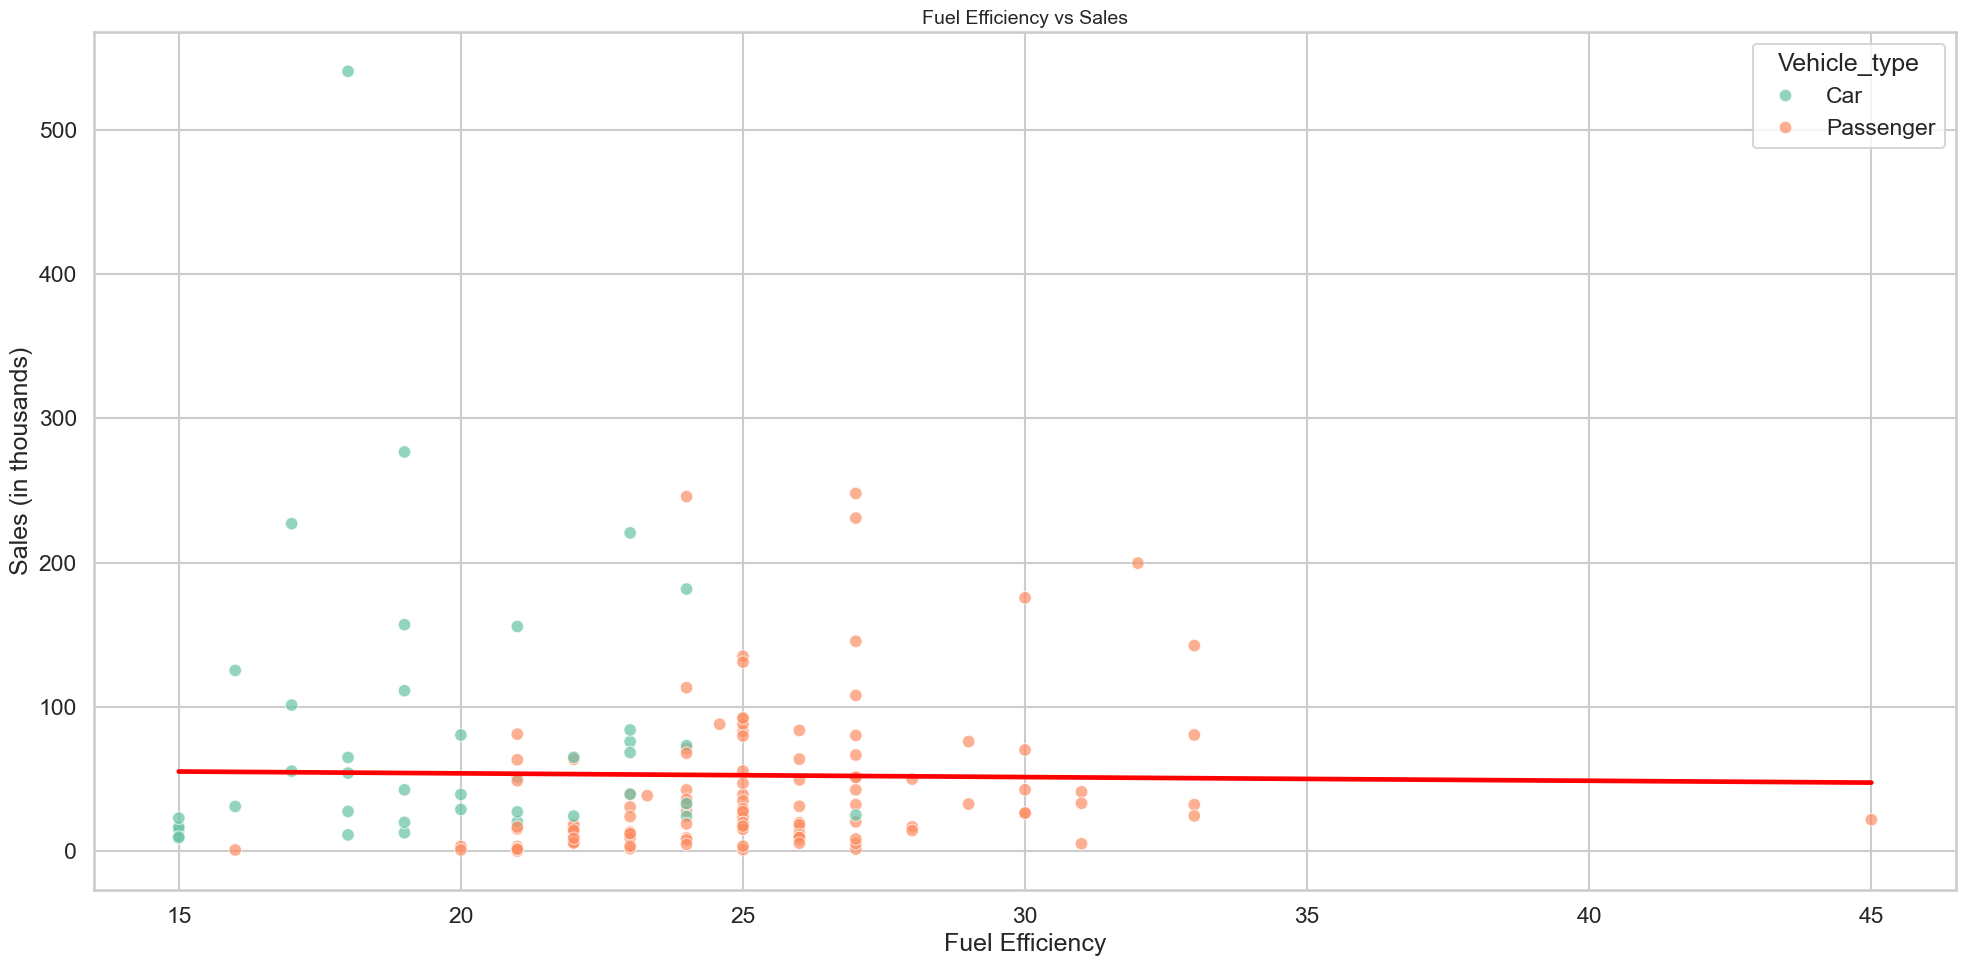

In [32]:
sns.scatterplot(data=df, x='Fuel_efficiency', y='Sales_in_thousands', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Fuel_efficiency', y='Sales_in_thousands', scatter=False, color='red', ci=None)
plt.title('Fuel Efficiency vs Sales', fontsize=14)
plt.xlabel('Fuel Efficiency')
plt.ylabel('Sales (in thousands)')
plt.tight_layout()
plt.show()

### 6.7 Power Performance Factor vs Sales

Relationship Between Power Performance Factor and Sales

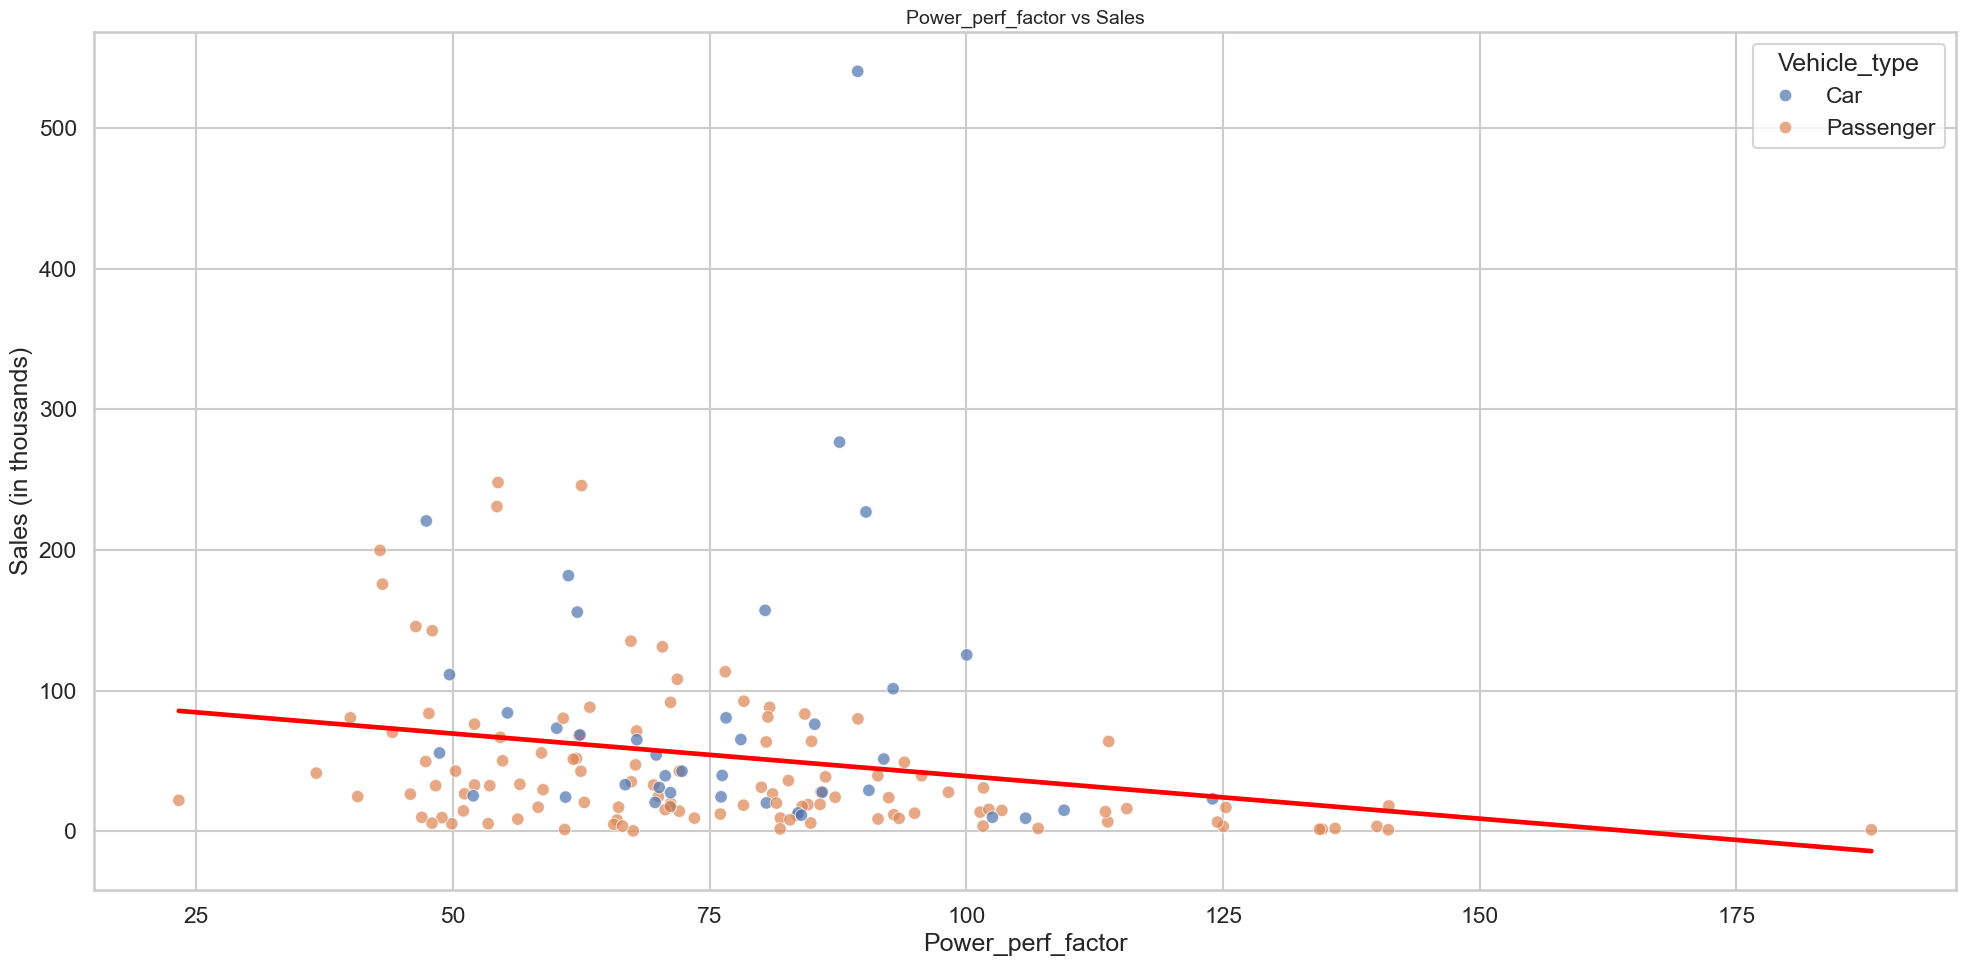

In [33]:
sns.scatterplot(data=df, x='Power_perf_factor', y='Sales_in_thousands', hue='Vehicle_type',  alpha=0.7)
sns.regplot(data=df, x='Power_perf_factor', y='Sales_in_thousands', scatter=False, color='red', ci=None)
plt.title(f'Power_perf_factor vs Sales', fontsize=14)
plt.xlabel('Power_perf_factor')
plt.ylabel('Sales (in thousands)')
plt.tight_layout()
plt.show()

### 💬 Sales Insights:

Mass-market manufacturers lead in volume.

Power Performance Factor doesnot guarantee strong sales.

Sales are slightly price-sensitive, and efficient vehicles tend to sell better — showing value-conscious consumer behavior.

## 7. Car Resale and Depreciation Analysis

Understanding how car types and manufacturers retain value over time.

### 7.1 Depreciation Percentage vs Sales

Test if popular models hold resale value better.

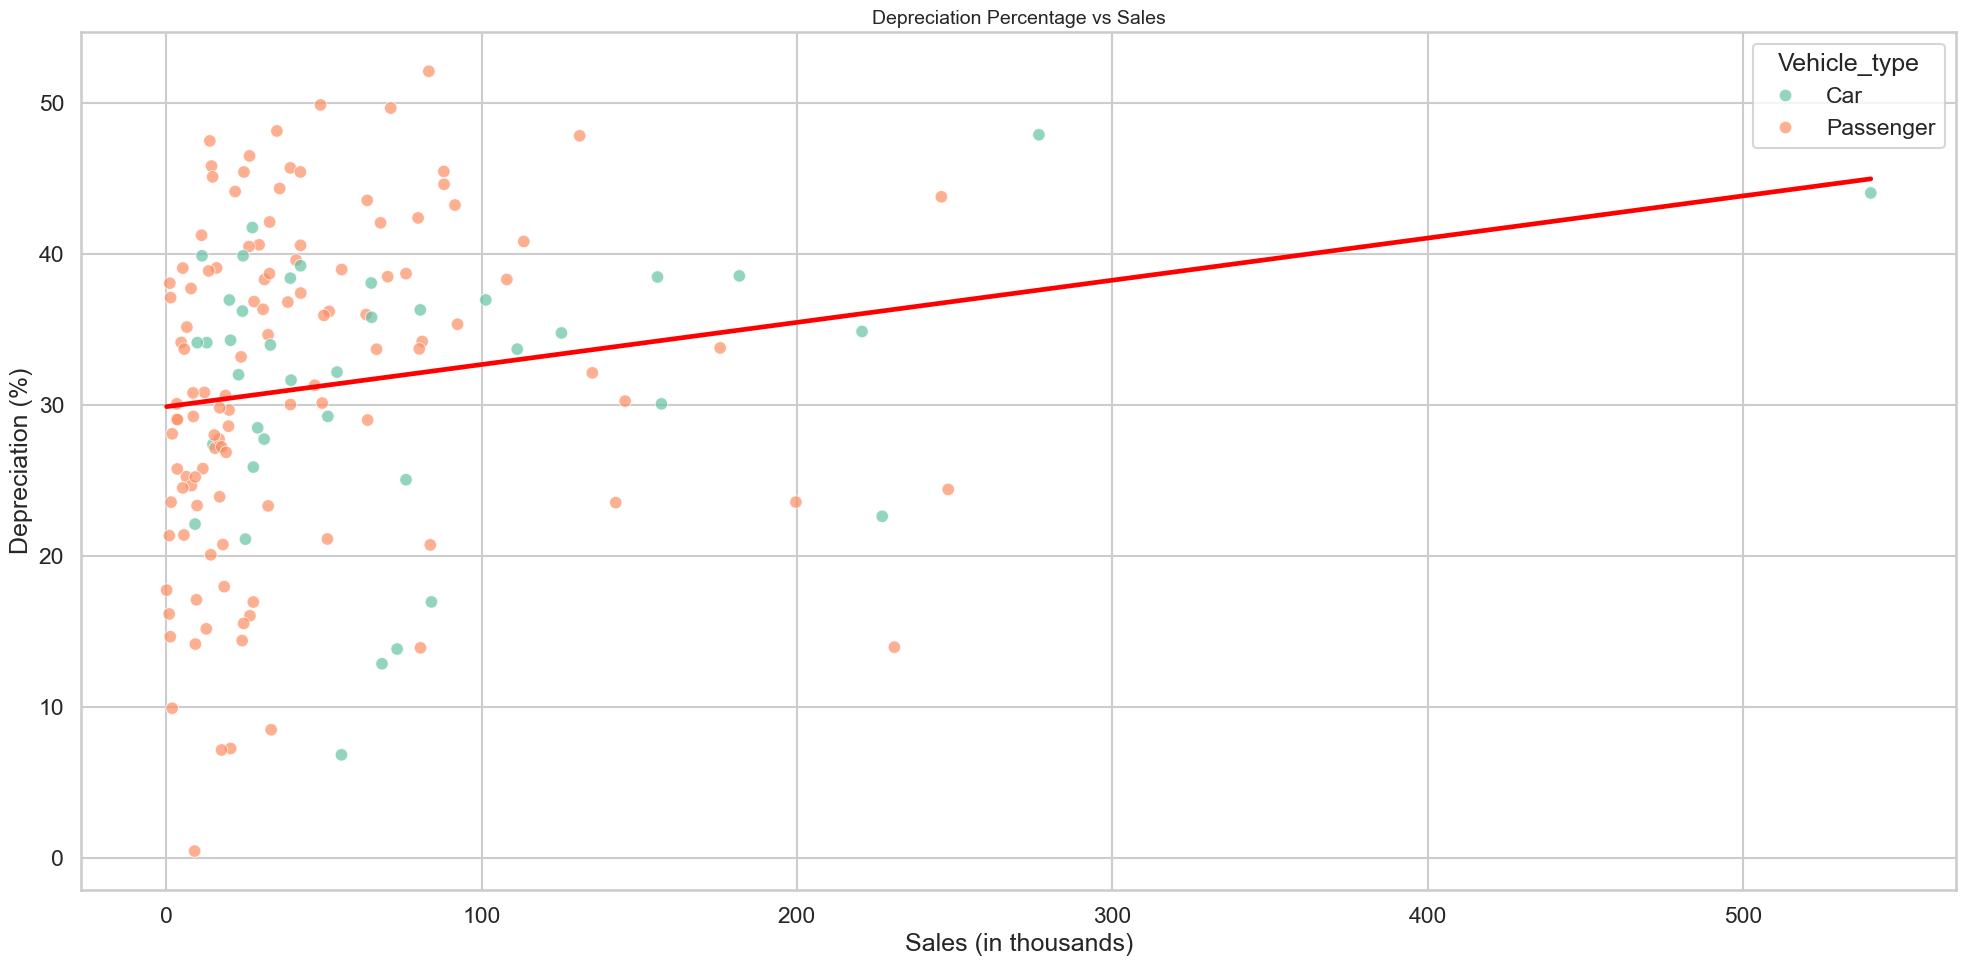

In [34]:
sns.scatterplot(data=df, x='Sales_in_thousands', y='Depreciation_Percentage', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Sales_in_thousands', y='Depreciation_Percentage', scatter=False, color='red', ci=None)
plt.title('Depreciation Percentage vs Sales', fontsize=14)
plt.xlabel('Sales (in thousands)')
plt.ylabel('Depreciation (%)') 
plt.tight_layout()
plt.show()

### 7.2 Depreciation by Vehicle Type

Compare average depreciation across different vehicle types.

Average Depreciation (%) by Vehicle Type:


Vehicle_type  Depreciation_Percentage
0          Car                    31.53
1    Passenger                    31.29

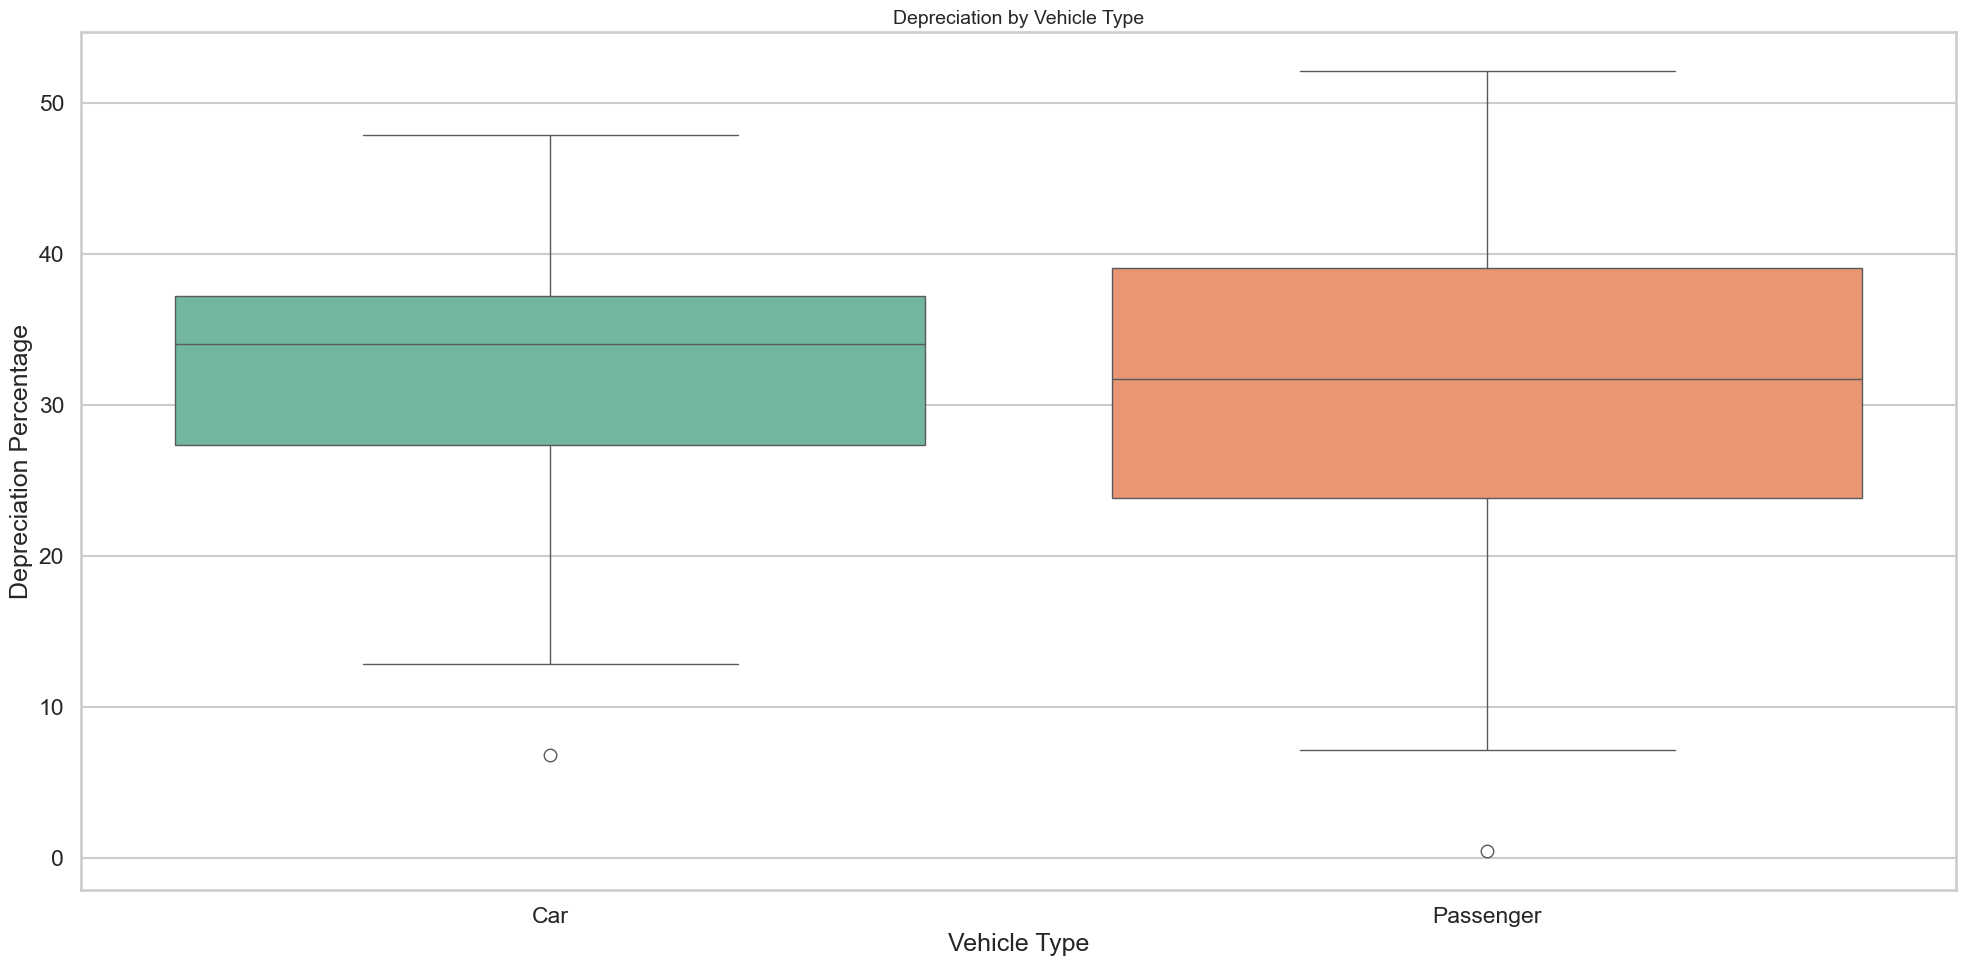

In [35]:
type_summary_df = (df.groupby('Vehicle_type', observed=True)['Depreciation_Percentage'].mean().round(2).reset_index()) 
print('Average Depreciation (%) by Vehicle Type:')
display(type_summary_df)

sns.boxplot(data=df, x='Vehicle_type', y='Depreciation_Percentage', hue='Vehicle_type', palette='Set2', legend=False)
plt.title('Depreciation by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Depreciation Percentage')
plt.tight_layout()
plt.show()

### 7.3 Correlation with Resale Value

Identify numeric variables that correlate most with resale value.

Only features with strong correlations will be explored further.

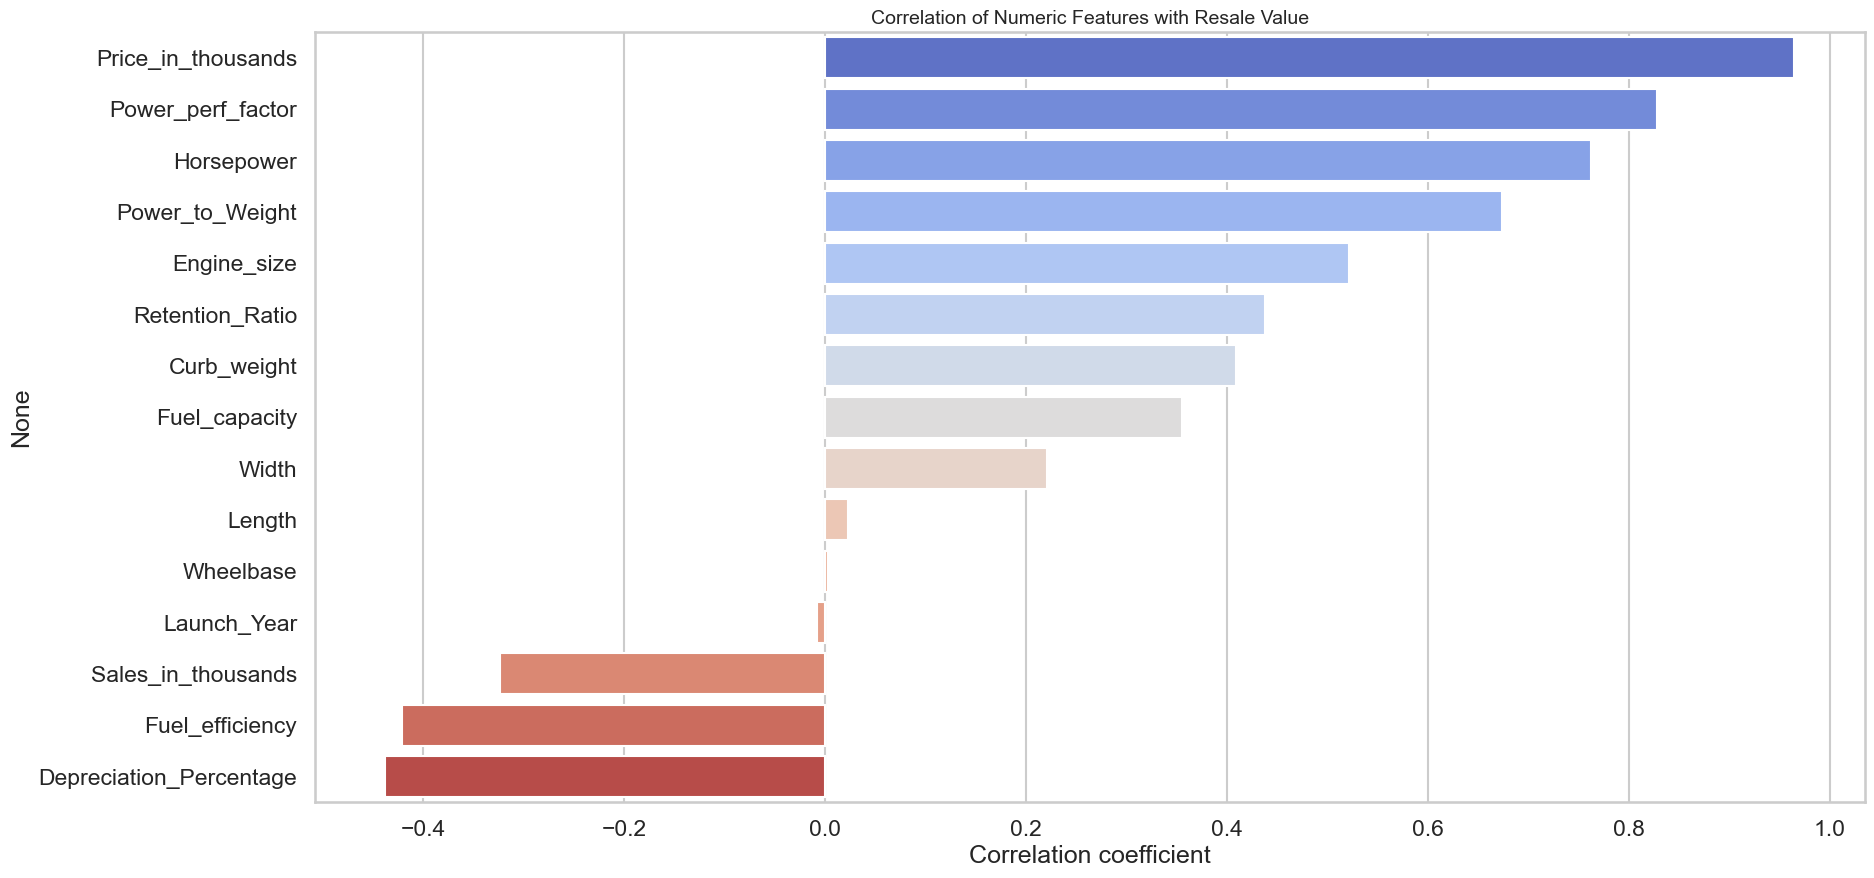

Selected resale-driving features:
 ['Price_in_thousands', 'Horsepower', 'Power_perf_factor', 'Power_to_Weight']


In [36]:
resales_corr = corr_matrix["Year_resale_value"].drop("Year_resale_value")
resales_corr_sorted = resales_corr.sort_values(ascending=False)

sns.barplot(x=resales_corr_sorted.values, y=resales_corr_sorted.index, hue=resales_corr_sorted.index, palette="coolwarm")
plt.title('Correlation of Numeric Features with Resale Value', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.show()

# Select features with |correlation| >= threshold
selected_resale_features = resales_corr[resales_corr.abs() >= threshold].index.tolist()
print('Selected resale-driving features:\n', selected_resale_features)

#### 7.3.1 Performance Features vs Depreciation

Visualize how horsepower or engine size relate to value retention.

Performance features influencing resale value: ['Horsepower', 'Power_perf_factor']


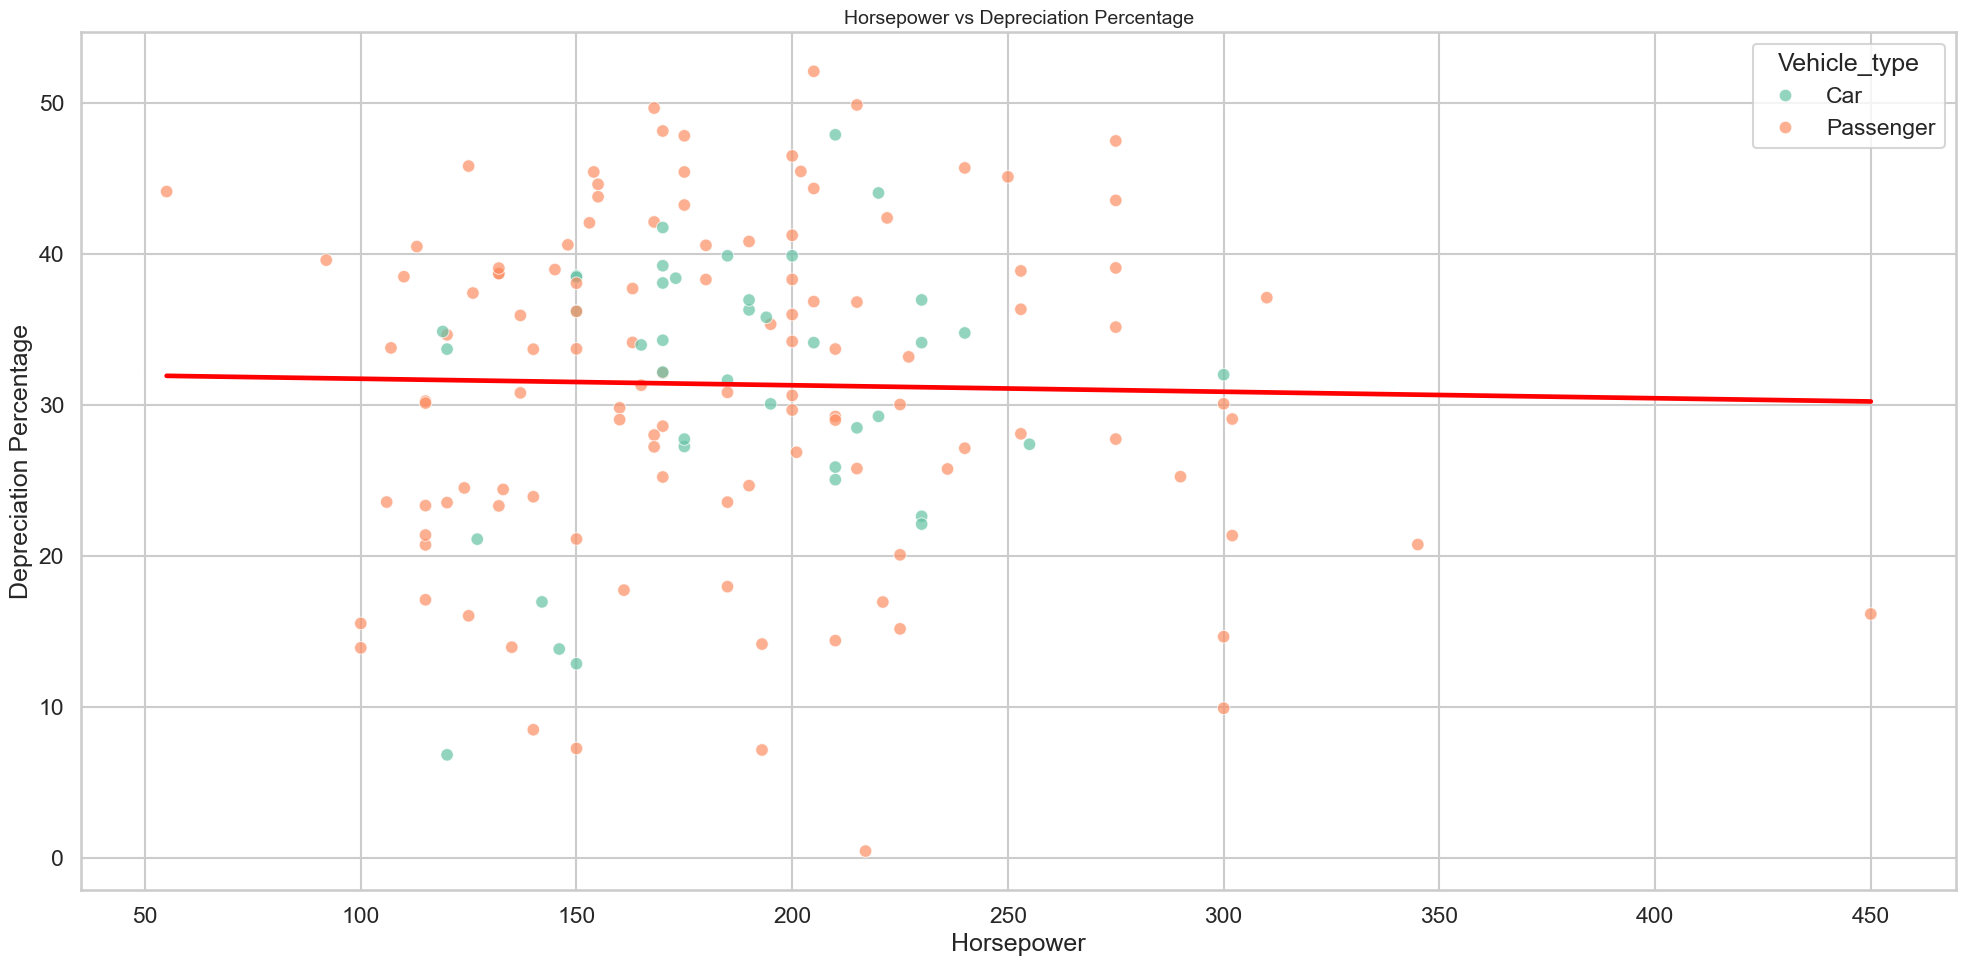

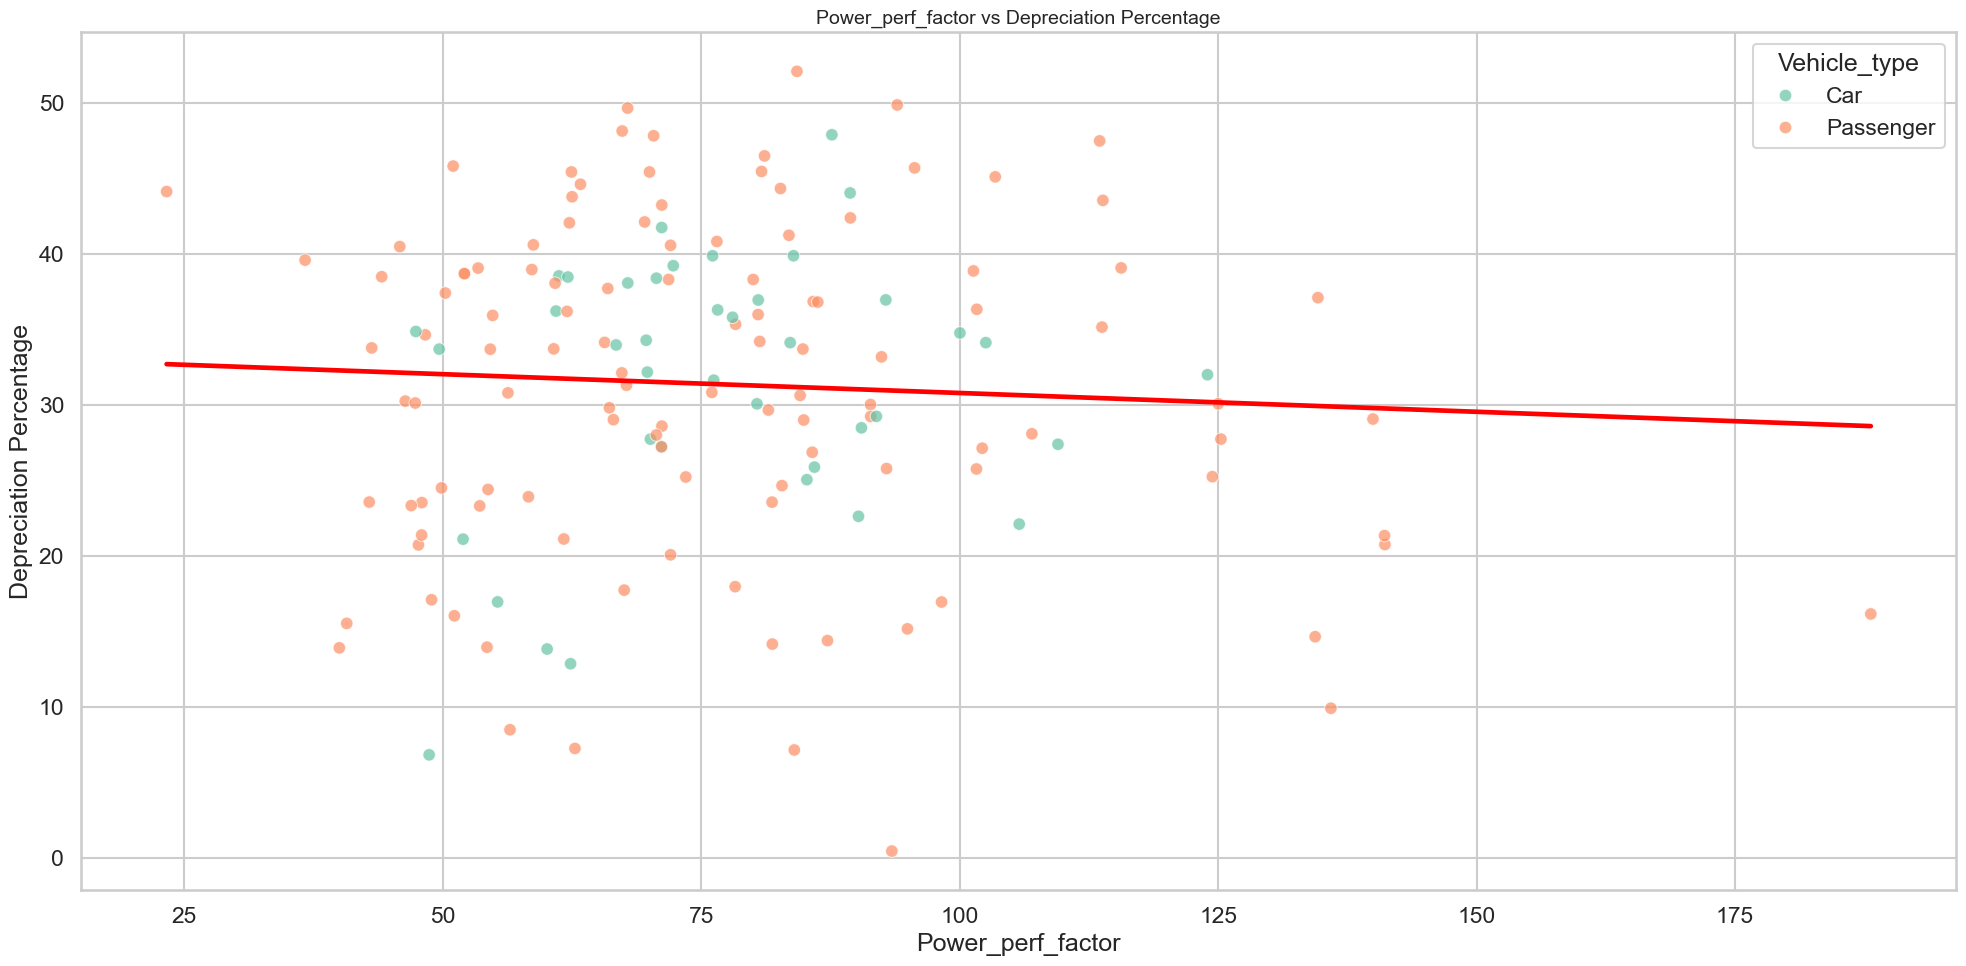

In [37]:
performance_resale = [f for f in performance_features if f in selected_resale_features]
print("Performance features influencing resale value:", performance_resale)

if len(performance_resale) > 0:
    for feature in performance_resale:
        sns.scatterplot(data=df, x=feature, y='Depreciation_Percentage', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Depreciation_Percentage', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Depreciation Percentage', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Depreciation Percentage')
        plt.tight_layout()
        plt.show()
else:
    print('No strongly correlated performance features found — skipping performance plots.')

#### 7.3.2 Design Features vs Depreciation

Analyze how vehicle size and structure correlate with depreciation.

In [38]:
design_resale = [f for f in design_features if f in selected_resale_features]
print("Design features influencing resale value:\n", design_resale)

if len(design_resale) > 0:
    for feature in design_resale:
        sns.scatterplot(data=df, x=feature, y='Depreciation_Percentage', hue='Vehicle_type',alpha=0.7, palette='Set2')
        sns.regplot(data=df, x=feature, y='Depreciation_Percentage', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Depreciation Percentage', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Resale Value (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

Design features influencing resale value:
 []
No strongly correlated design features found — skipping design plots.


### 7.4 Fuel Efficiency vs Resale Value

Explore the relationship between efficiency and resale value.

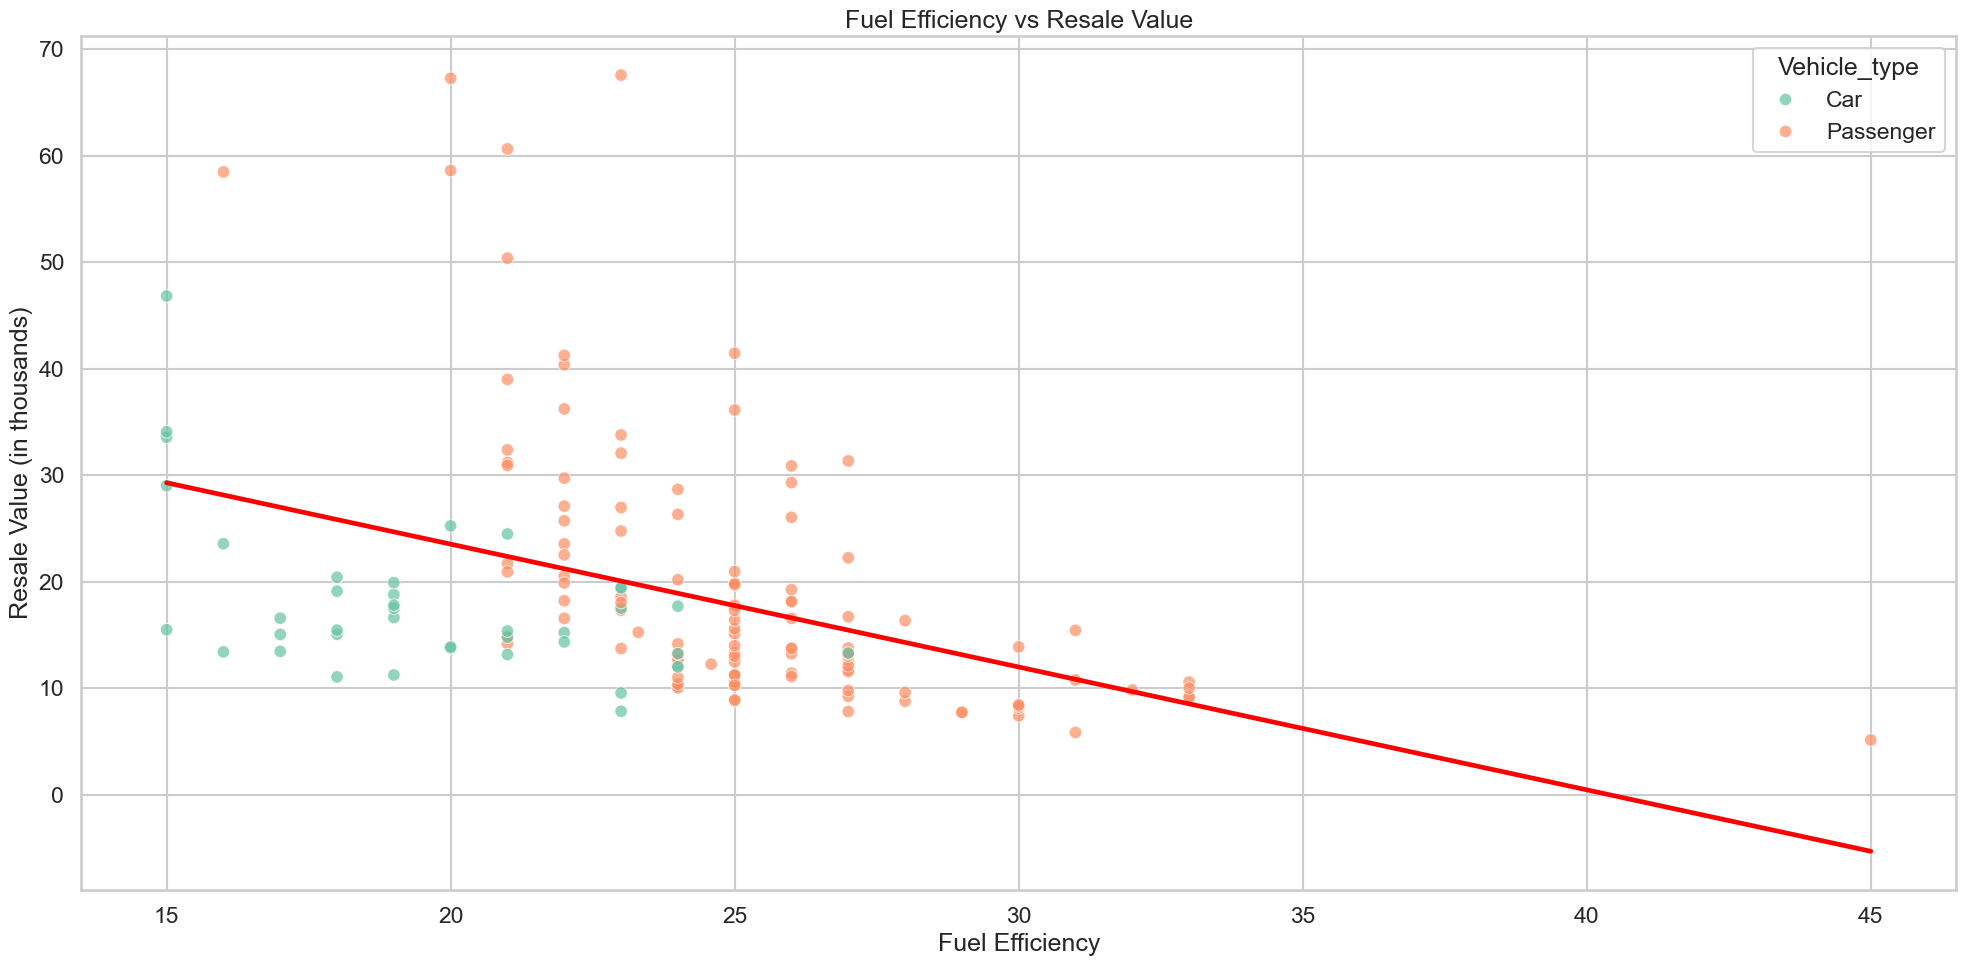

In [39]:
sns.scatterplot(data=df, x='Fuel_efficiency', y='Year_resale_value', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Fuel_efficiency', y='Year_resale_value', scatter=False, color='red', ci=None)
plt.title('Fuel Efficiency vs Resale Value')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Resale Value (in thousands)')
plt.tight_layout()
plt.show()

### 7.5 Depreciation by Manufacturer

Compare depreciation percentages across manufacturers to see brand reputation effects.

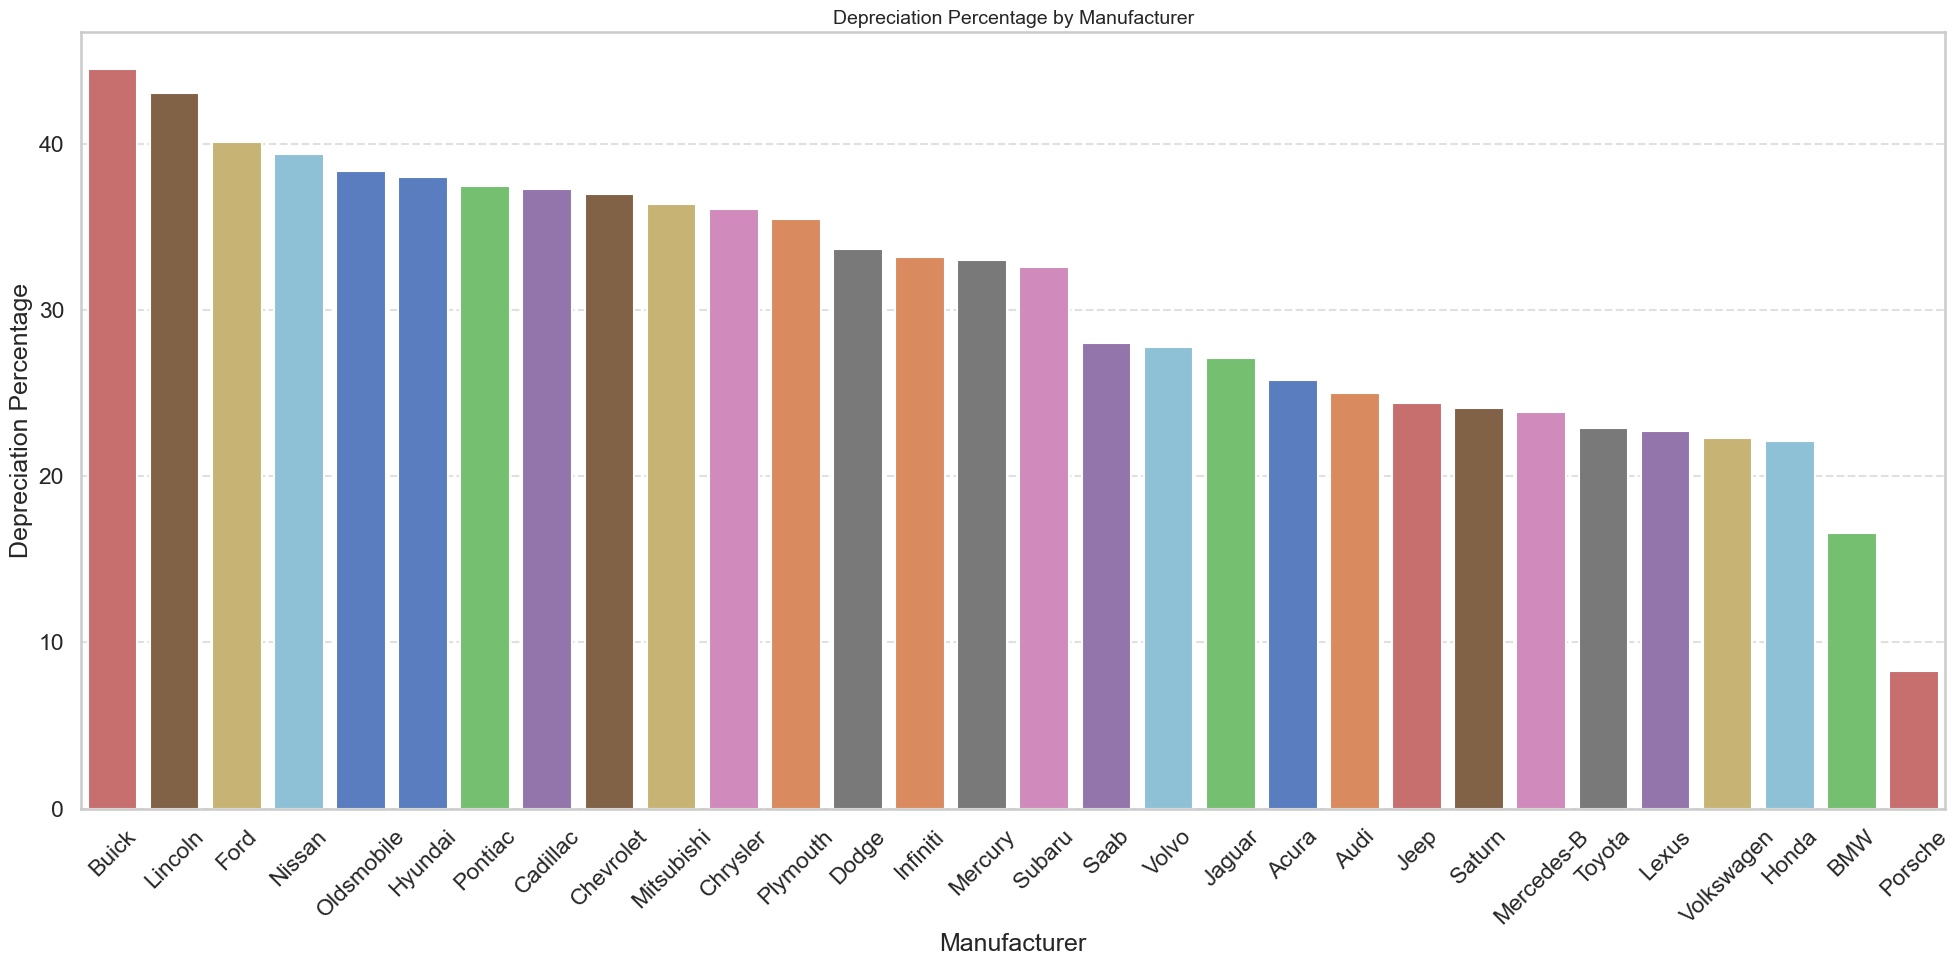

In [40]:
manufacturer_resales_df = (df.groupby('Manufacturer', observed=True)['Depreciation_Percentage'].mean().round(1).reset_index())
manufacturer_resales_df = manufacturer_resales_df.sort_values('Depreciation_Percentage', ascending=False)
manufacturer_order_list = manufacturer_resales_df['Manufacturer']

sns.barplot(data=manufacturer_resales_df, x='Manufacturer', y='Depreciation_Percentage', order=manufacturer_order_list,
            hue='Manufacturer', legend=False, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Depreciation Percentage by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Depreciation Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 7.6 Top 10 Best Resale Value Models

Highlight the top models by resale value to understand market-leading performers.

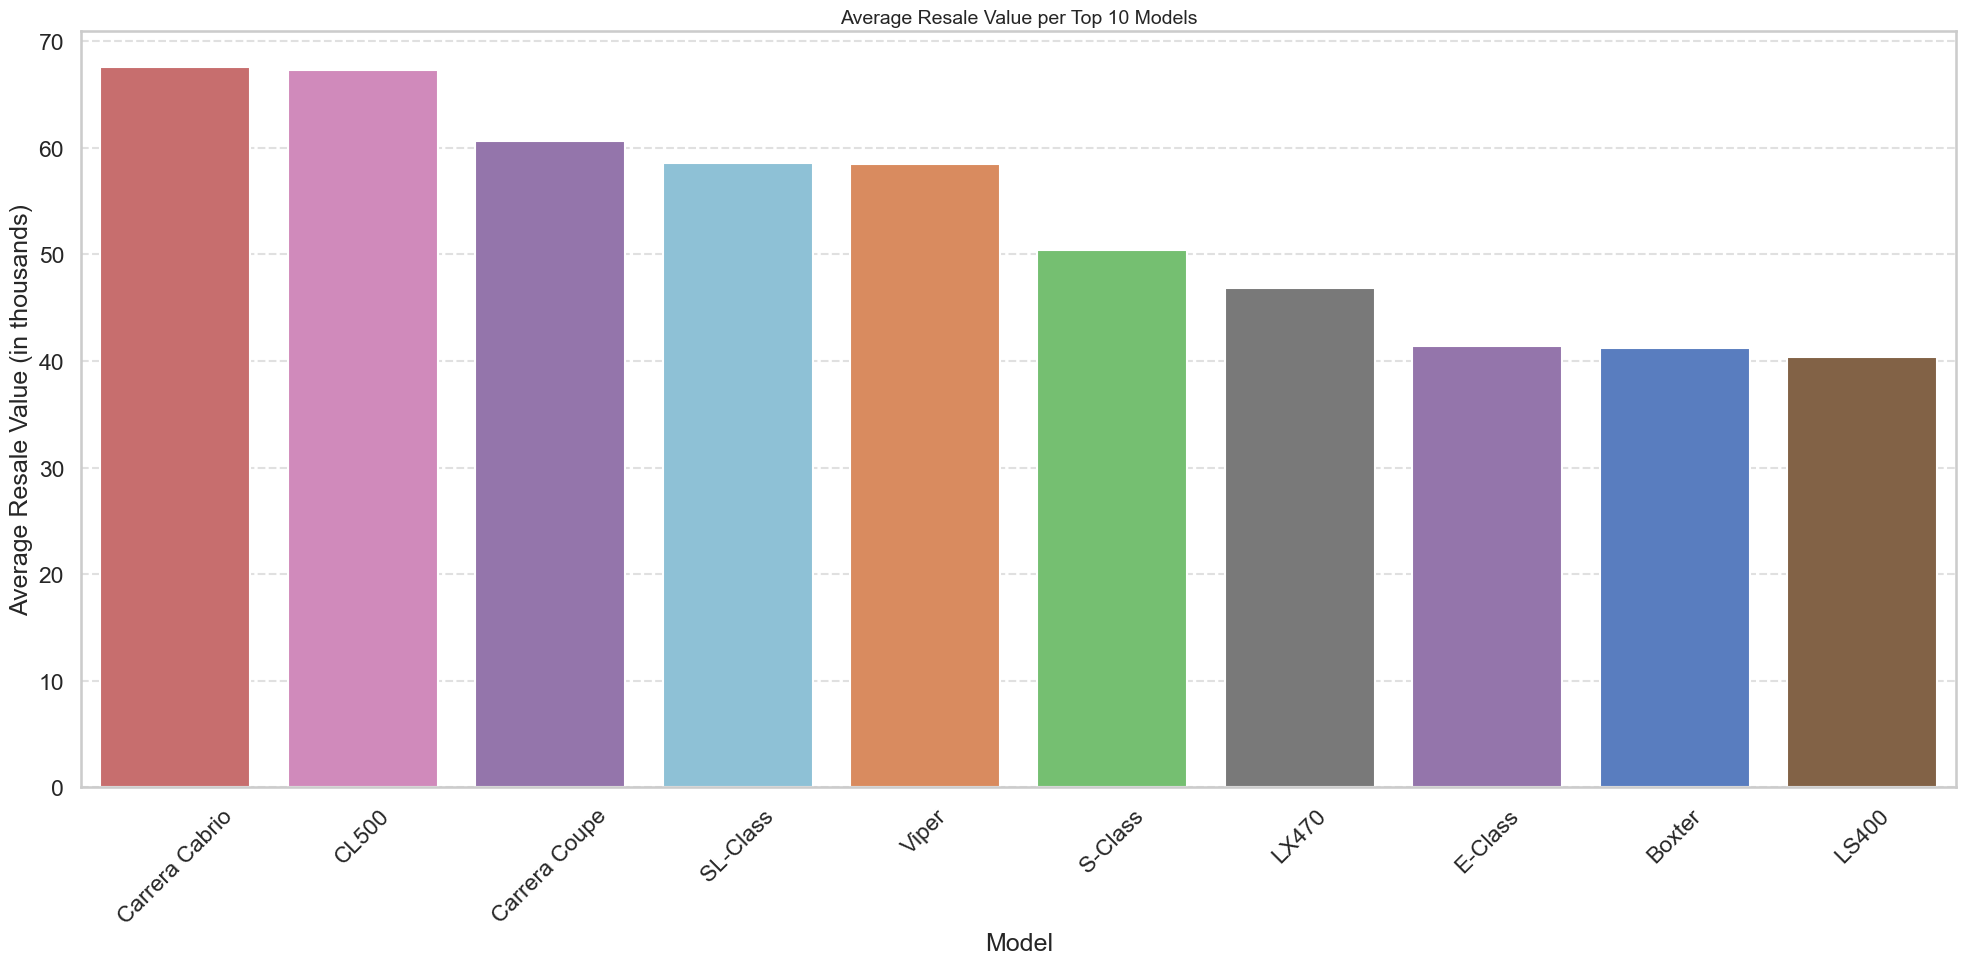

In [41]:
model_resale_df = (df.groupby('Model', observed=True)['Year_resale_value']
                   .mean().sort_values(ascending=False).reset_index())

top_models_df = model_resale_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']
sns.barplot(data=top_models_df, x='Model', y='Year_resale_value', hue='Model',
            order=model_order_list, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title(f'Average Resale Value per Top {TOP_N_MODELS} Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Resale Value (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 7.7 Power Performance Factor vs Resale Value

Relationship Between Power Performance Factor and Resale Value

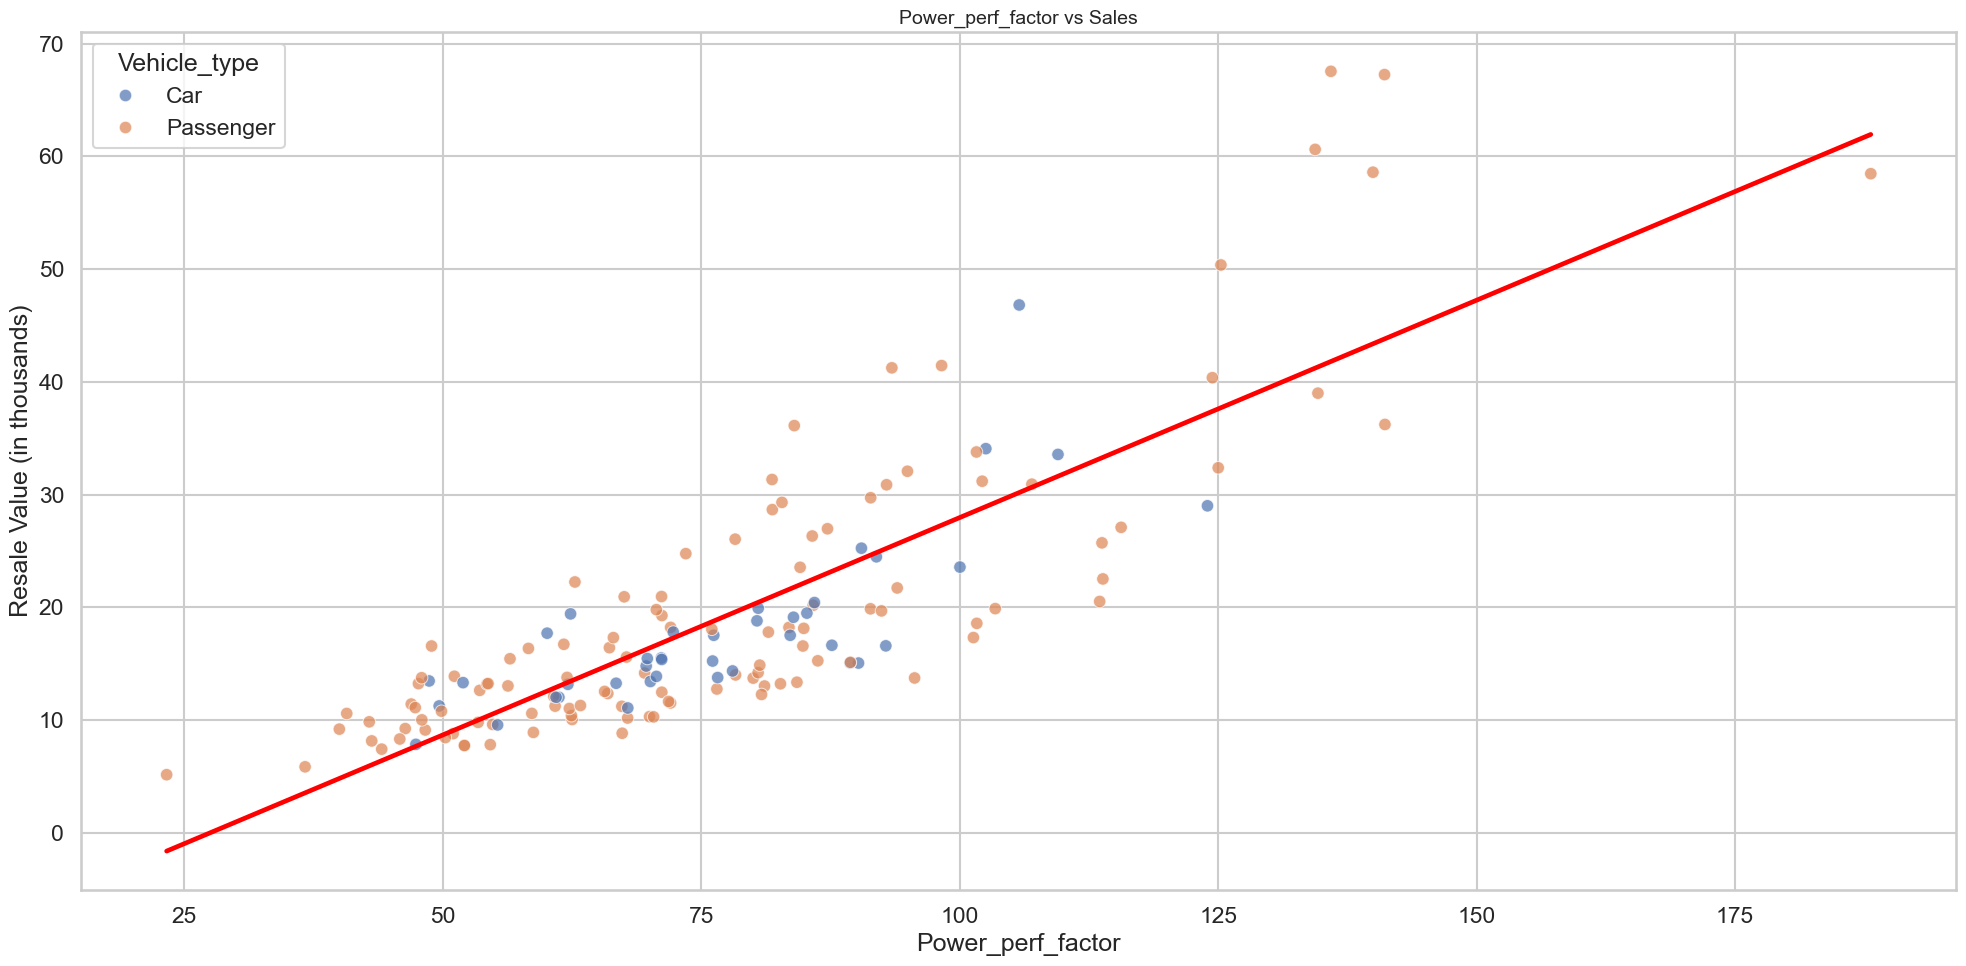

In [42]:
sns.scatterplot(data=df, x='Power_perf_factor', y='Year_resale_value', hue='Vehicle_type',  alpha=0.7)
sns.regplot(data=df, x='Power_perf_factor', y='Year_resale_value', scatter=False, color='red', ci=None)
plt.title(f'Power_perf_factor vs Sales', fontsize=14)
plt.xlabel('Power_perf_factor')
plt.ylabel('Resale Value (in thousands)')
plt.tight_layout()
plt.show()

### 💬 Resale & Depreciation Insights:

Depreciation averages nearly half the vehicle’s value.

Power Performance Factor doesnot guarantee strong resale value.

Performance-heavy cars depreciate quicker, while efficient and reputable-brand models retain value longer.

Models from premium and high-reliability brands dominate resale value — often tied to performance and perceived durability.

## 8. Fuel Efficiency Analysis

### 8.1 Average Fuel Efficiency by Manufacturer

Highlight brand-level efficiency differences.

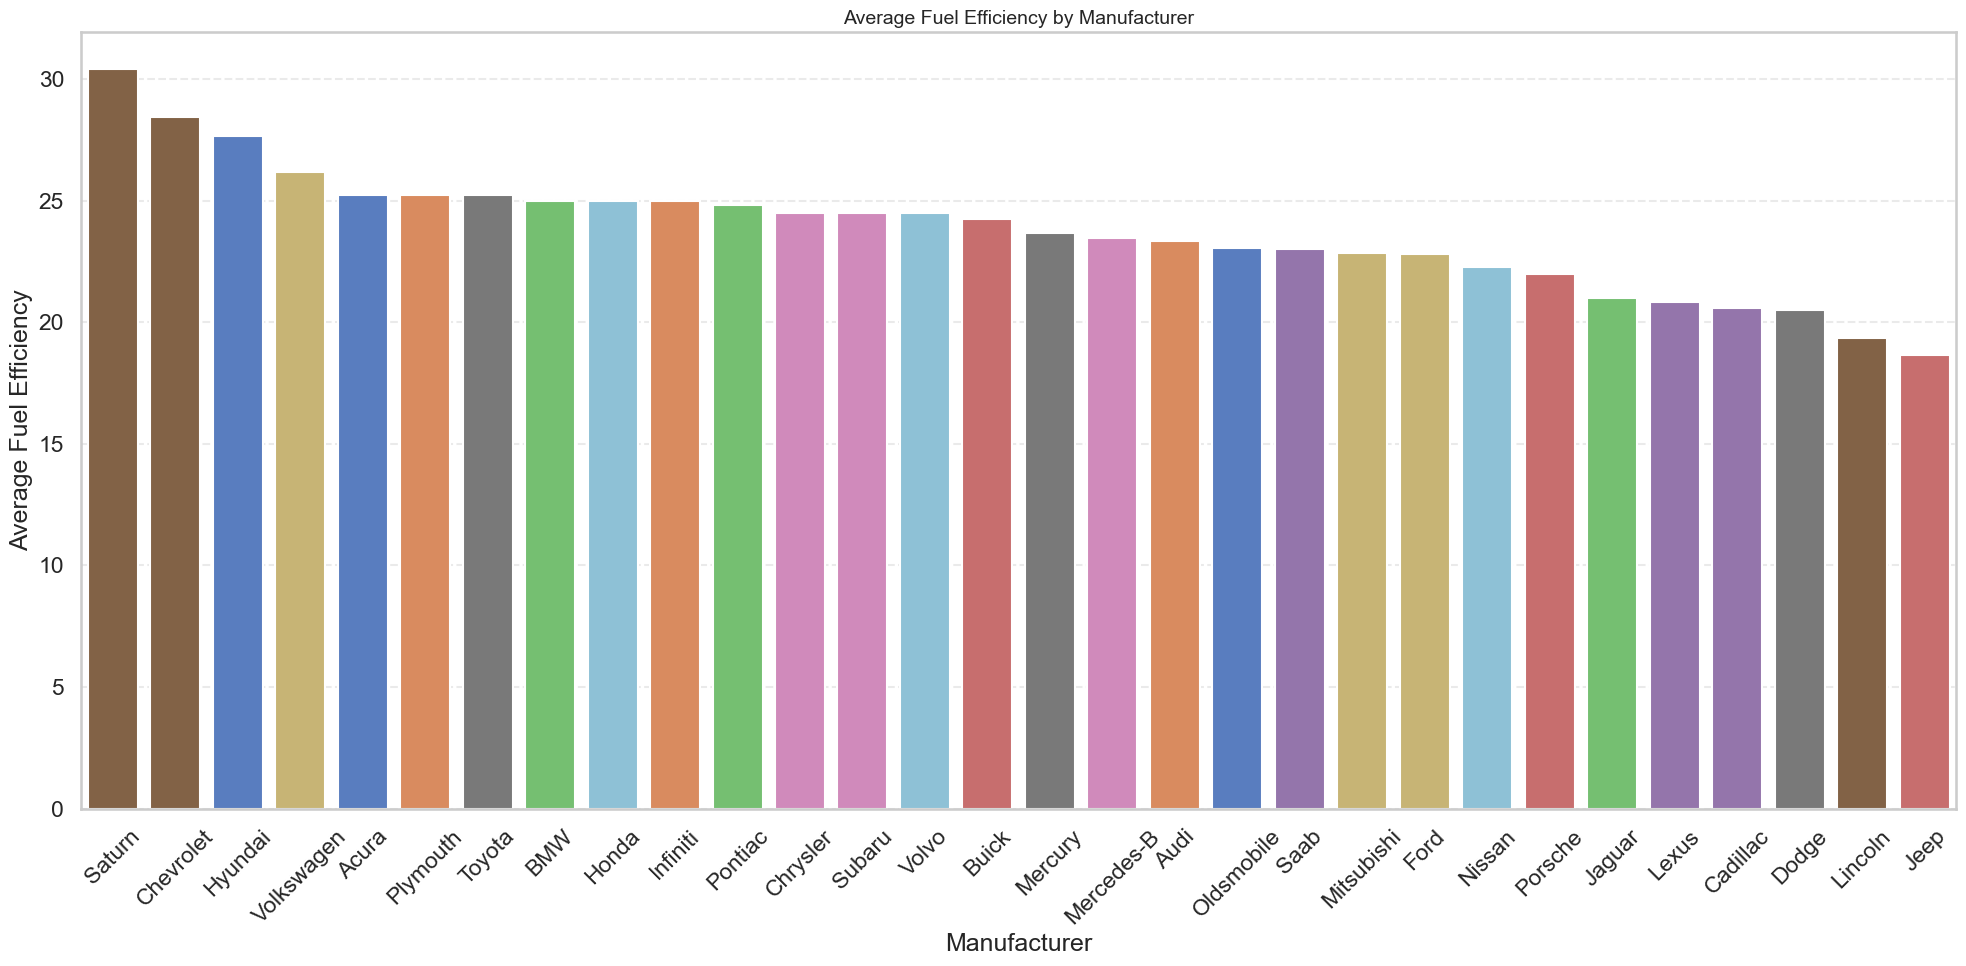

In [43]:
avg_fe = (df.groupby('Manufacturer', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False).reset_index())
sns.barplot(data=avg_fe, x='Manufacturer', y='Fuel_efficiency', order=avg_fe['Manufacturer'], hue='Manufacturer',palette='muted', dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title('Average Fuel Efficiency by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Fuel Efficiency')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 8.2 Average Fuel Efficiency by Vehicle Type

This bar plot shows how efficiency varies across car segments, helping identify efficiency leaders and laggards.

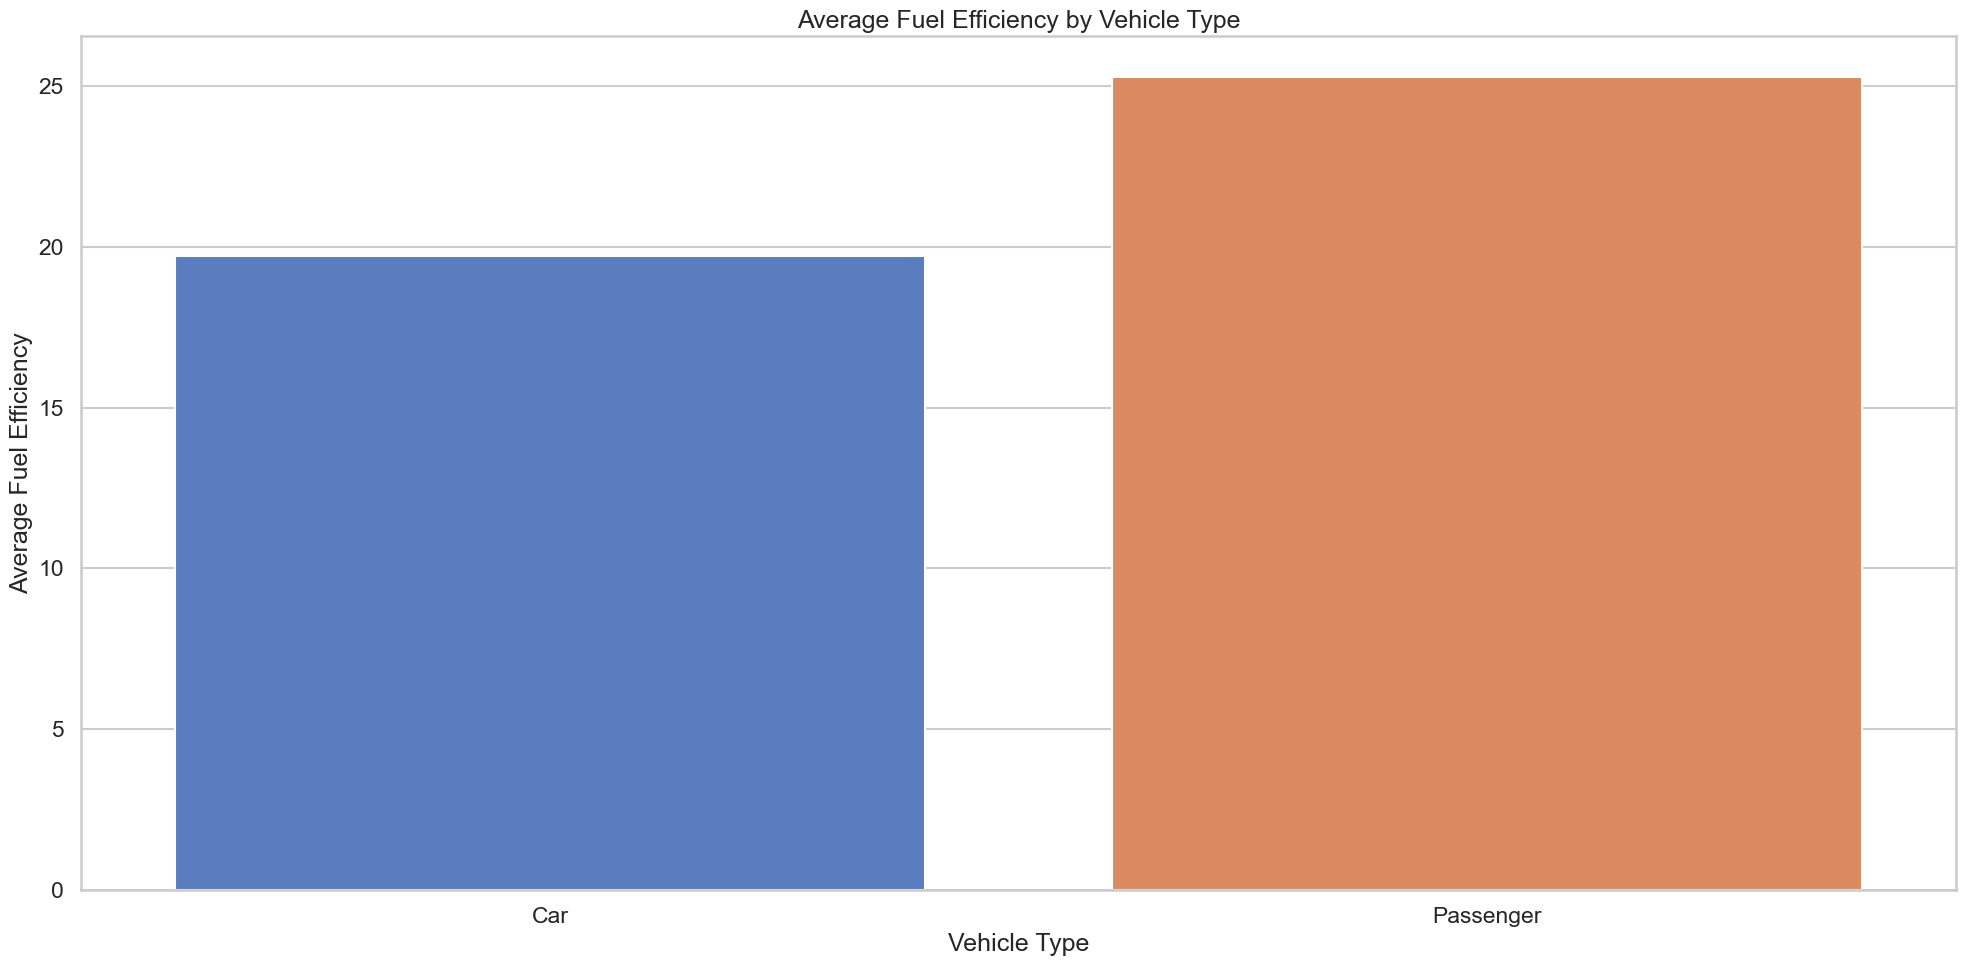

In [44]:
avg_efficiency = df.groupby('Vehicle_type', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False)
sns.barplot(x=avg_efficiency.index, y=avg_efficiency.values, hue=avg_efficiency.index,
            legend=False, palette='muted', dodge=False)
plt.title('Average Fuel Efficiency by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fuel Efficiency')
plt.tight_layout()
plt.show()

### 8.3 Top 10 Most Fuel-Efficient Models

Which specific car models deliver superior fuel economy?

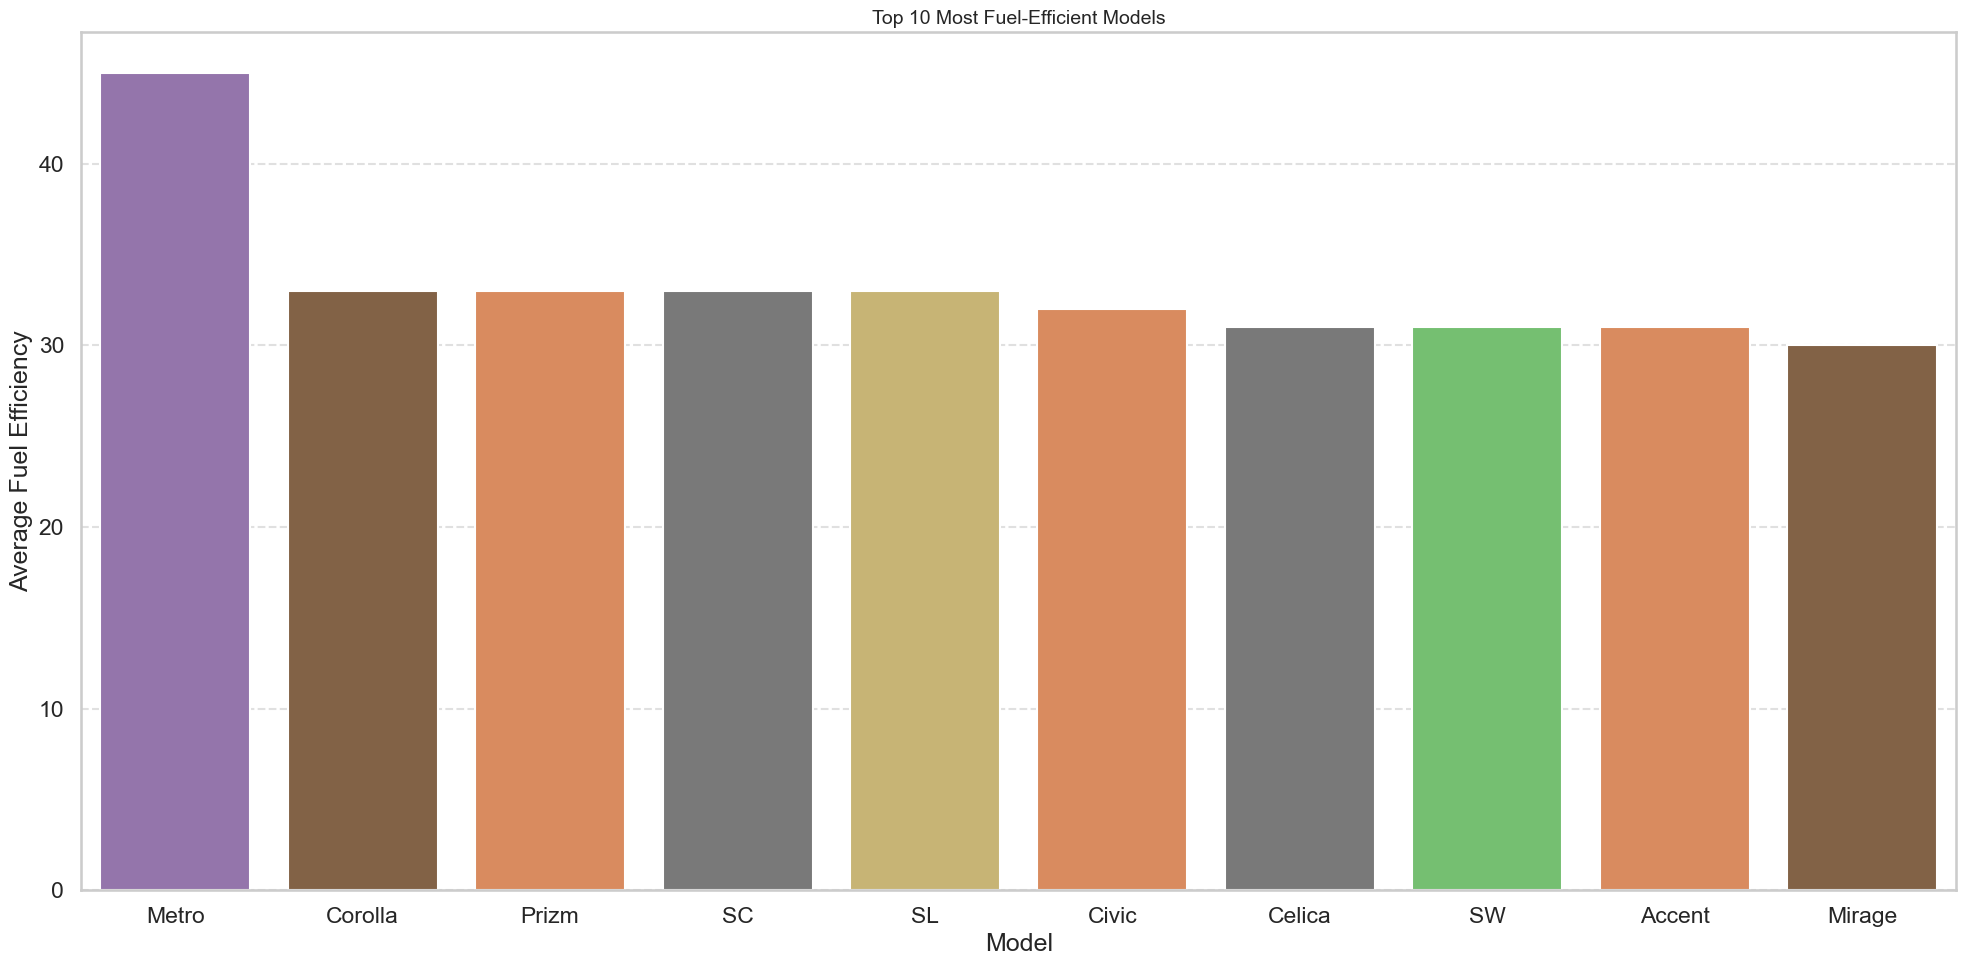

In [45]:
model_efficiency_df = (df.groupby('Model', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False).reset_index())
top_models_df = model_efficiency_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

sns.barplot(data=top_models_df, x='Model', y='Fuel_efficiency', hue='Model', order=model_order_list, palette='muted', dodge=False, legend=False)
plt.title(f'Top {TOP_N_MODELS} Most Fuel-Efficient Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Fuel Efficiency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 8.4 Correlation of Numeric Features with Fuel Efficiency

Identifies numeric features most strongly correlated with Fuel_Efficiency.

Only features with strong correlations will be explored further.

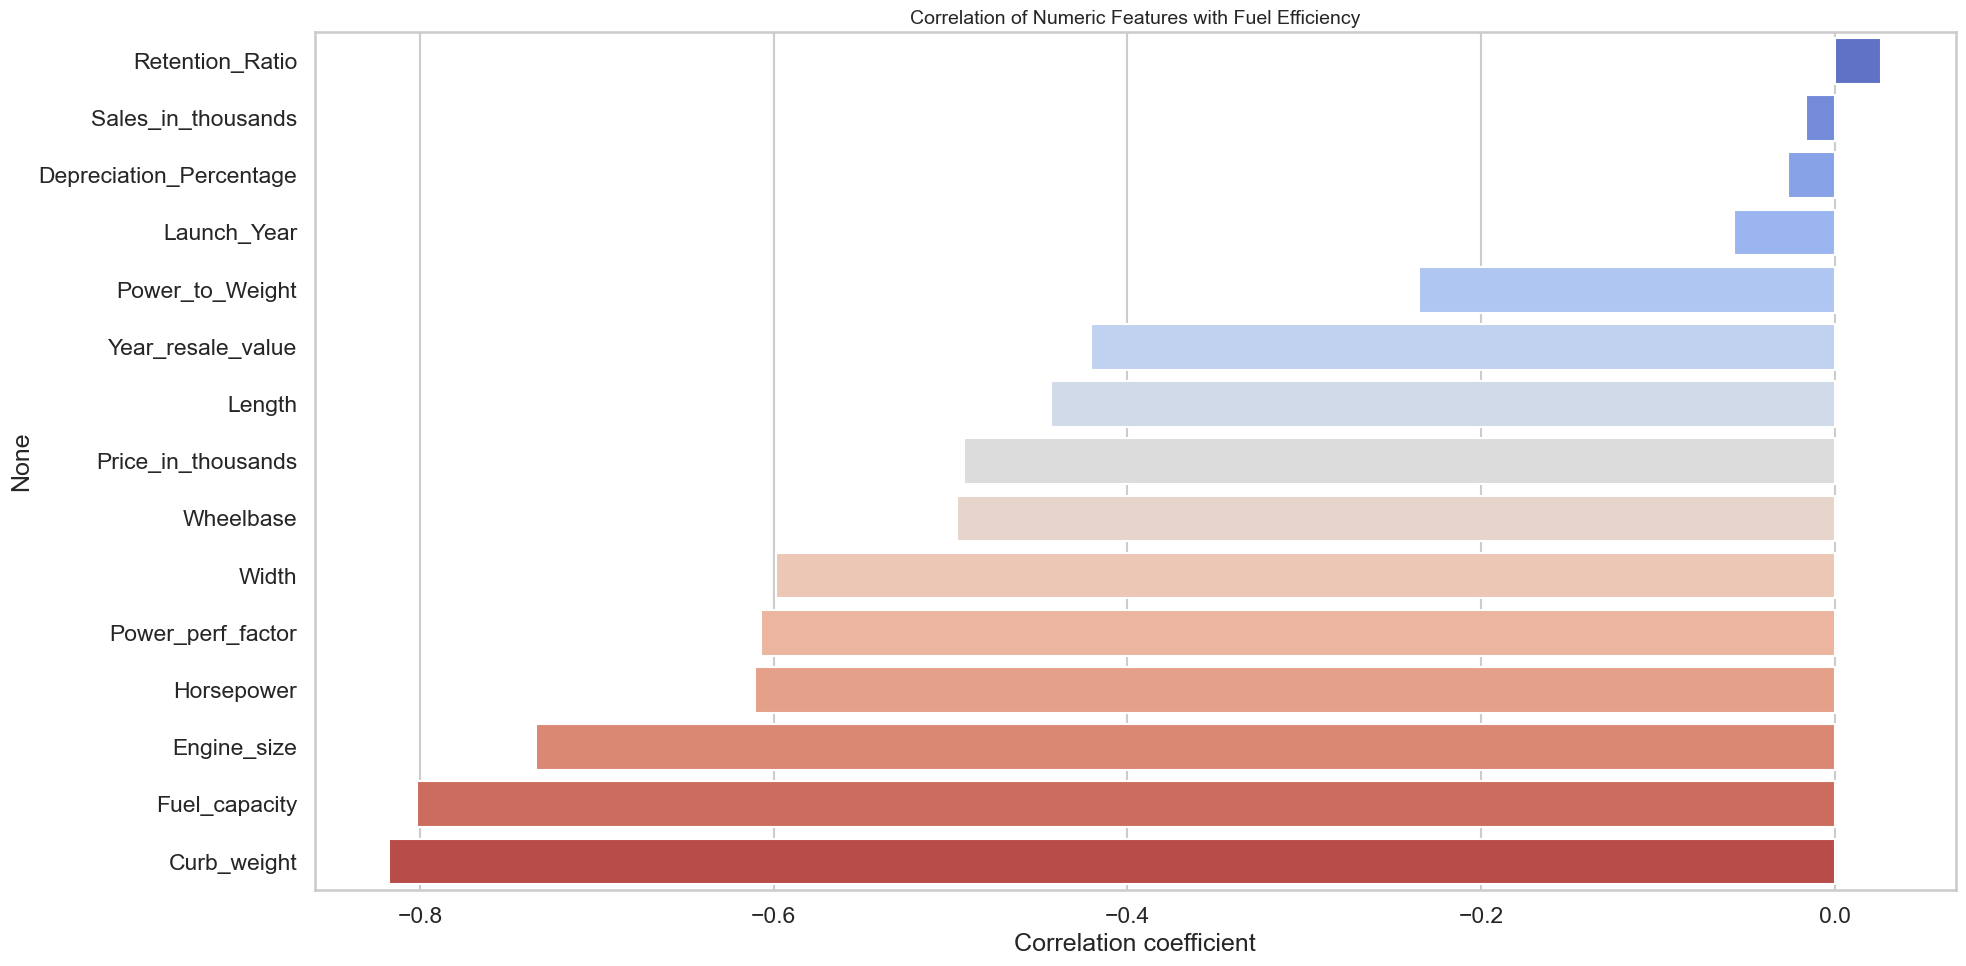

Selected fuel-efficiency-driving features:
 ['Engine_size', 'Horsepower', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']


In [46]:
fuel_corr = corr_matrix['Fuel_efficiency'].drop('Fuel_efficiency')
fuel_corr_sorted = fuel_corr.sort_values(ascending=False)
sns.barplot(x=fuel_corr_sorted.values, y=fuel_corr_sorted.index, hue=fuel_corr_sorted.index,
            palette='coolwarm', dodge=False, legend=False)
plt.title('Correlation of Numeric Features with Fuel Efficiency', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.show()

# Select features with strong correlations (|corr| ≥ threshold)
selected_fuel_features = fuel_corr[fuel_corr.abs() >= threshold].index.tolist()
print('Selected fuel-efficiency-driving features:\n', selected_fuel_features)

### 8.4.1 Performance vs Fuel Efficiency

Investigate the trade-off between Engine Size, Horsepower, and other performance attributes and Fuel Efficiency.

Performance features influencing Fuel efficiency:
 ['Engine_size', 'Horsepower', 'Power_perf_factor']


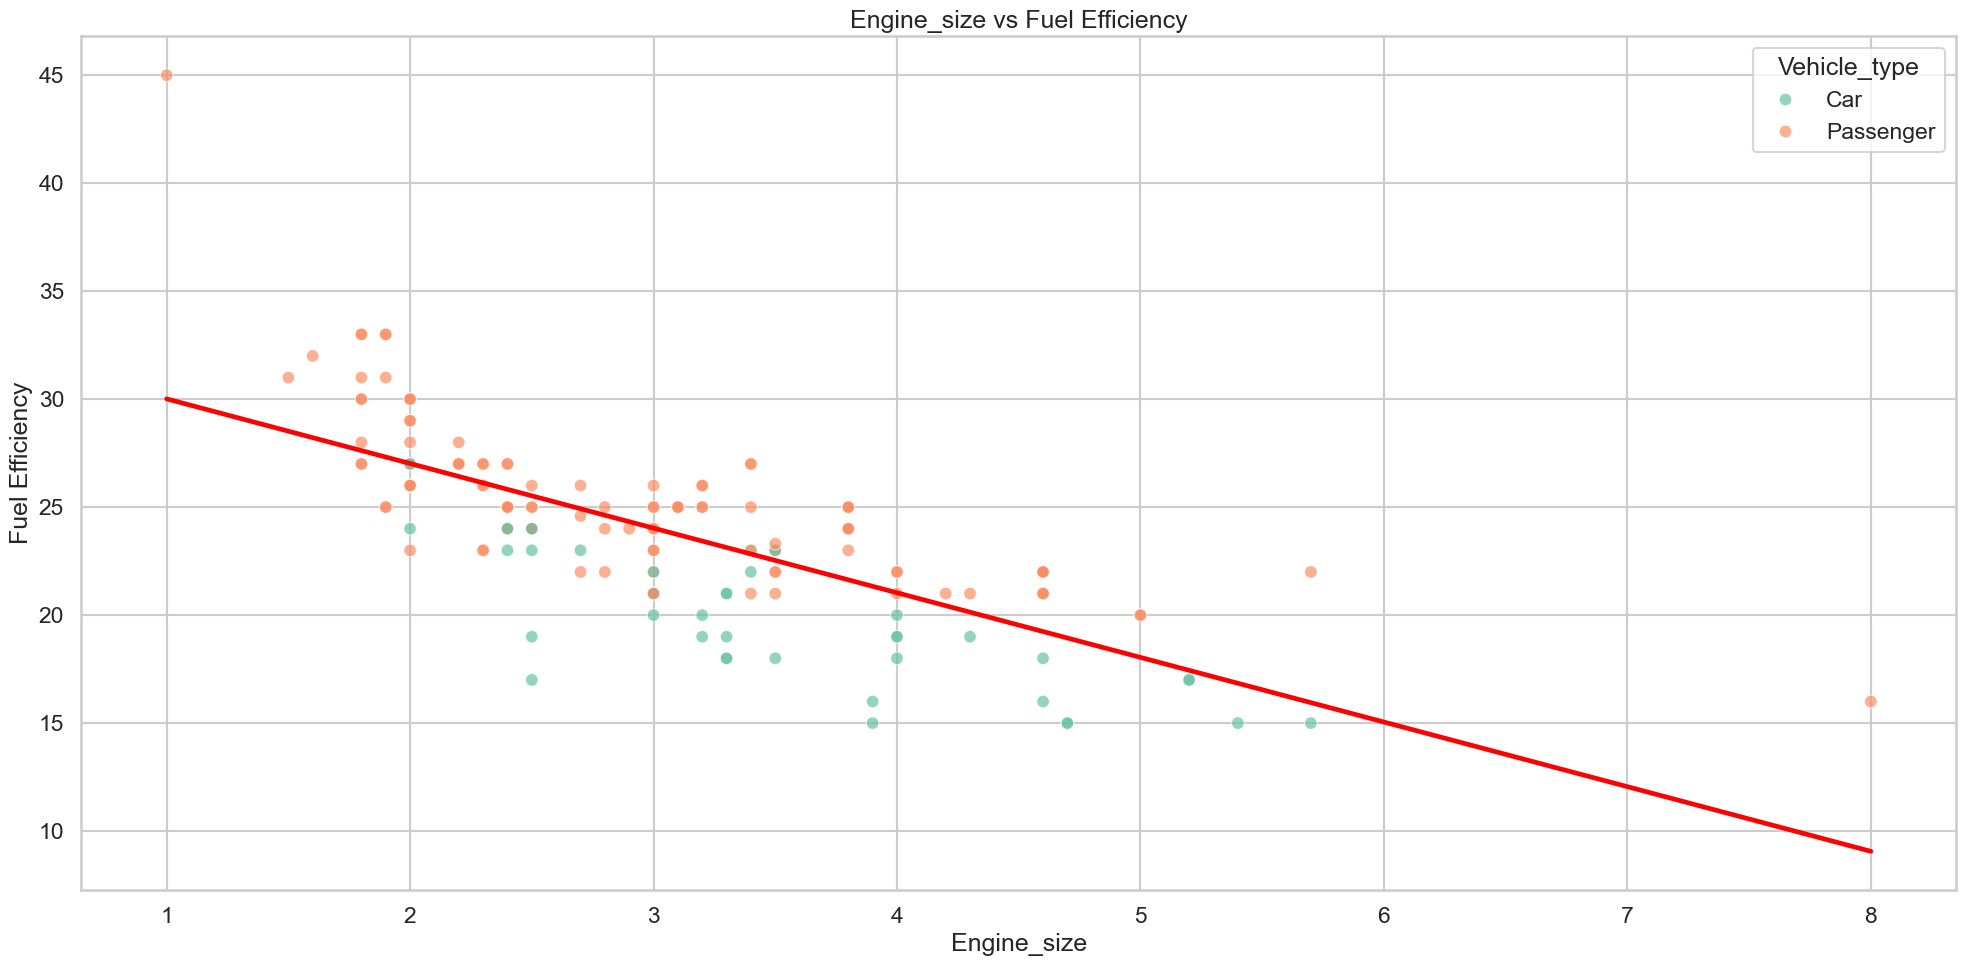

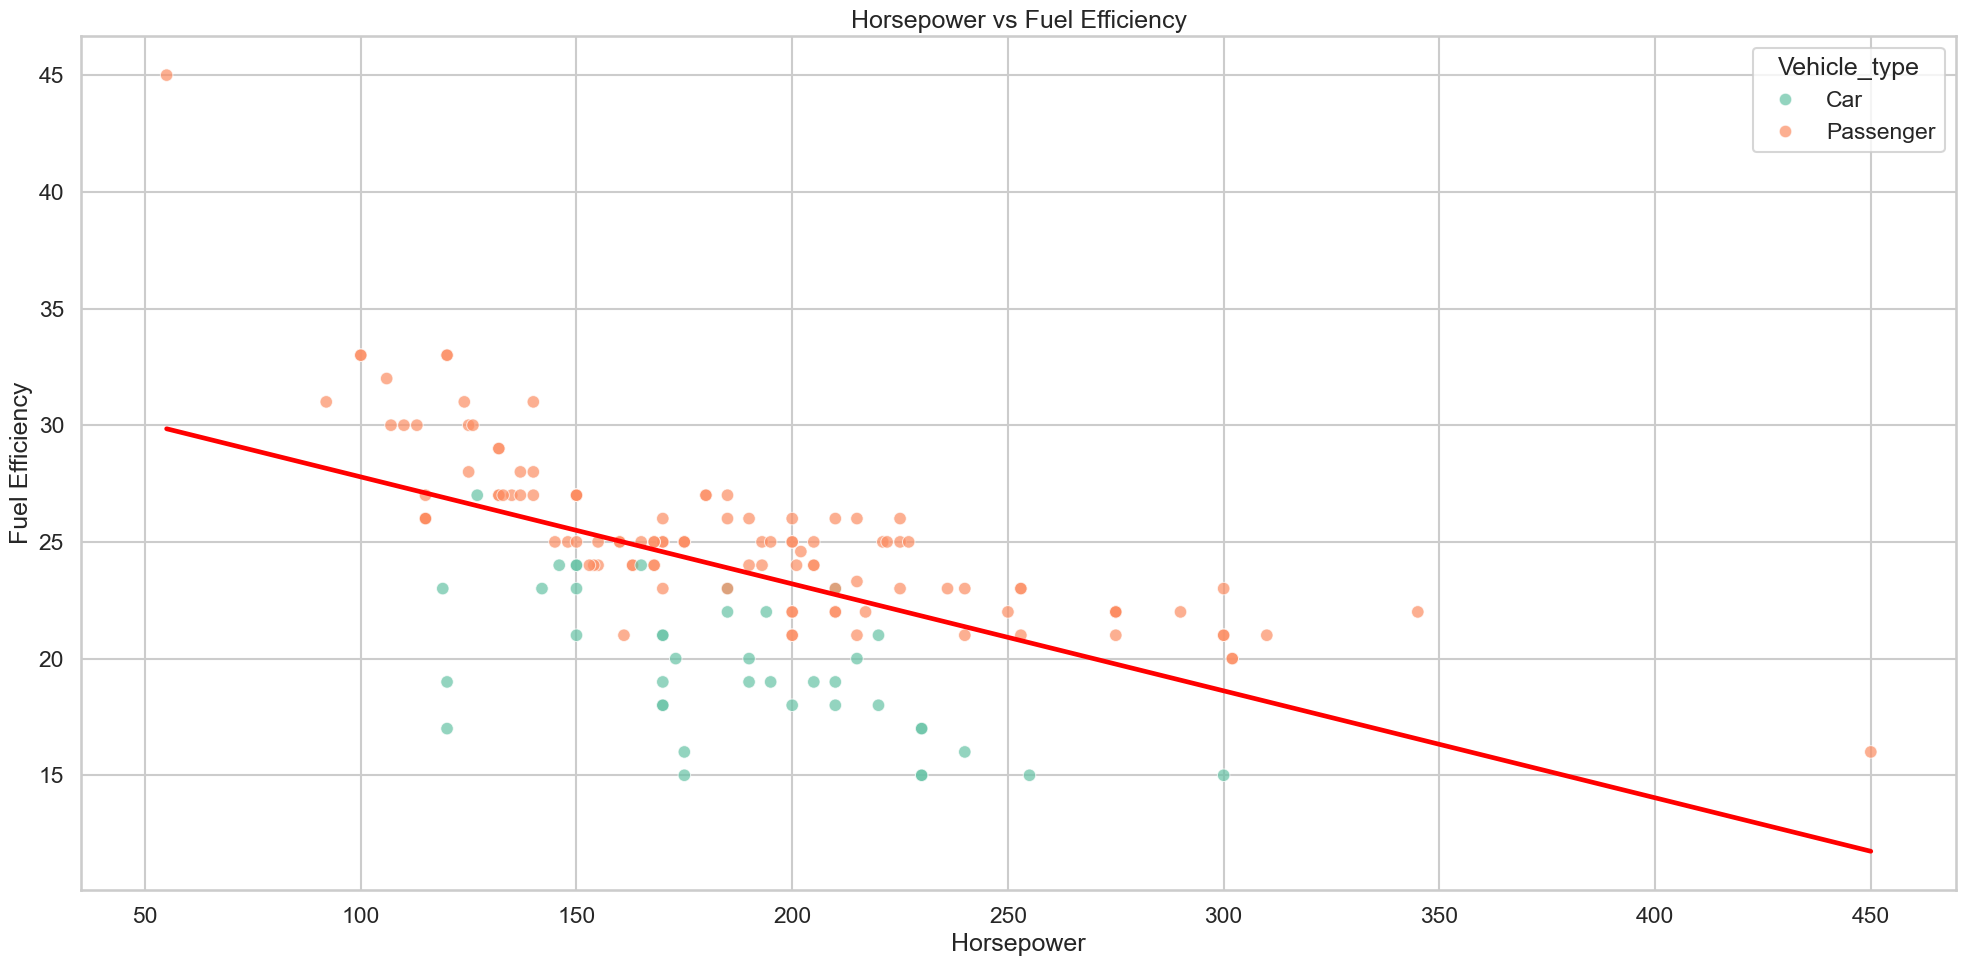

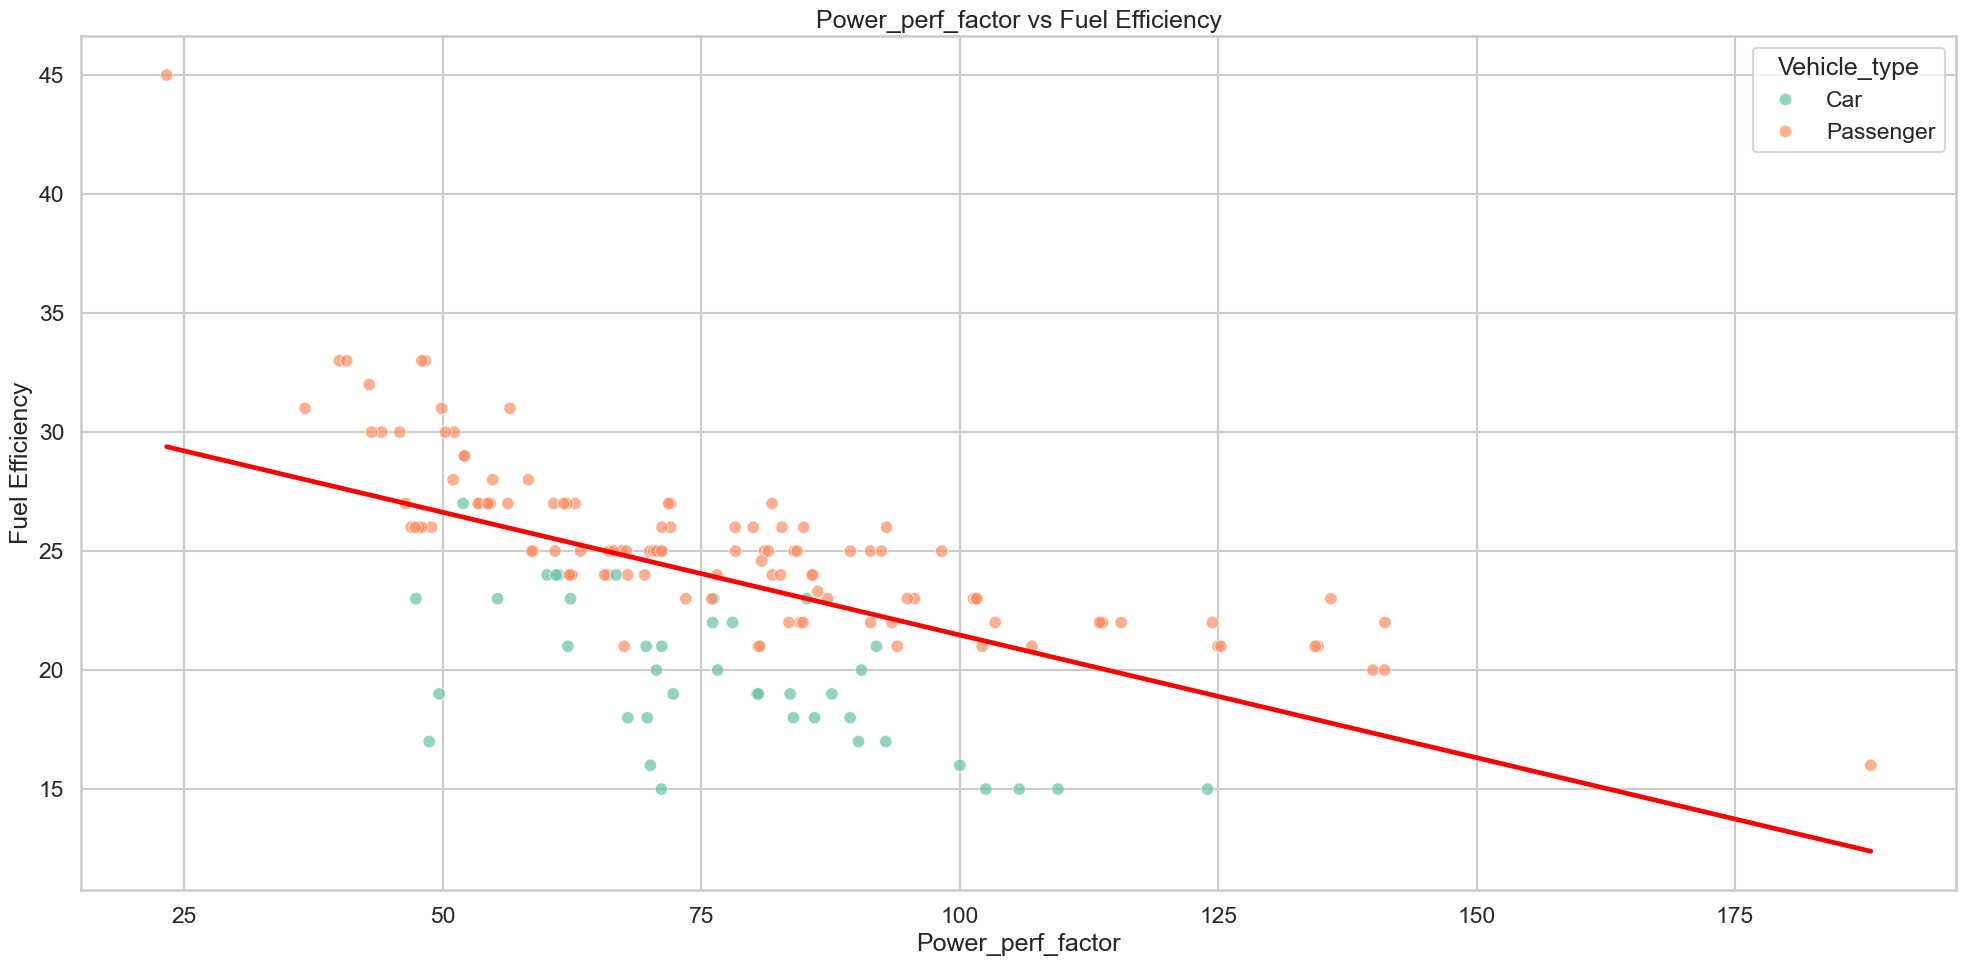

In [47]:
performance_fuel = [f for f in performance_features if f in selected_fuel_features]
print("Performance features influencing Fuel efficiency:\n", performance_fuel)

if len(performance_fuel) > 0:
    for feature in performance_fuel:
        sns.scatterplot(data=df, x=feature, y='Fuel_efficiency', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Fuel_efficiency', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Fuel Efficiency')
        plt.xlabel(feature)
        plt.ylabel('Fuel Efficiency')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated performance features found — skipping performance plots.")

### 8.4.2 Design Attributes vs Fuel Efficiency

Compare how weight, wheelbase, and vehicle length impact efficiency.


Design features influencing Fuel efficiency:
 ['Curb_weight', 'Fuel_capacity']


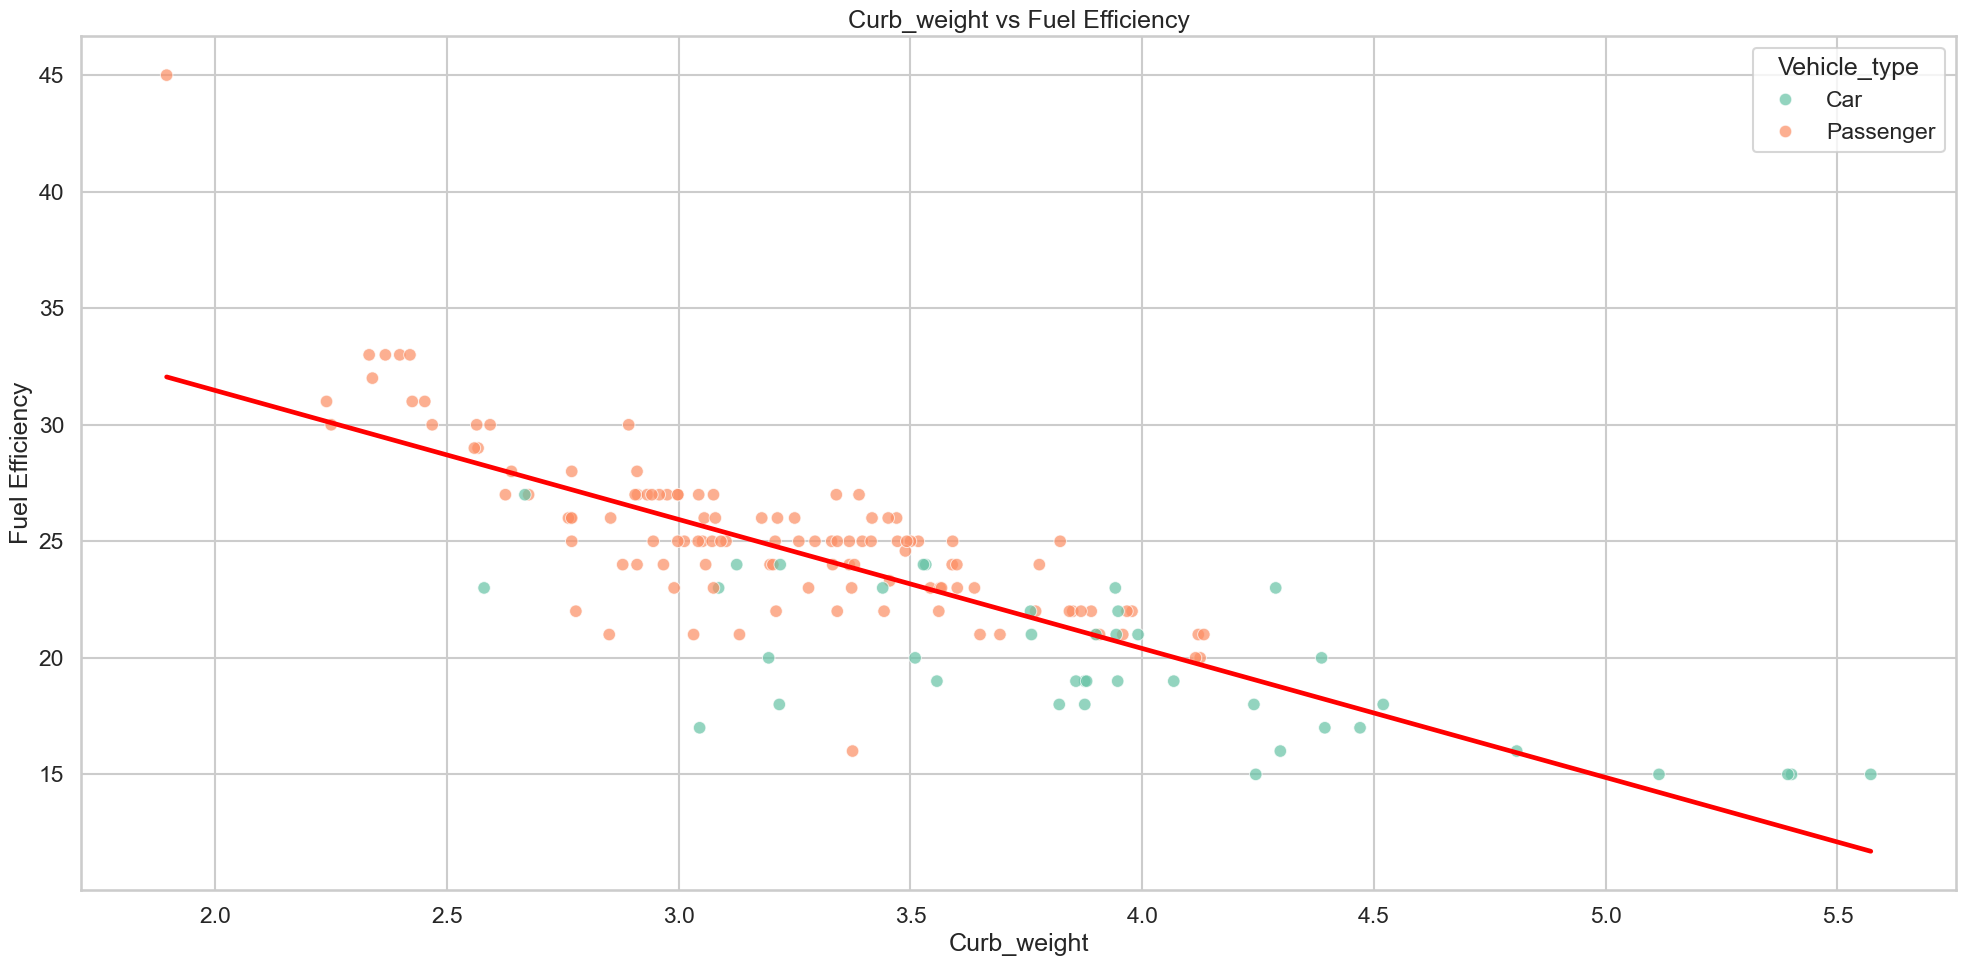

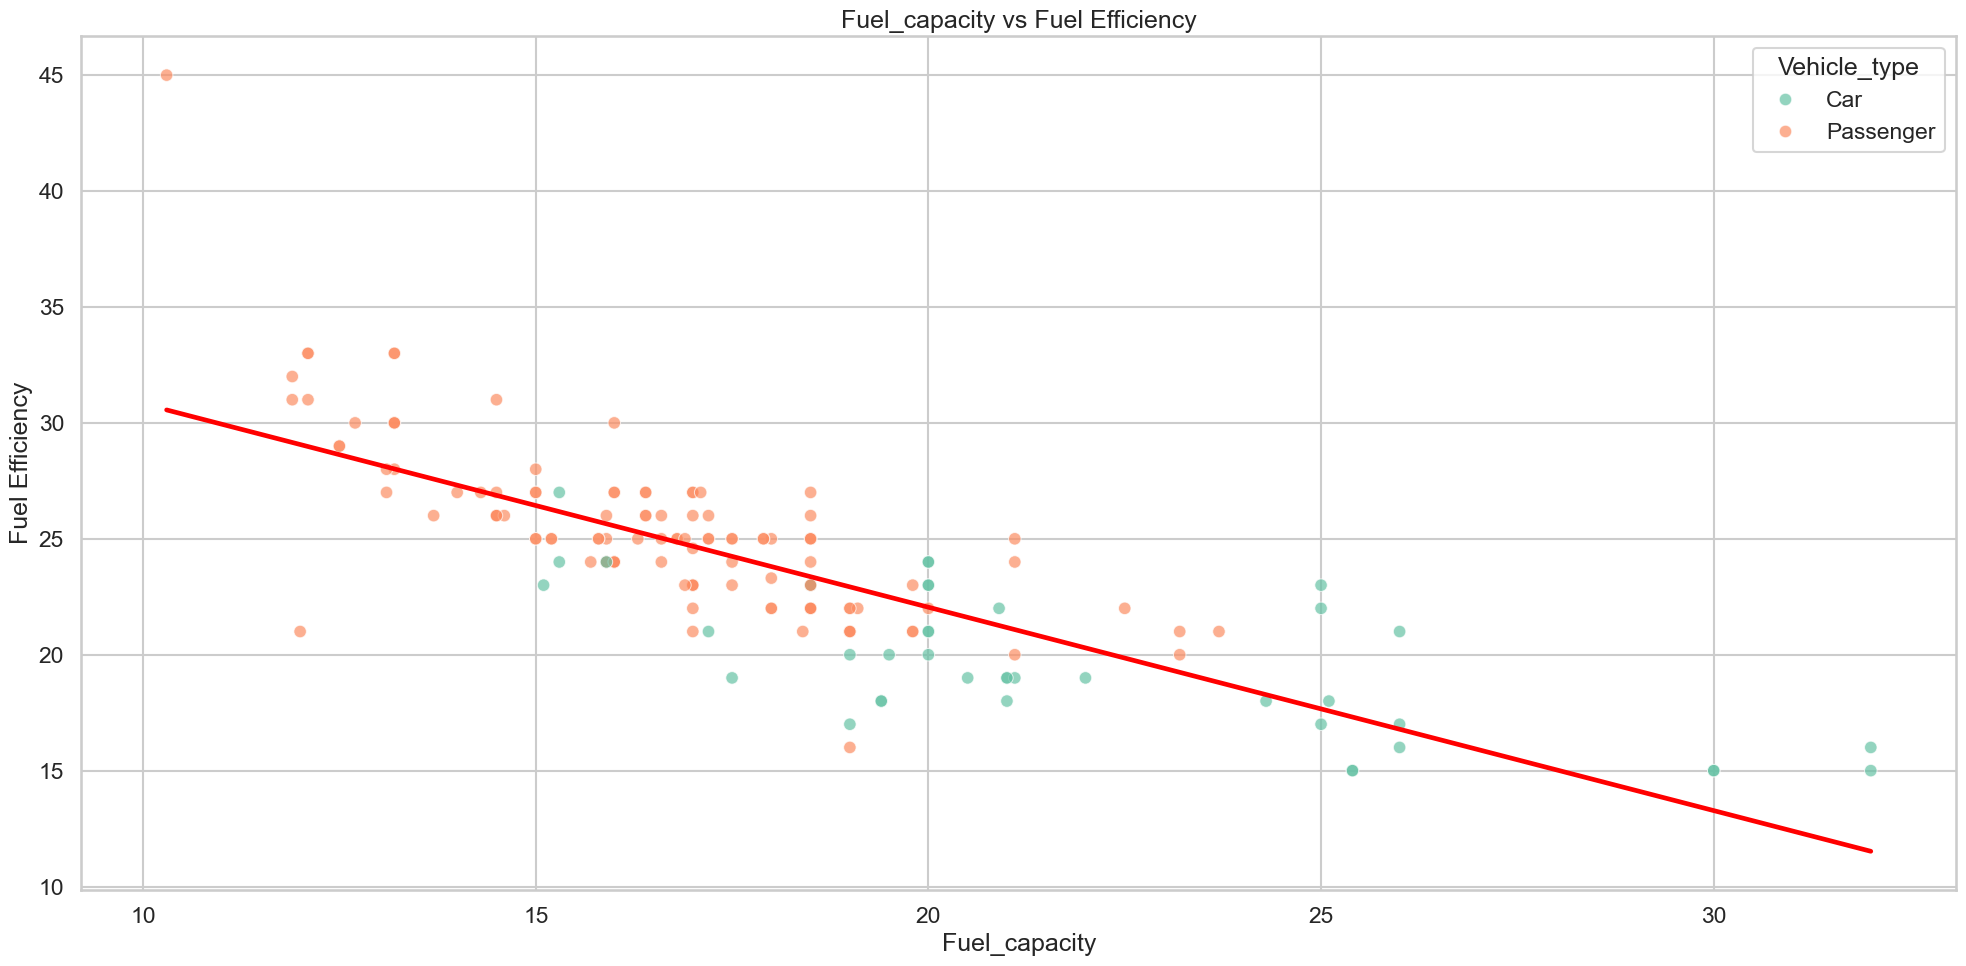

In [48]:
design_fuel = [f for f in design_features if f in selected_fuel_features]
print("\nDesign features influencing Fuel efficiency:\n", design_fuel)

if len(design_fuel) > 0:
    for feature in design_fuel:
        sns.scatterplot(data=df, x=feature, y='Fuel_efficiency', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Fuel_efficiency', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Fuel Efficiency')
        plt.xlabel(feature)
        plt.ylabel('Fuel Efficiency')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

### 8.5 Price vs Fuel Efficiency

Assess whether premium vehicles prioritize performance or economy.

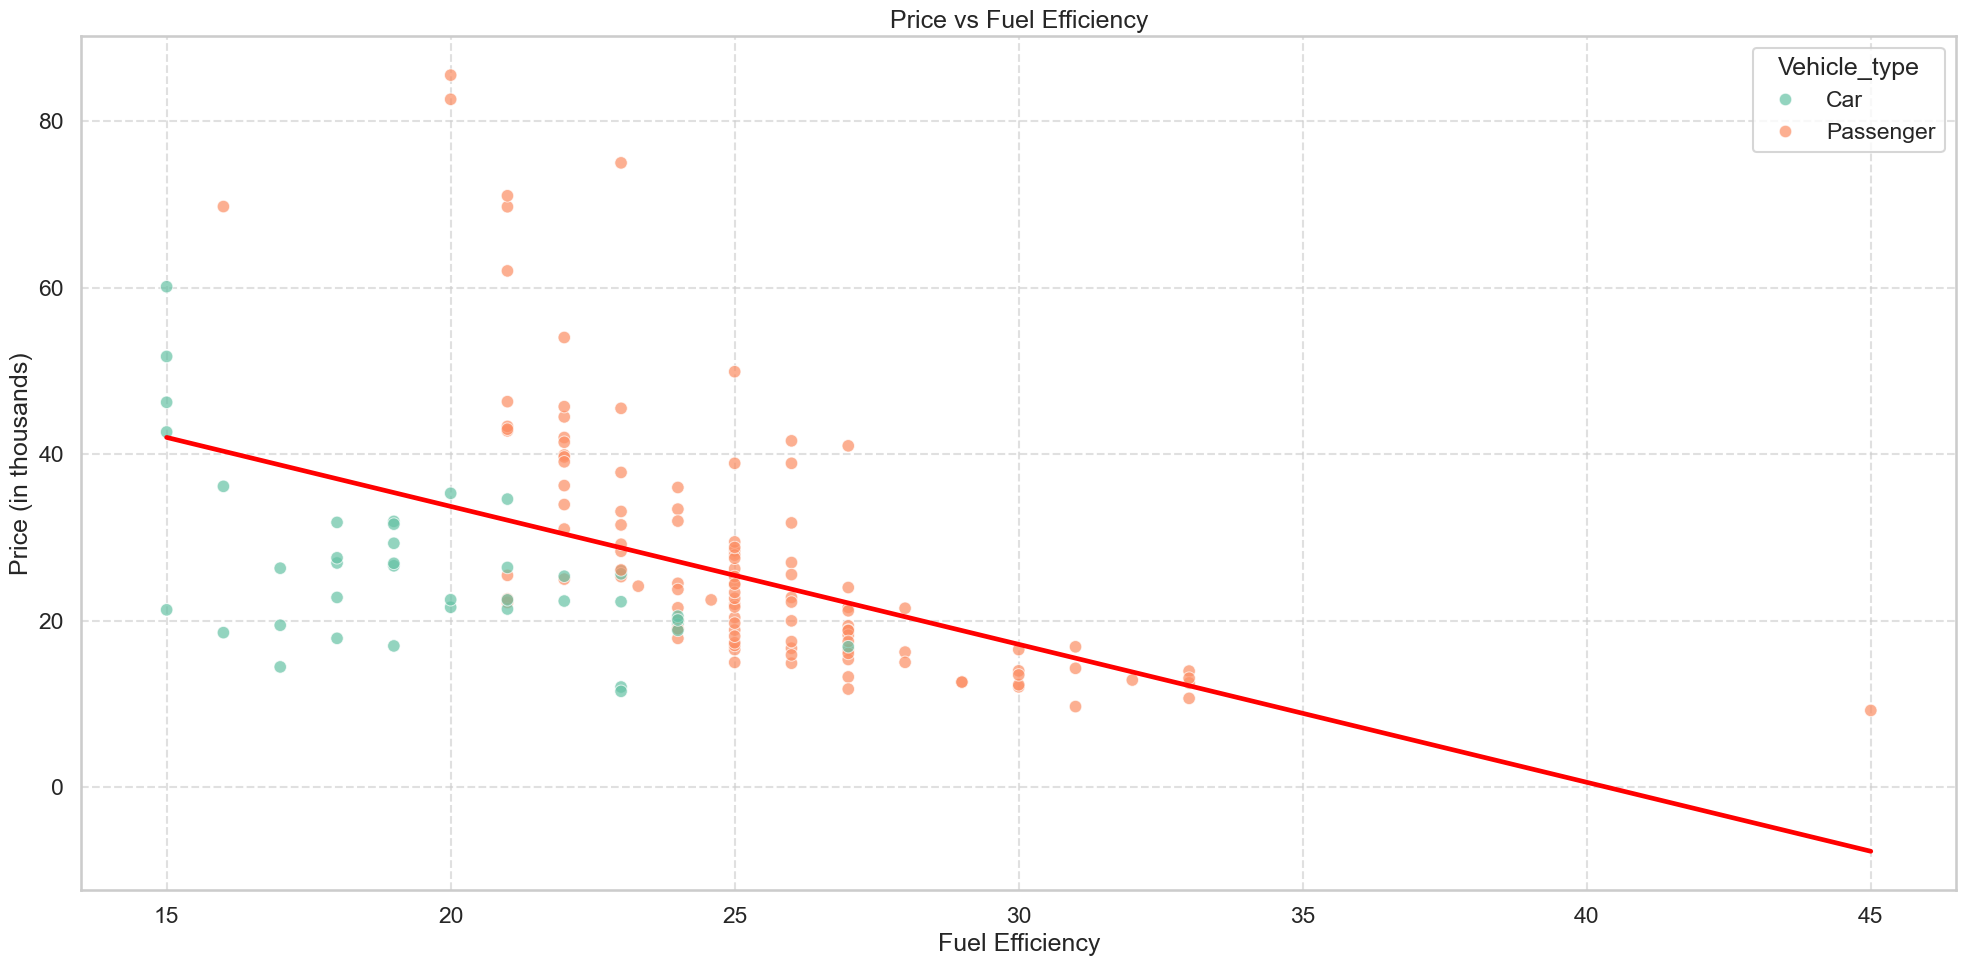

In [49]:
sns.scatterplot(data=df, x='Fuel_efficiency', y='Price_in_thousands', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Fuel_efficiency', y='Price_in_thousands', scatter=False, color='red', ci=None)
plt.title('Price vs Fuel Efficiency')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Price (in thousands)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 💬 Fuel Efficiency Insights:

Fuel efficiency falls with increasing power and weight.

Manufacturers face a clear trade-off: performance often come at the cost of efficiency.

Compact and economy cars deliver the highest fuel efficiency, while SUVs and performance cars lag behind.

Efficiency champions are dominated by small-displacement and hybrid models, emphasizing efficiency-oriented engineering.

## 9. Temporal and Launch Trends

### Age Calculation from Launch Date

To understand how time since launch affects performance, sales, and pricing, we first derive the car’s exact age in **years** from its latest launch date.

In [50]:
current_date = pd.to_datetime(pd.Timestamp.today().date())
df['Age_years'] = ((current_date - df['Latest_Launch']).dt.days // 365).astype('Int64') # type: ignore

### 9.1 Sales Trends Over Time

Visualize annual total sales to identify growth or decline trends.

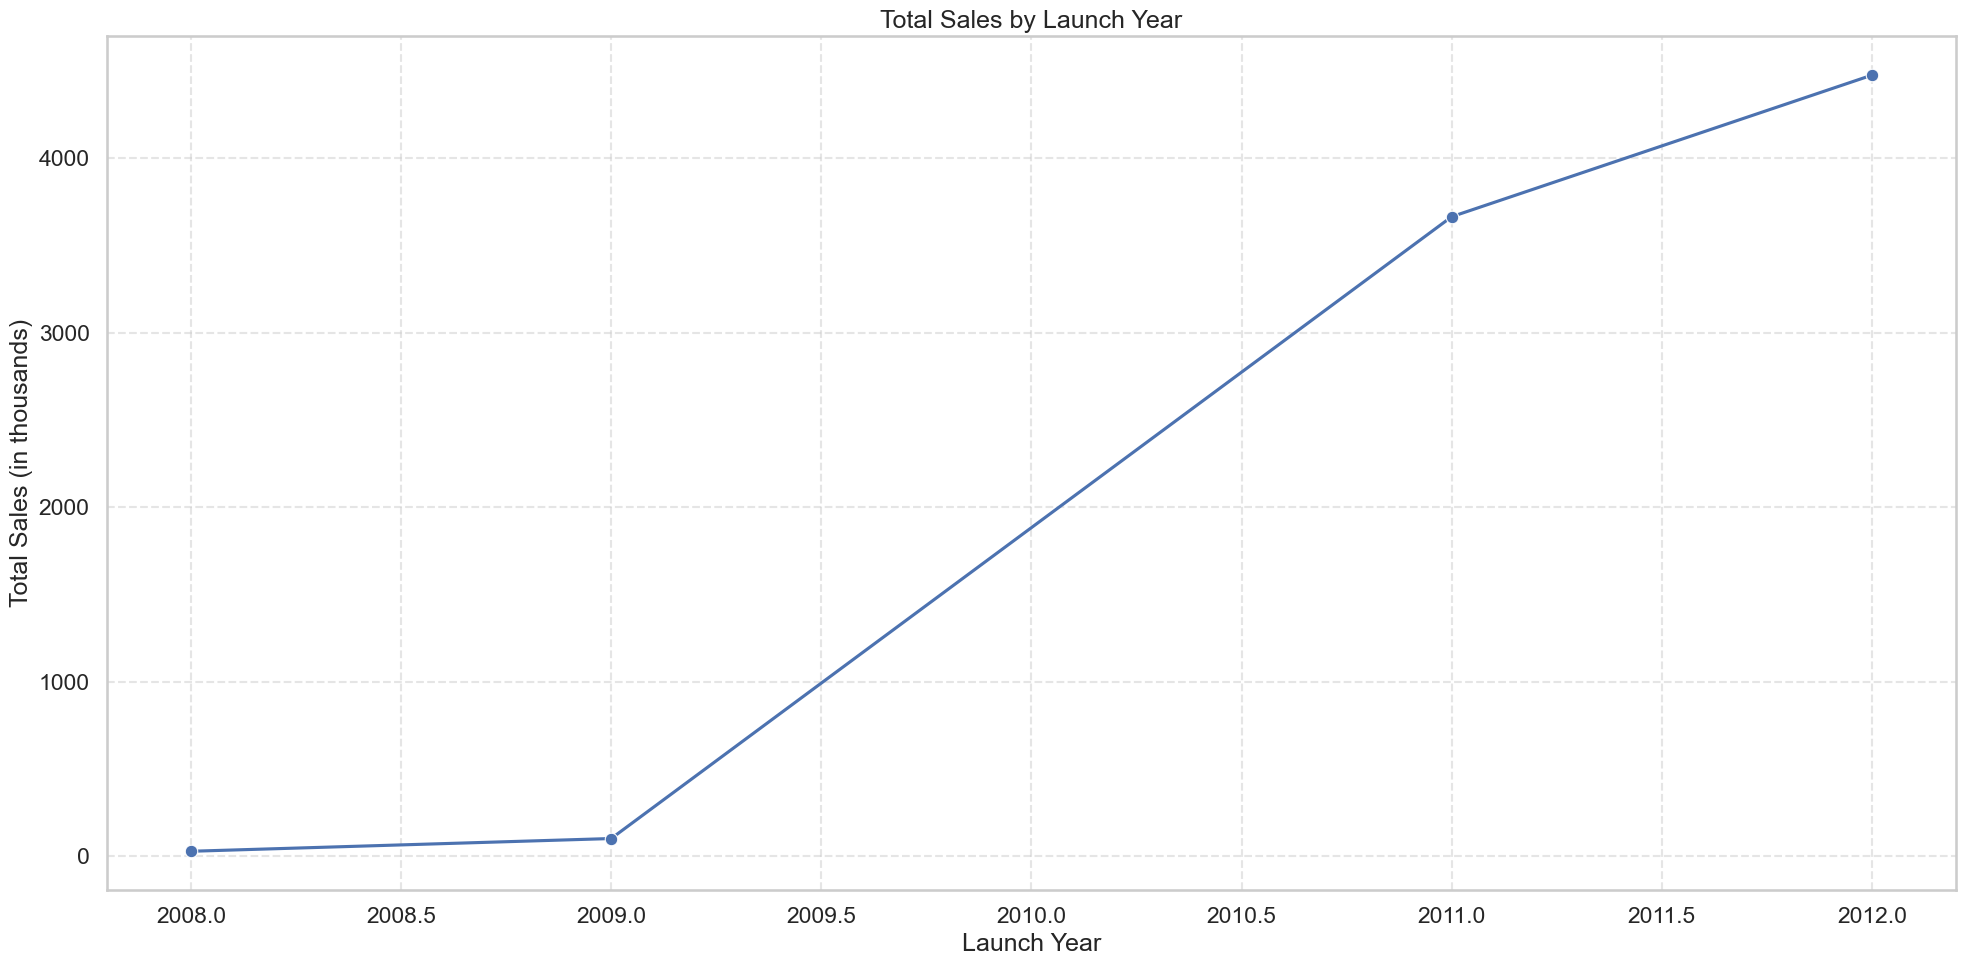

In [51]:
total_sales = df.groupby('Launch_Year')['Sales_in_thousands'].sum()
sns.lineplot(x=total_sales.index, y=total_sales.values, marker='o')
plt.title('Total Sales by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Total Sales (in thousands)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 9.2 Price Trends Over Time

Examine changes in average car prices per year.

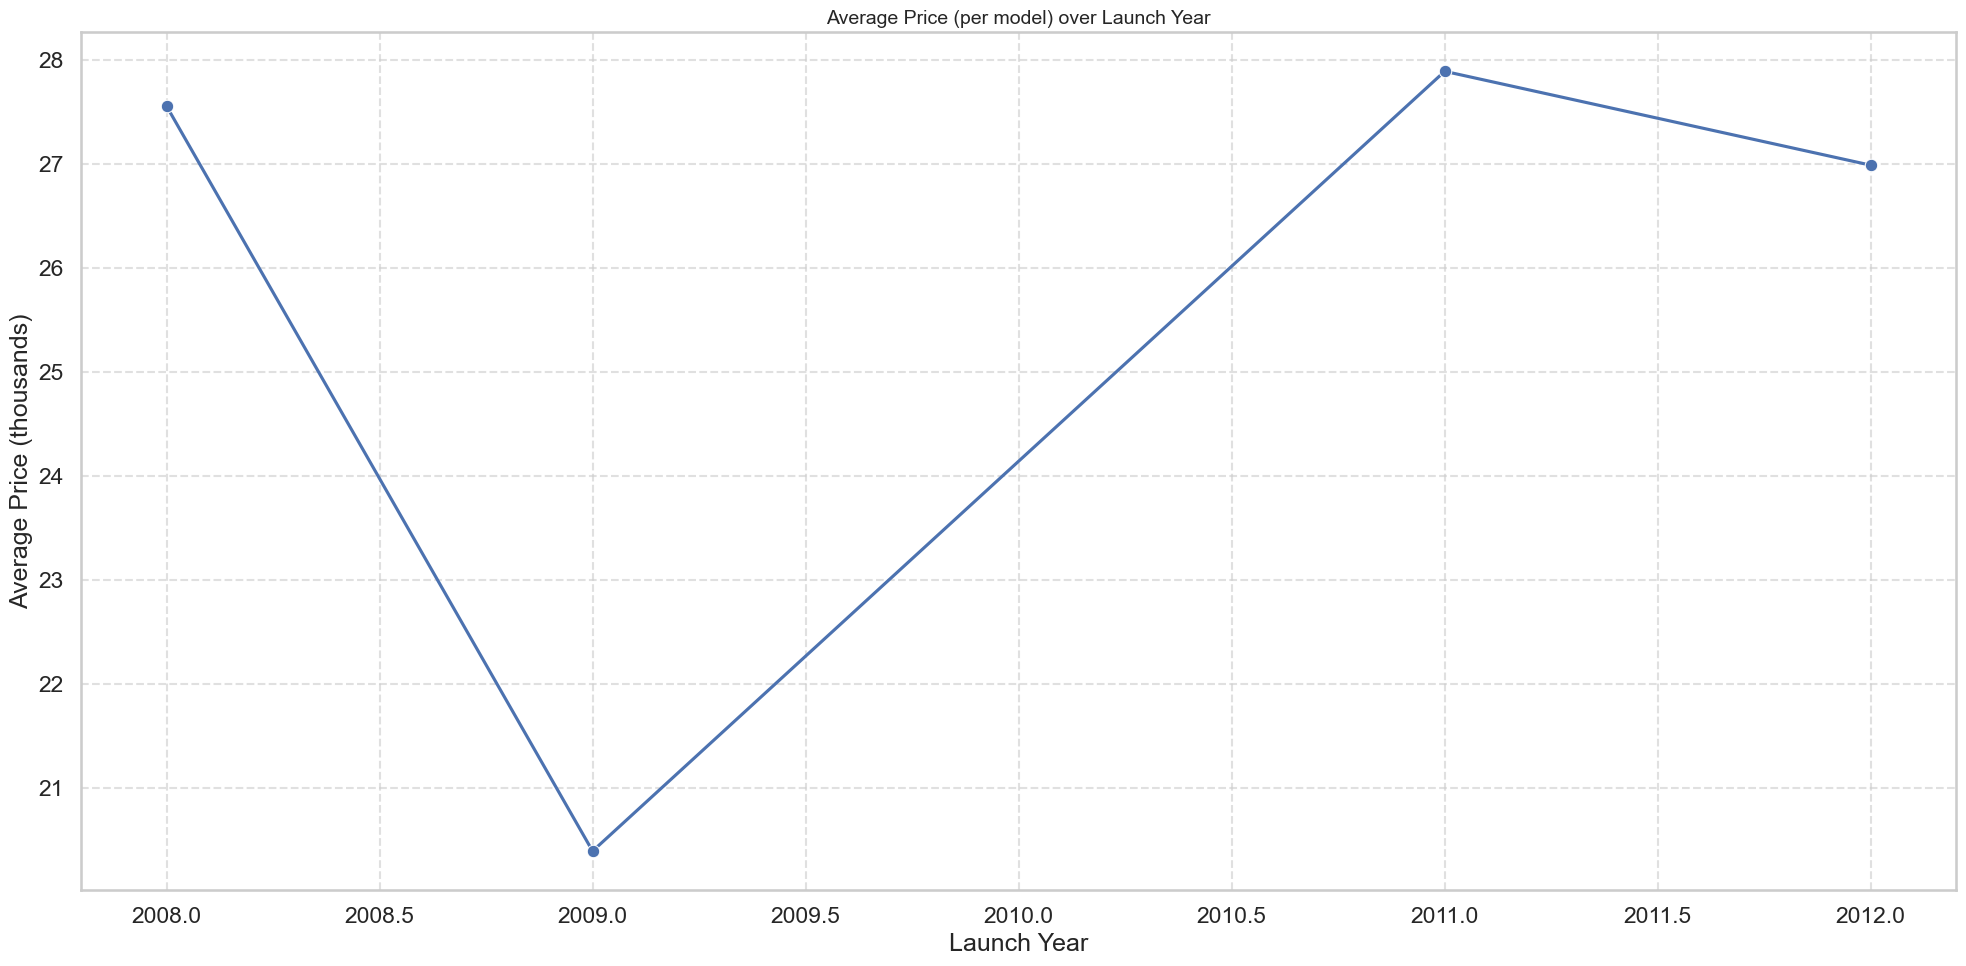

In [52]:
avg_price_by_year = df.groupby('Launch_Year')['Price_in_thousands'].mean()
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o')
plt.title('Average Price (per model) over Launch Year', fontsize=14)
plt.xlabel('Launch Year')
plt.ylabel('Average Price (thousands)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 9.3 Resale Value Over Time

Track average resale value trends for models by launch year.

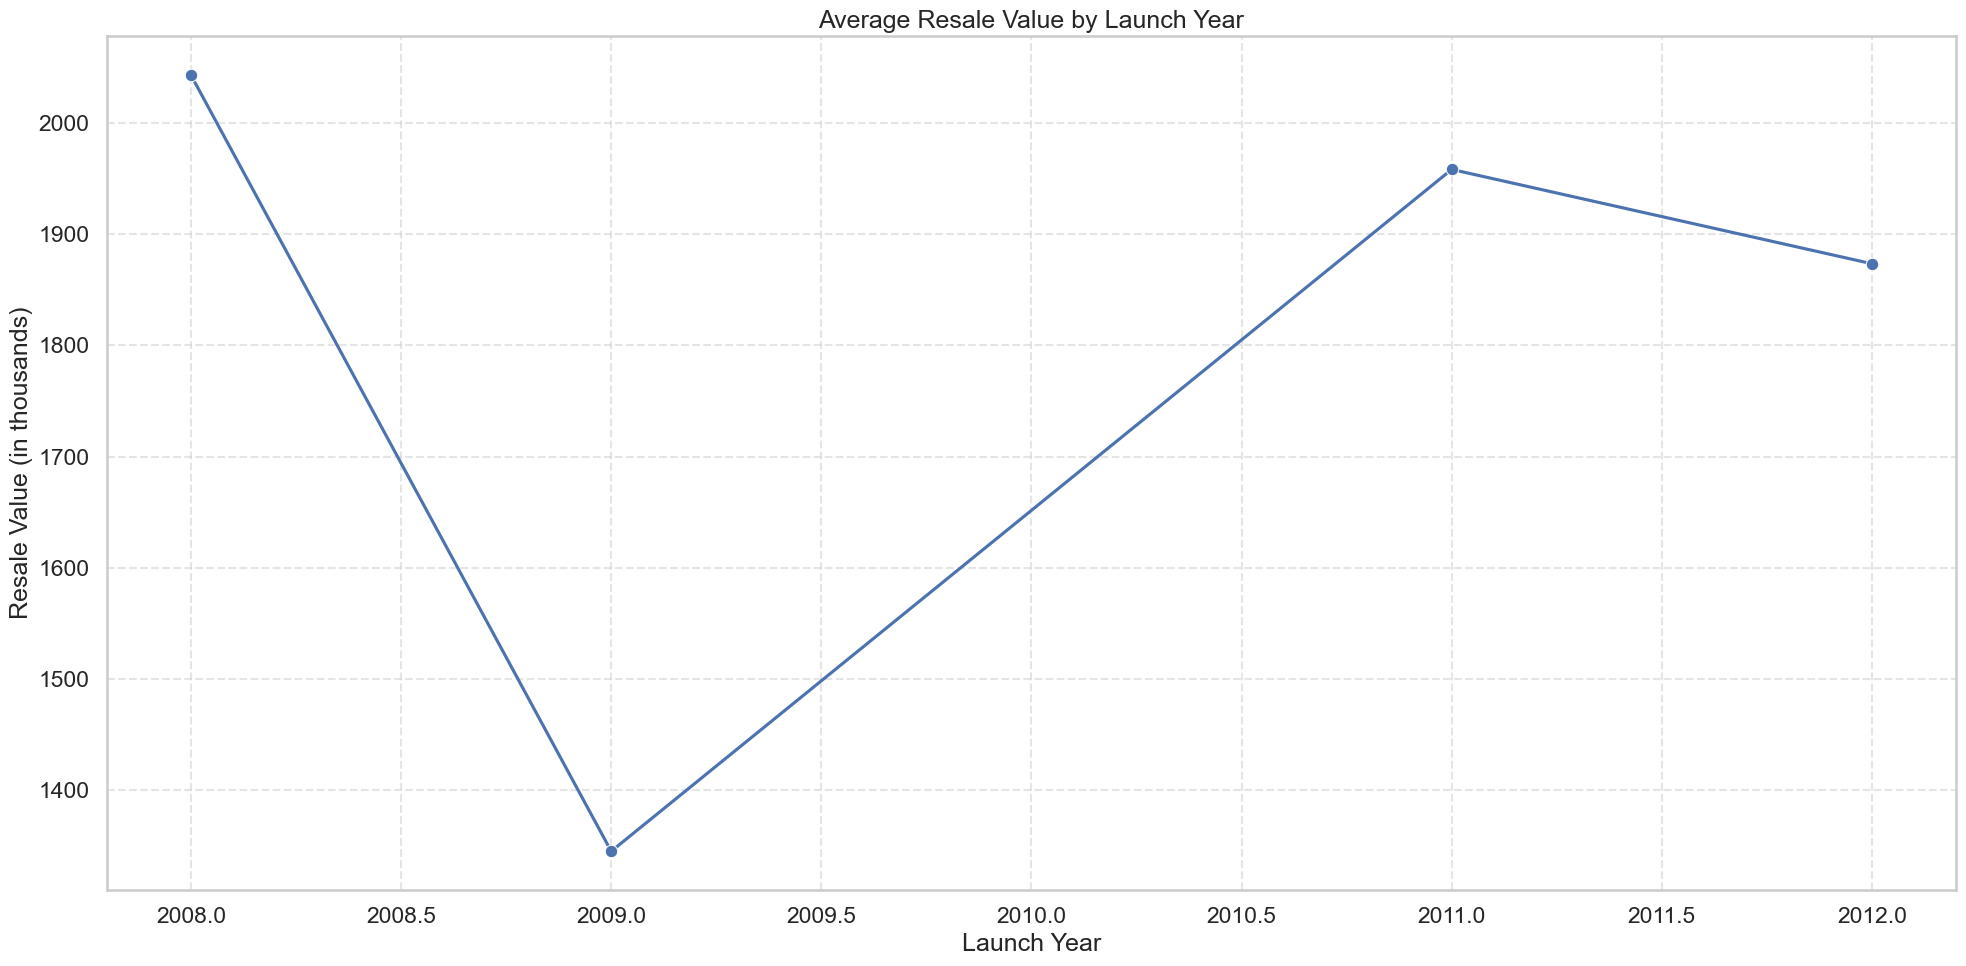

In [53]:
avg_retention = df.groupby('Launch_Year')['Year_resale_value'].mean()
avg_retention_pct = (avg_retention * 100)
sns.lineplot(x=avg_retention_pct.index, y=avg_retention_pct.values, marker='o')
plt.title('Average Resale Value by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Resale Value (in thousands)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 9.4 Fuel Efficiency Over Time

Visualize whether modern cars have become more fuel-efficient.

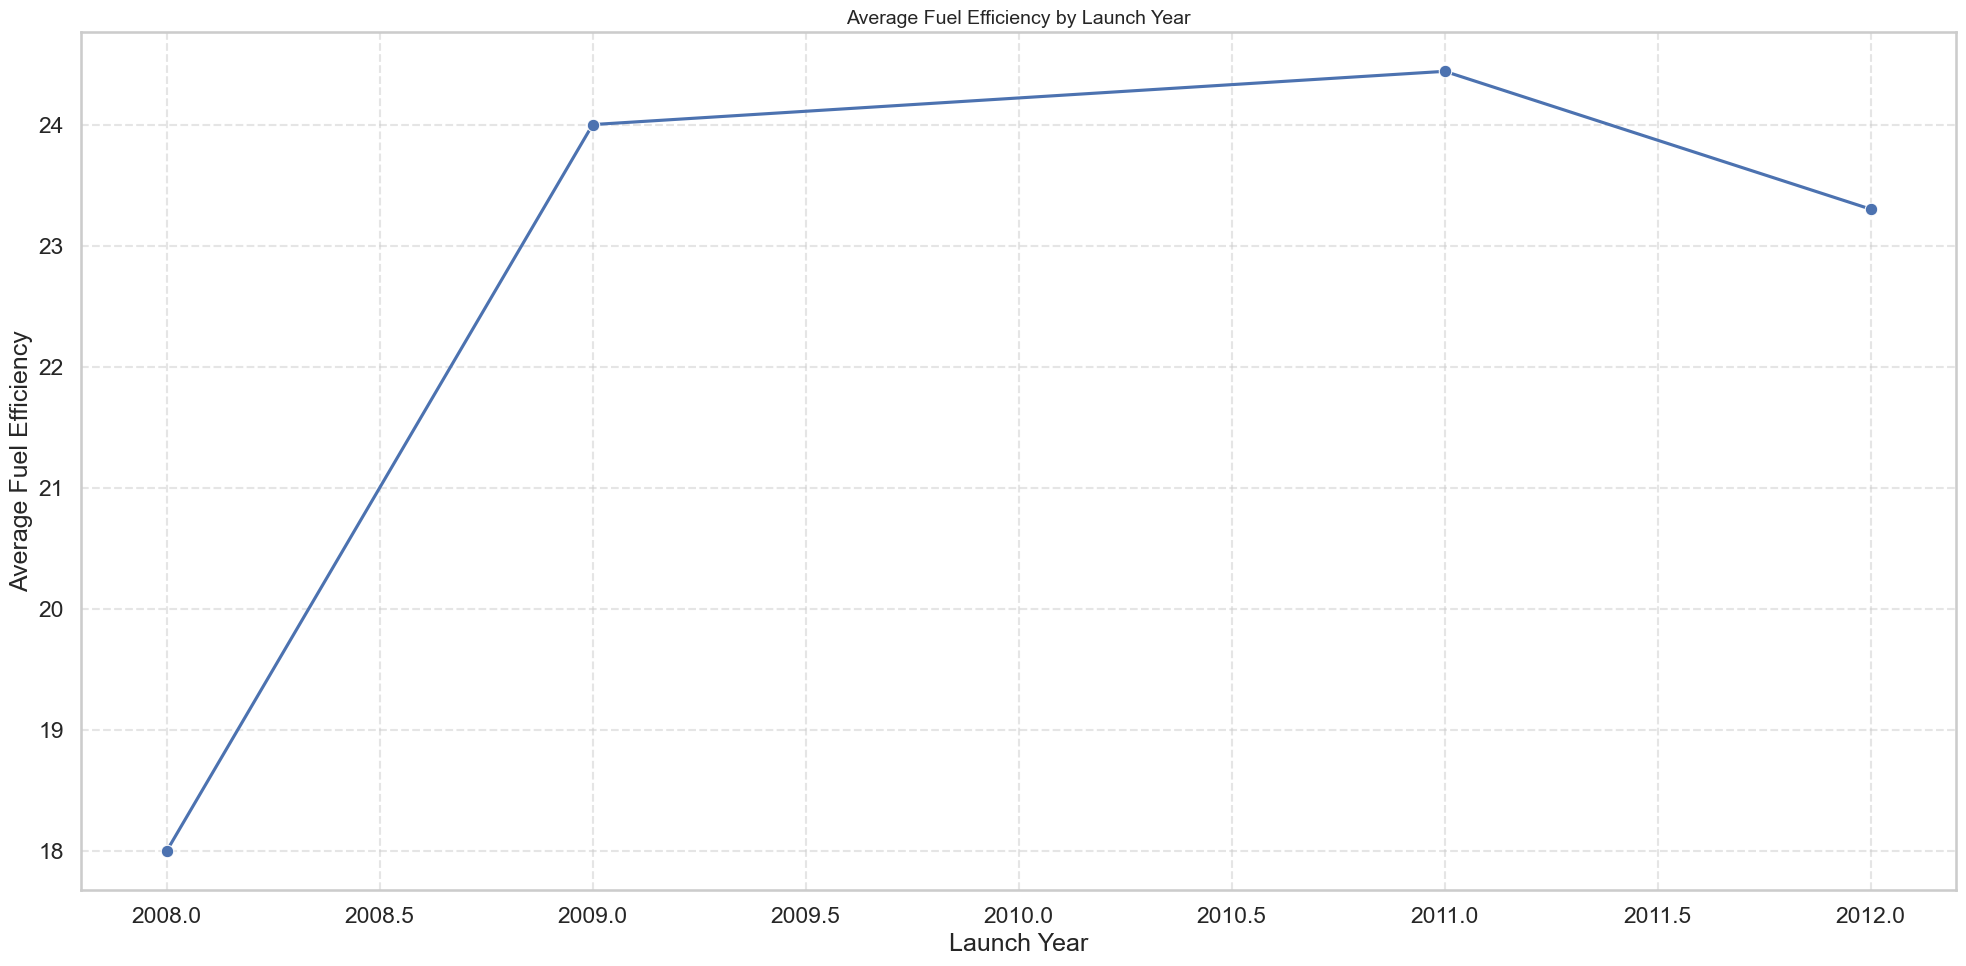

In [54]:
avg_fuel = df.groupby('Launch_Year')['Fuel_efficiency'].mean()
sns.lineplot(x=avg_fuel.index, y=avg_fuel.values, marker='o')
plt.title('Average Fuel Efficiency by Launch Year', fontsize=14)
plt.xlabel('Launch Year')
plt.ylabel('Average Fuel Efficiency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 9.5 Are Newer Cars More Fuel-Efficient?

Do modern launches exhibit higher fuel efficiency than older models?

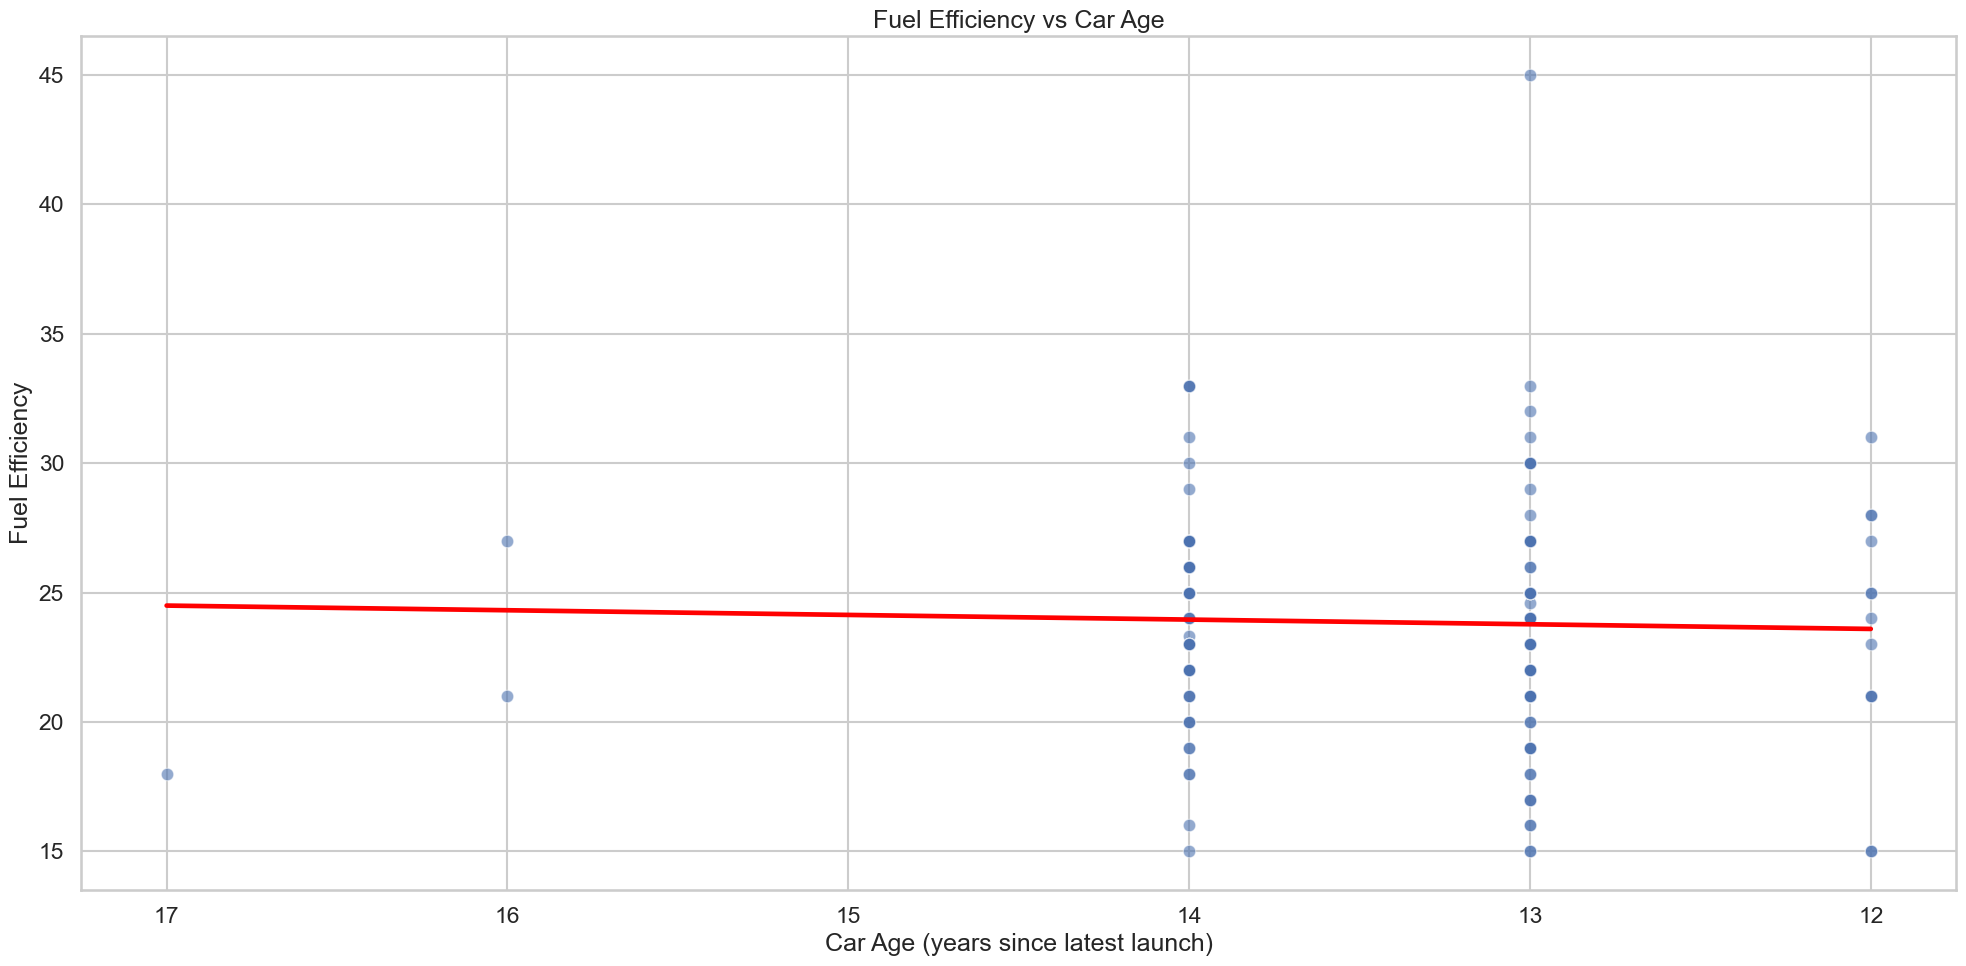

In [55]:
sns.scatterplot(data=df, x='Age_years', y='Fuel_efficiency', alpha=0.6)
sns.regplot(data=df, x='Age_years', y='Fuel_efficiency', scatter=False, color='red', ci=None)
plt.title('Fuel Efficiency vs Car Age')
plt.xlabel('Car Age (years since latest launch)')
plt.ylabel('Fuel Efficiency')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### 9.6 Has the Performance–Efficiency Trade-Off Improved Over Time?

Have modern cars become more efficient without sacrificing performance?

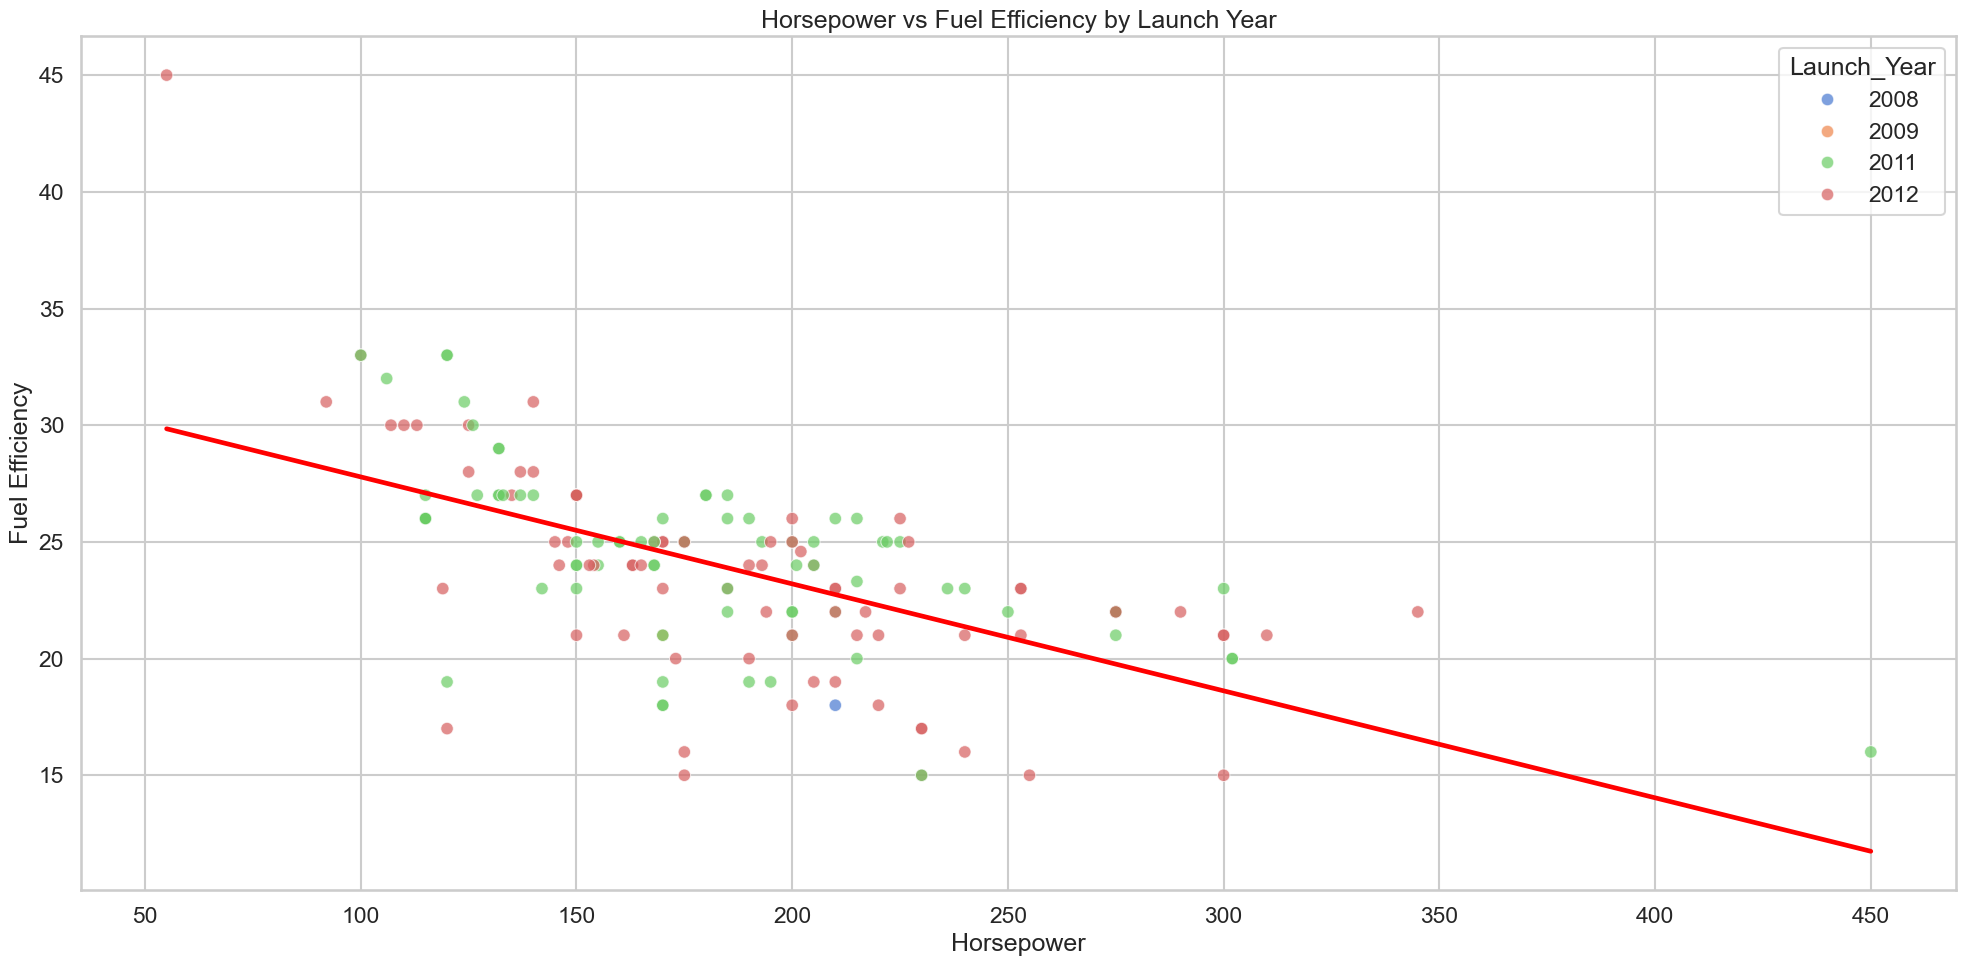

In [56]:
### 10.6 Has the performance-efficiency trade-off changed with newer launches?

sns.scatterplot(data=df, x='Horsepower', y='Fuel_efficiency', hue='Launch_Year', palette='muted', alpha=0.7)
sns.regplot(data=df, x='Horsepower', y='Fuel_efficiency', scatter=False, color='red', ci=None)
plt.title('Horsepower vs Fuel Efficiency by Launch Year')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.tight_layout()
plt.show()

### 💬 Time Trend Insights:

Sales peaked mid-cycle and declined later years.

Prices rose steadily, and modern cars retain value better — but efficiency gains remain modest.

A mild upward trend suggests recent models are engineered for improved mileage, aligning with stricter environmental standards.

The trend indicates gradual convergence — modern cars achieve higher horsepower *and* better fuel efficiency, signaling design optimization.

## 10. Vehicle Segmentation (Quantile-Based)

This section performs unsupervised learning to group vehicles into natural market segments based on price ranges. 

### 10.1 Segment Distribution

The dataset is evenly divided into four price segments — Economy, Mid-Range, Premium, and Luxury — using quartile-based cutoffs (pd.qcut).

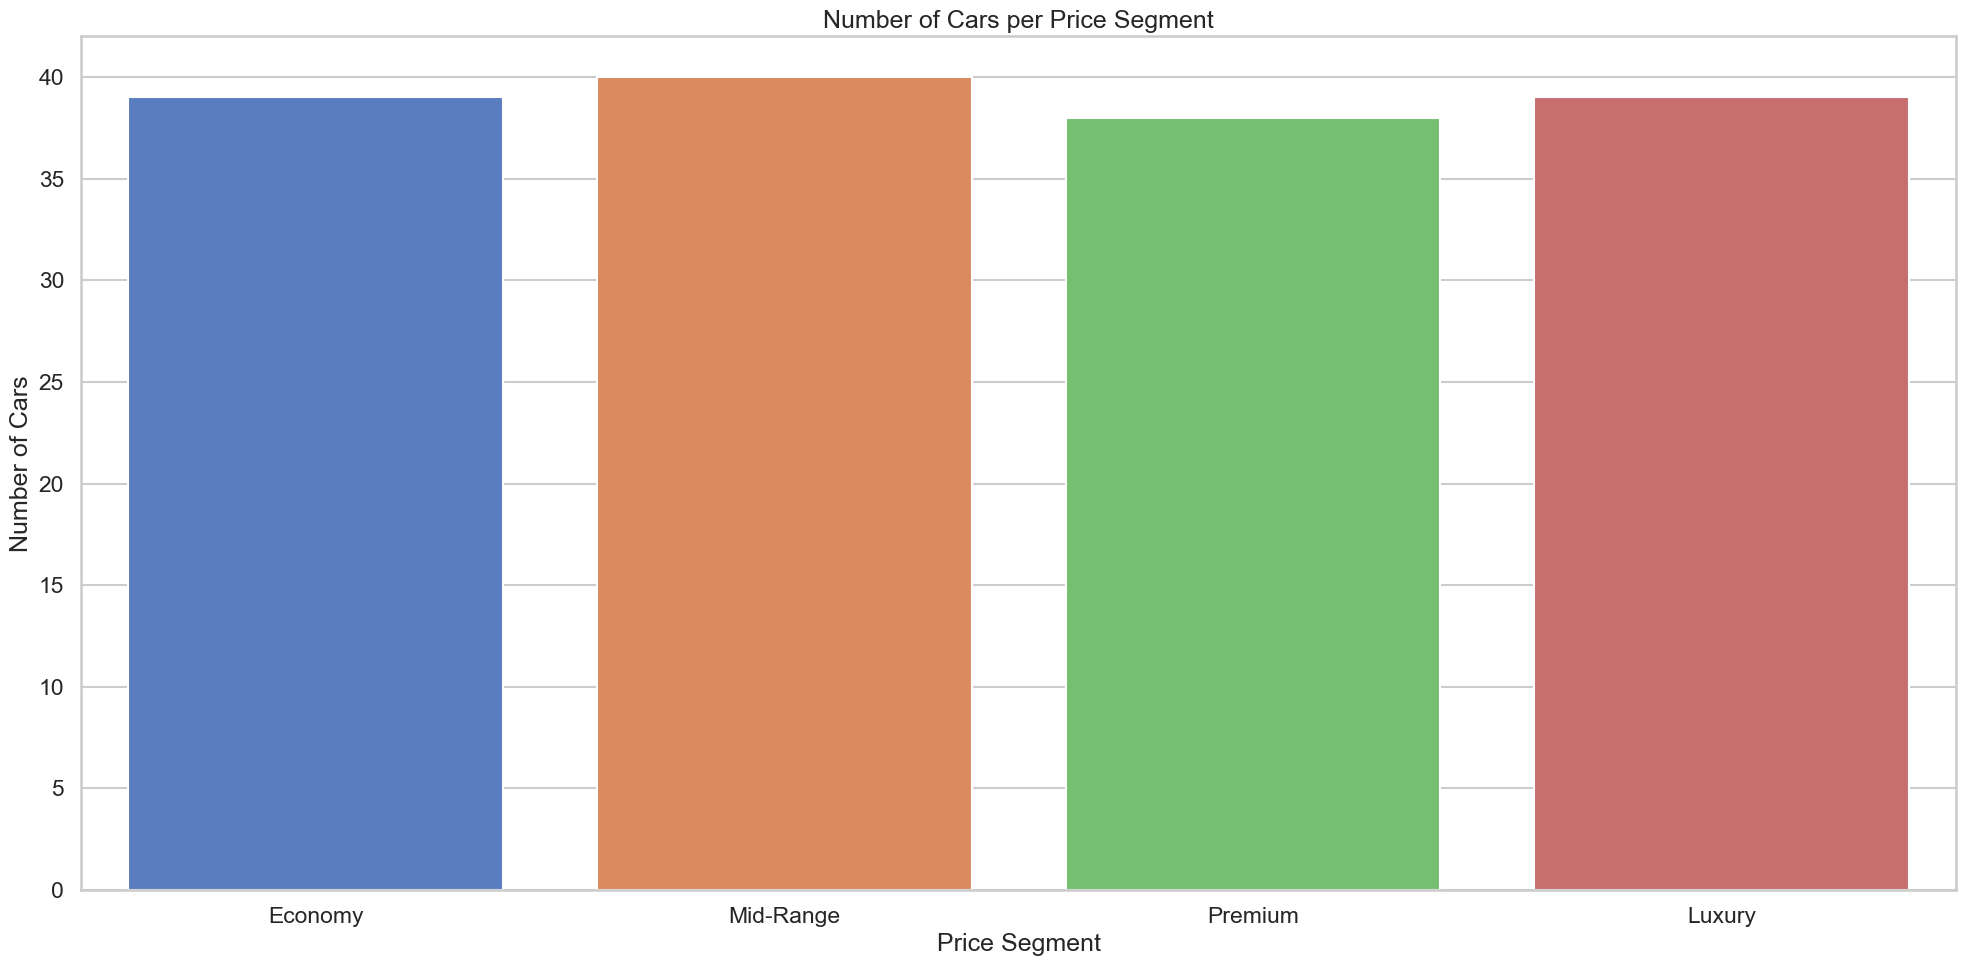

In [57]:
labels = ['Economy', 'Mid-Range', 'Premium', 'Luxury']
df['Price_Segment'] = pd.qcut(df['Price_in_thousands'], q=4, labels=labels)

# Number of Cars per Segment
segment_counts = df['Price_Segment'].value_counts().reindex(labels)
sns.barplot(x=segment_counts.index.astype(str), y=segment_counts.values, hue=segment_counts.index.astype(str), palette='muted')
plt.title('Number of Cars per Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

### 10.2 Average Sales by Price Segment

Analyze how **sales** varies across these pricing tiers.

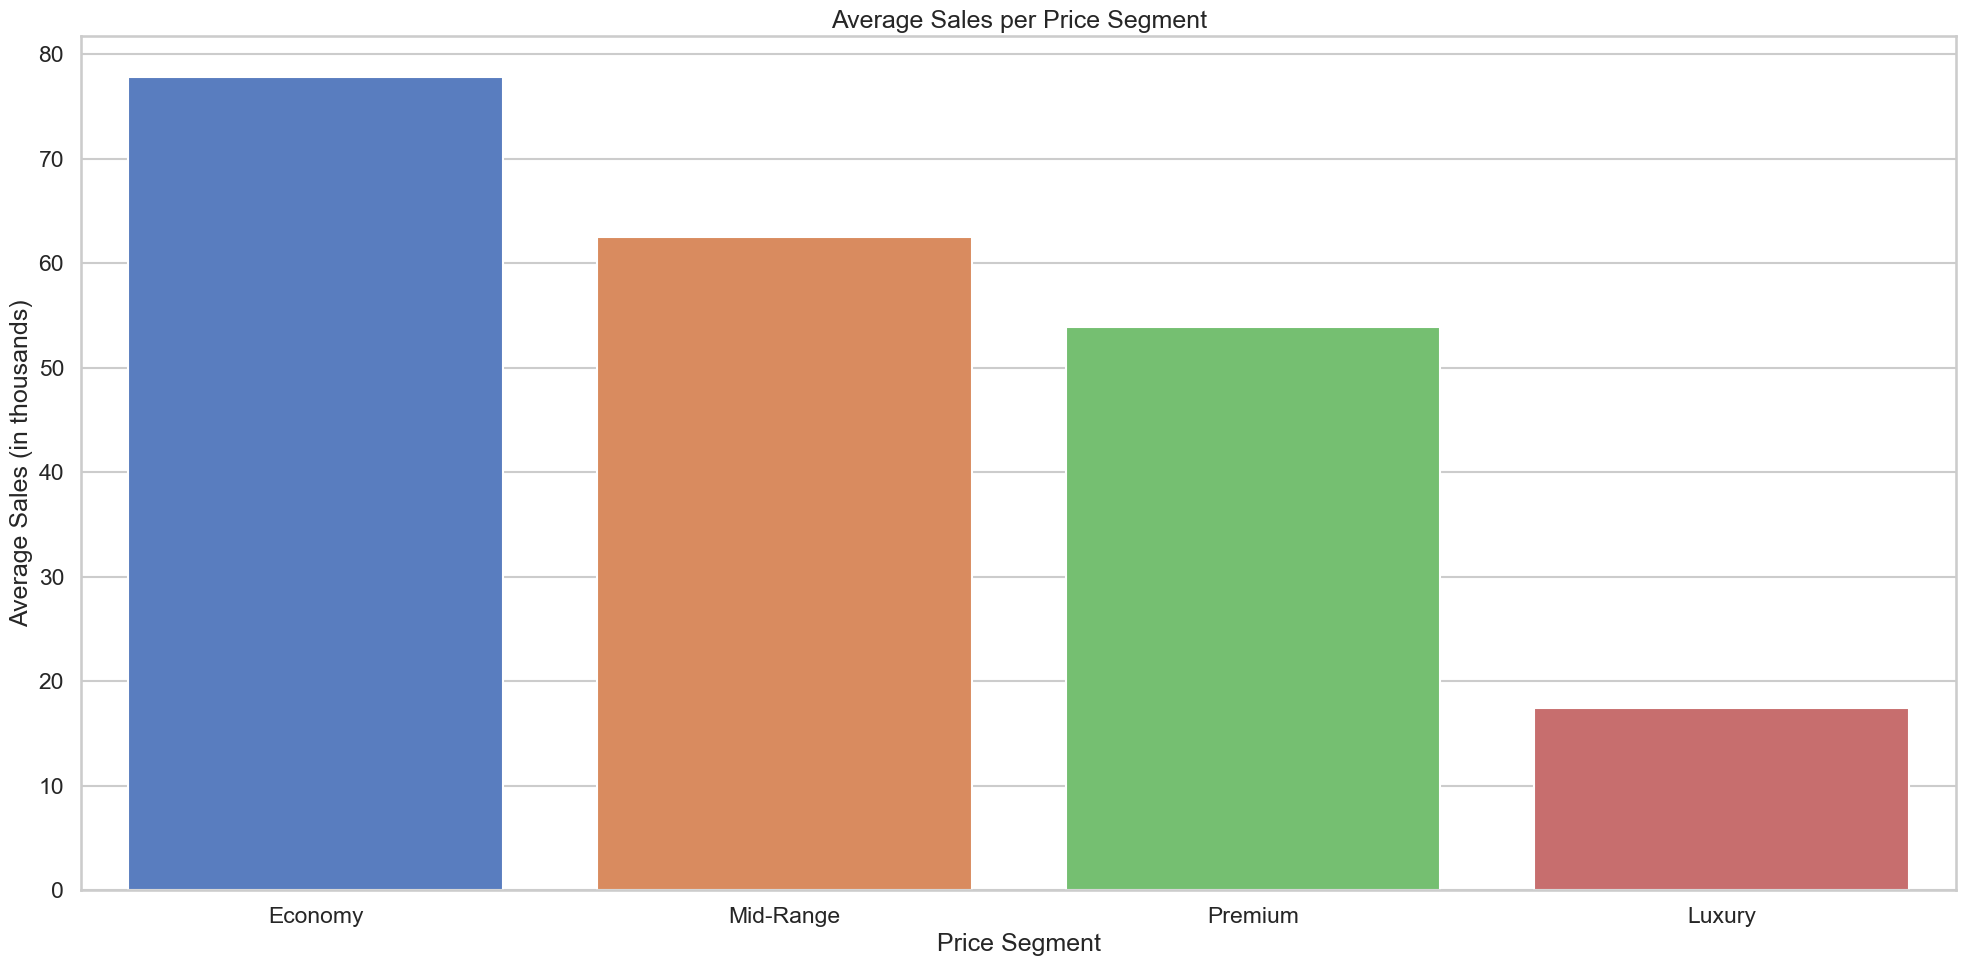

In [58]:
avg_sales = df.groupby('Price_Segment', observed=True)['Sales_in_thousands'].mean().reindex(labels)
sns.barplot(x=avg_sales.index, y=avg_sales.values, hue=avg_sales.index, palette='muted')
plt.title('Average Sales per Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Average Sales (in thousands)')
plt.tight_layout()
plt.show()

### 10.3 Performance Characteristics by Segment

Compare how the average of various performance features differ between segments.

In [59]:
avg_perf_features = df.groupby('Price_Segment', observed=True)[performance_features].mean().reindex(labels)
print('\n Average of Performance Features by Price Segment:\n', avg_perf_features)


 Average of Performance Features by Price Segment:
                Engine_size  Horsepower  Fuel_efficiency  Power_perf_factor
Price_Segment                                                             
Economy           2.110256  125.564103        27.769231          50.572654
Mid-Range         2.997500  169.950000        23.564661          68.449219
Premium           3.252632  198.157895        22.665871          81.397432
Luxury            3.889744  250.846154        21.358974         107.958534


### 10.4 Design Characteristics by Segment

Compare how the average of various design features differ between segments.

In [60]:
avg_design_features = df.groupby('Price_Segment', observed=True)[design_features].mean().reindex(labels)
print('\nAverage of Design Features by Price Segment:\n', avg_design_features)


Average of Design Features by Price Segment:
                 Wheelbase      Width      Length  Curb_weight  Fuel_capacity
Price_Segment                                                               
Economy        103.628205  68.446154  178.717949     2.718821      14.807692
Mid-Range      108.740000  71.912500  190.362500     3.391575      18.145000
Premium        108.815789  71.294737  190.910526     3.596658      19.007895
Luxury         108.766667  72.930769  189.397436     3.809385      19.869231


### 10.5 Financial Performance by Segment

Compare how the average of Price, Sales and Resale Value differ between segments.

In [61]:
features = ['Sales_in_thousands', 'Year_resale_value', 'Depreciation_Percentage']

avg_finance_features = df.groupby('Price_Segment', observed=True)[features].mean().reindex(labels)
print('\nAverage Financial Features by Price Segment:\n', avg_finance_features)


Average Financial Features by Price Segment:
                Sales_in_thousands  Year_resale_value  Depreciation_Percentage
Price_Segment                                                                
Economy                 77.836205          10.202604                29.954908
Mid-Range               62.519525          13.586966                34.487058
Premium                 53.933974          17.941150                33.835921
Luxury                  17.470103          34.788053                27.119241


### 10.6 Scatterplots for Performance & Depreciation Patterns

Visualizing **how power, efficiency, and depreciation** interact within each segment.


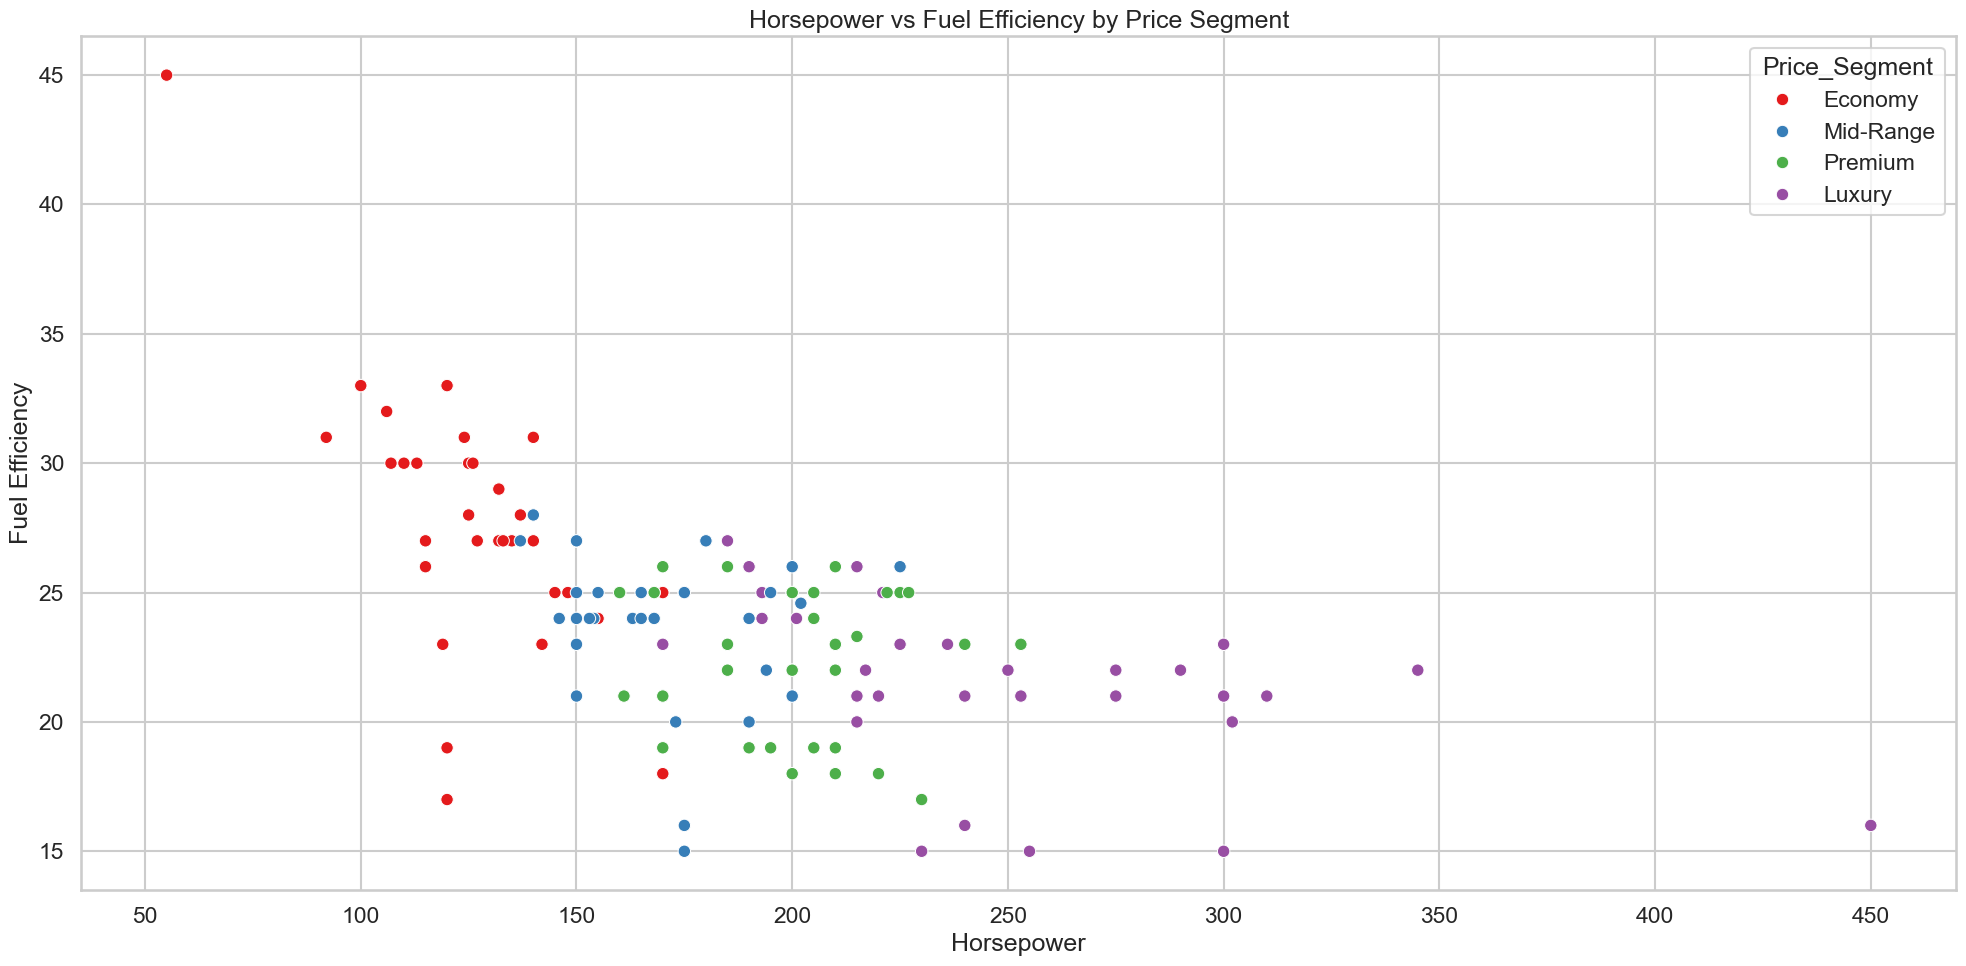

In [62]:
sns.scatterplot(x='Horsepower', y='Fuel_efficiency', hue='Price_Segment', data=df, palette='Set1',s=80)
plt.title('Horsepower vs Fuel Efficiency by Price Segment')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.tight_layout()
plt.show()

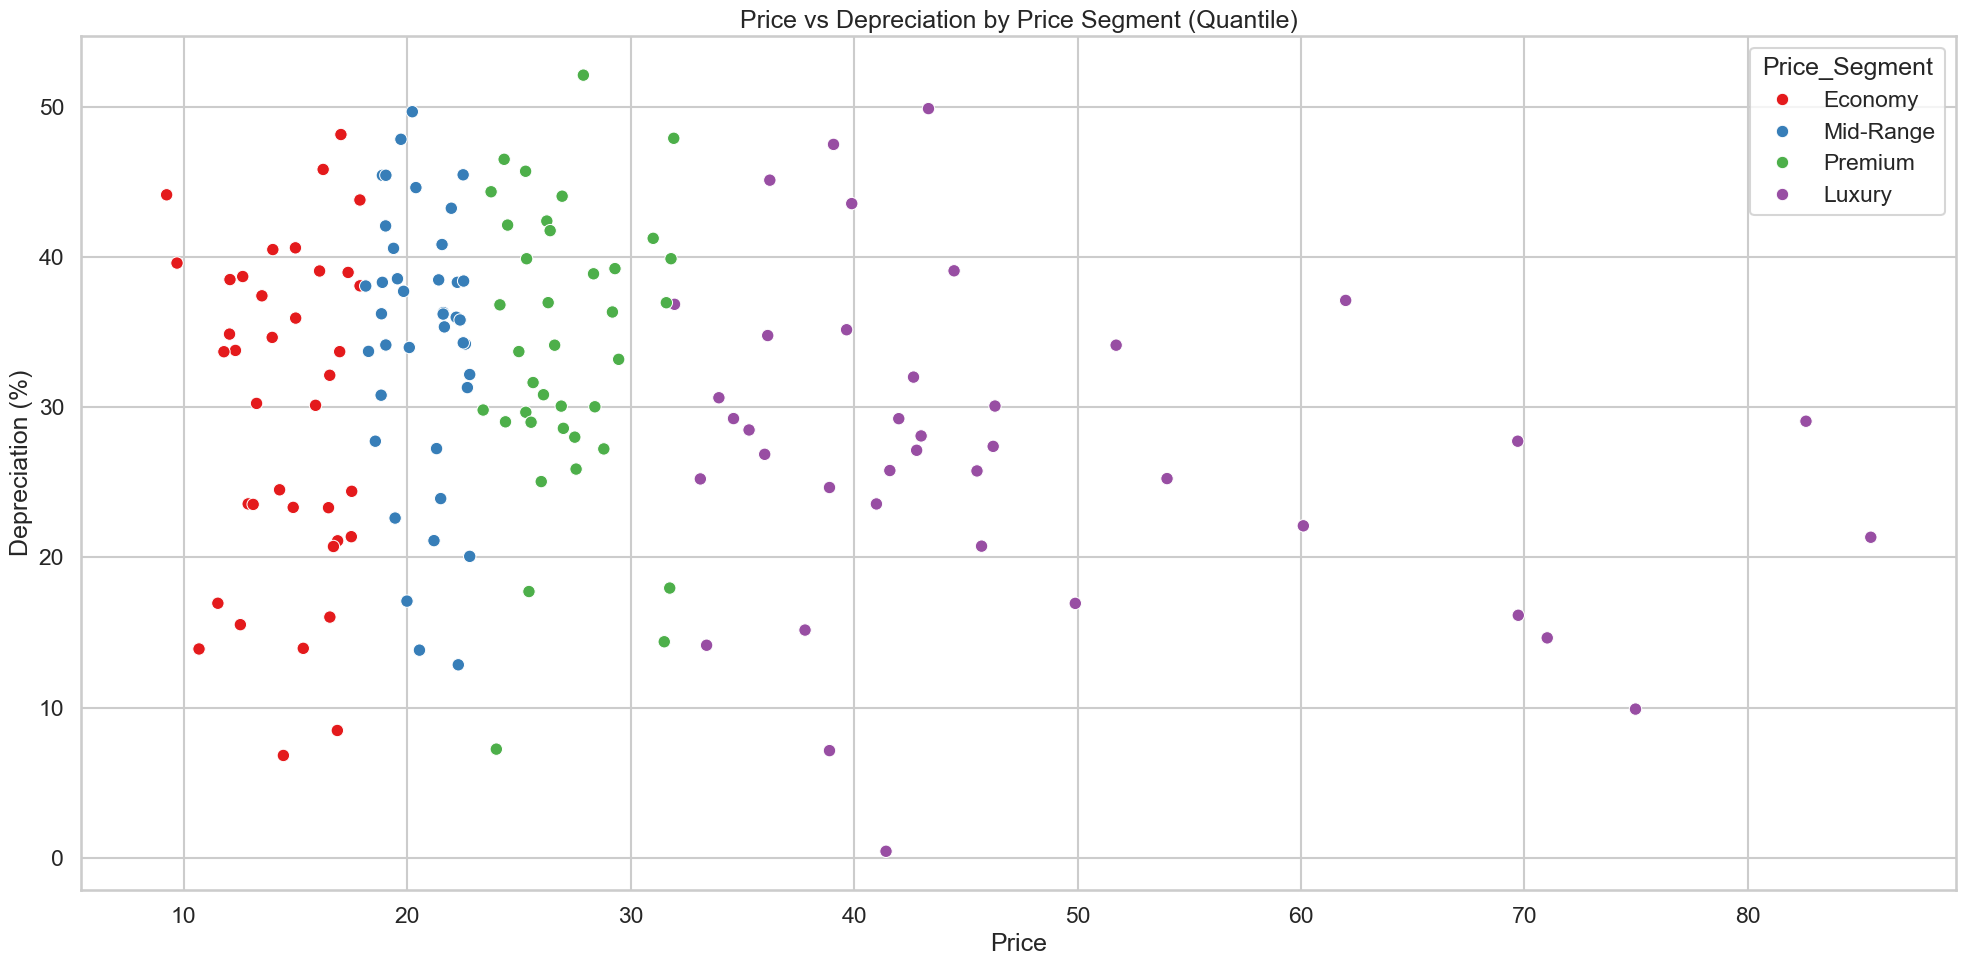

In [63]:
sns.scatterplot(x='Price_in_thousands', y='Depreciation_Percentage', hue='Price_Segment', data=df, palette='Set1', s=80)
plt.title('Price vs Depreciation by Price Segment (Quantile)')
plt.xlabel('Price')
plt.ylabel('Depreciation (%)')
plt.tight_layout()
plt.show()

### 💬Market Segmentation Insights: 

Cars naturally cluster into four quantile-based market tiers: Economy, Mid-Range, Premium, and Luxury.

Performance, design, and price scale together — with tradeoffs in fuel efficiency and depreciation.

Economy cars offer value stability and mass-market appeal, while Luxury cars emphasize status, size, and power.

This segmentation framework provides a foundation for targeted pricing, marketing, and design strategies.

## 11. PREDICTIVE MODELING: PRICE

Used linear regression modeling to predict price based on car specifications and manufacturer attributes.

### 11.1 Using 'Power_perf_factor'

In [64]:
price_model_features = ['Power_perf_factor']

price_model_data = df.dropna(subset=price_model_features + ['Price_in_thousands']).copy()

X = price_model_data[price_model_features]
y = price_model_data['Price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_price = LinearRegression()
lr_price.fit(X_train, y_train)

y_pred = lr_price.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} (in thousands)")
print(f"RMSE: {rmse:.2f} (in thousands)")

R² Score: 0.738
MAE: 6.34 (in thousands)
RMSE: 10.11 (in thousands)


### 11.2 Using 'Power_perf_factor' and 'Horsepower'

In [65]:
price_model_features = ['Horsepower', 'Power_perf_factor']

price_model_data = df.dropna(subset=price_model_features + ['Price_in_thousands']).copy()

X = price_model_data[price_model_features]
y = price_model_data['Price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_price = LinearRegression()
lr_price.fit(X_train, y_train)

y_pred = lr_price.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} (in thousands)")
print(f"RMSE: {rmse:.2f} (in thousands)")

R² Score: 0.963
MAE: 2.34 (in thousands)
RMSE: 3.77 (in thousands)


### 11.3 Using all correlated features

In [66]:
price_model_features = ['Horsepower', 'Engine_size', 'Power_perf_factor', 'Power_to_Weight']

price_model_data = df.dropna(subset=price_model_features + ['Price_in_thousands']).copy()

X = price_model_data[price_model_features]
y = price_model_data['Price_in_thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_price = LinearRegression()
lr_price.fit(X_train, y_train)


y_pred = lr_price.predict(X_test)

# Compute performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f} (in thousands)")
print(f"RMSE: {rmse:.2f} (in thousands)")

R² Score: 0.956
MAE: 2.64 (in thousands)
RMSE: 4.13 (in thousands)


## Conclusion

This analysis highlights clear linkages between performance, efficiency, and pricing in the automotive market.

**Key insights:**
- Performance metrics like horsepower and engine size drive price but reduce fuel efficiency.  
- Newer cars deliver higher efficiency and maintain better retention value.  
- Quantile and K-Means segmentation both reveal consistent market structures.  
- Temporal trends indicate gradual technological improvement without major cost drops.

This project provides a strong foundation for predictive modeling (e.g., price or fuel-efficiency prediction) or manufacturer benchmarking.
